# Playing atari games like a pro

Ever got frustaded for your lack of coordination when it comes to pressing button and breathing at the same time?

(image of discordinated human) YES!!!!

So this article is for you! With the help of deep learning lets help our laziness to make the computer play a game for us while we focus on breathing watching bogo cat play its songs.

(image of bongo cat)

## Requirement for this article

This time we will not go through all the basics of neuro networks. So make sure that you know at least some basics of deep learning, convolution layers and quantum physics.

Also we will be using **pytorch** for runing and trainig our models. So knowing a bit about **pytorch** also helps.

## Deep reinforcement learning?

You probably head about the most common types of machine learning: supervised and unsupervised. There is a third category of learning named reinforcement learning. So how does these three brothers differs from each other?

#### Supervised learning

This is the most common kind of machine learning. In this type the model has access to both the question (input) and the answer (output). It then can make a guess about the input and calculate how much it missed from the real output. Then use this difference to update its weights.

This type of learning is really good too use in object recognition.

(image of classifier)

#### Unsupervised learning

In this case the model has no access to the answers to the question. E.g it only has the input data but not the output. So the machine will try to model the input by understanding the differences and similarities between them. 

This type of learning can be used for clustering or even audio/video synthesis.

(image of GAN)

#### Reinforcement learning

Now this less used type of learning has some peculiarities. First it can interact with the environment by a set of actions and then observes how its actions changes the environment (also called state).

This type of AI has the objective to maximize the rewards it gets from the environment. Using games as an exemple, the score can be a reward, so the machine will try to learn what kind of actions are the best to use in each possible state so that it can achieve the maximum amount of rewards.

Like in this article, this type of learning can be used to play games. But on a more useful note, it can be used to teach robots to move on a most efficient way or even teach self-driving cars to drive as safe as possible.

(image of robots high fiveing each other)

##### Some terms

Reinforcement lerning has some special terms that are not used by the other forms of learning:
- **Agent**: The individual who interacts with the world. For example, the robot who can brag stuff on a table or the character on a game.
- **Action**: How the agent interact with the envirounment. For example, the robot has the possible actions of moving left, right, opening and closing its claw.
- **State**: How the envirounment looks like. Most of the time the agent has not access to the all possible states at once.
- **Reward**: It can come as a positive reward or as a negative reward (also called punishiment). The rules for how the reward is given depends on the envirounment.

### Where the "deep" comes from

Like with deep neural networks for supervised learning, when we say deep reinforcement learning, what we mean is that we will use a deep neural network to model what are the best actions to choose depending on the state the evironment is now. 

...and it sounds cooler.


## OpenAI gym

OpenAI is a non-profit AI research company that provide us with a bunch of cool tool to train reiforcement leaning models. These are normaly small games with an easy interface for rendering and action input. 
We could use an emulator to be able to run any game we can want, however in this article we want to focus on the model training part so we will be using the OpenAI gym libraries to create and interact with our games.

Installing the library is pretty straighforward. Just run **pip install gym** or **pip install --user gym** to keep the library local, and if you are using Gentoo, you need to add that **--user**

Here lets try to import and play our game with random actions for now.


In [48]:
#importing the necessary libraries
import gym
import numpy as np
import matplotlib.pyplot as plt
from JSAnimation.IPython_display import display_animation
from IPython.display import display
import matplotlib.animation as animation
%matplotlib inline

In [5]:
env = gym.make('Skiing-v0')

With this we have the environment loaded. We can now check what is sent to us from the envirounment as output and what actions we can give to the agent.

In [7]:
env.action_space

Discrete(3)

As we can see, this envirounment allow the agent to do 3 diffenrent discrete actions: 0,1 and 2. This implies that our network will need 3 neurons so we can model these actions.

(250, 160, 3)


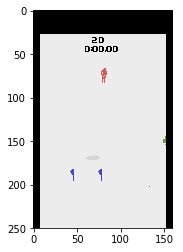

In [12]:
img = env.reset()
#img = env.observation_space.sample(0)
print(img.shape)
imgplot = plt.imshow(img)

Here we can see an example of how the game looks like. Every state is a (250,160,3) image where the last dimension is the RGB channel of the image.

So, how about we try to run once at random and check how well we performed?

In [44]:
env.reset()
img_list = []
reward_list = []
for _ in range(1000):
    action = np.random.randint(0,3)
    img, reward, done, _ = env.step(action)
    reward_list.append(reward)
    img_list.append(img)
    if(done):
        break

In [51]:
#this is a small helper function to create animation in the jupyter notebook. In case you want to run it later
def animate(frames):
    plt.axis('off')
    patch = plt.imshow(frames[0])
    fanim = animation.FuncAnimation(plt.gcf(), lambda x: patch.set_data(frames[x]), frames = len(frames), interval=30)
    display(display_animation(fanim, default_mode='once'))


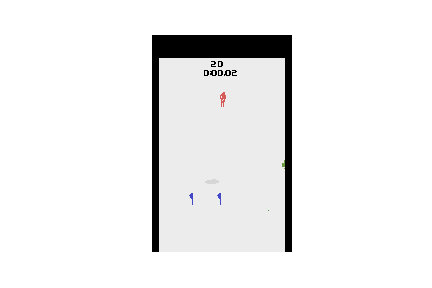
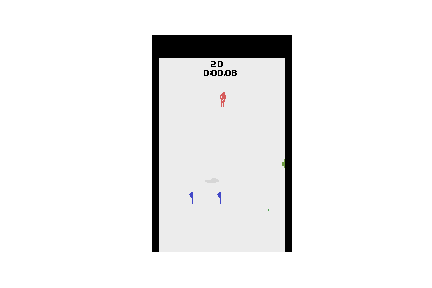
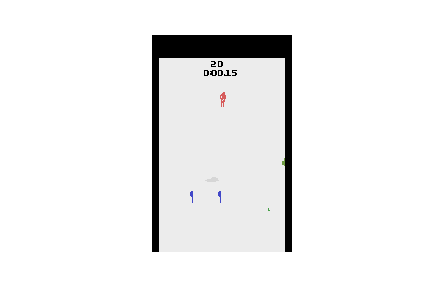
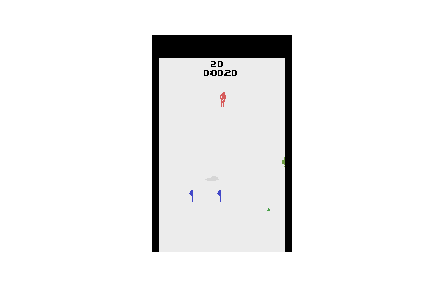
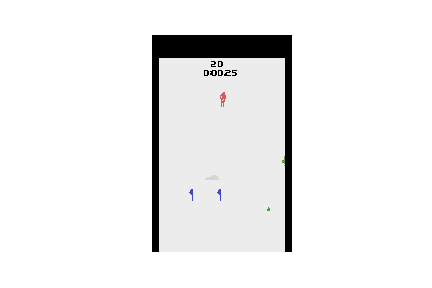
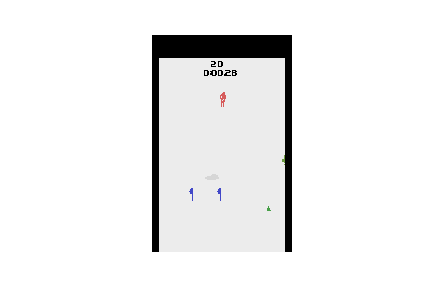
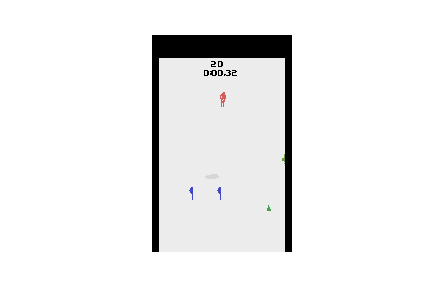
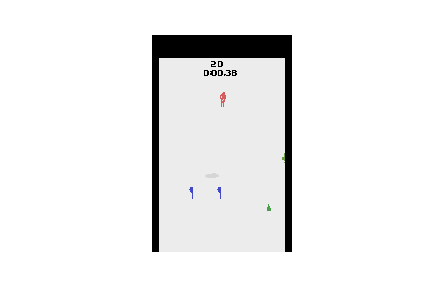
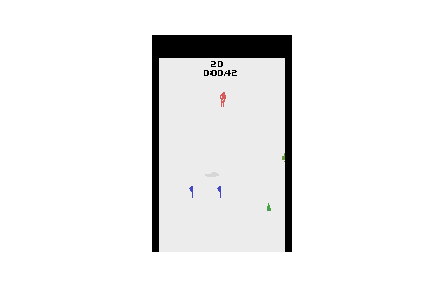
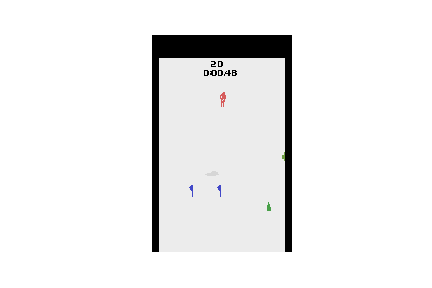
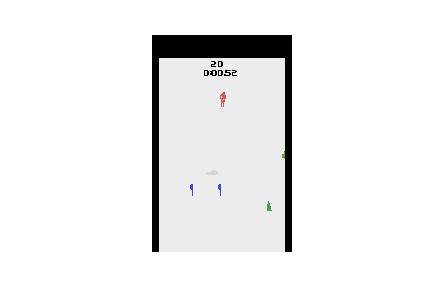
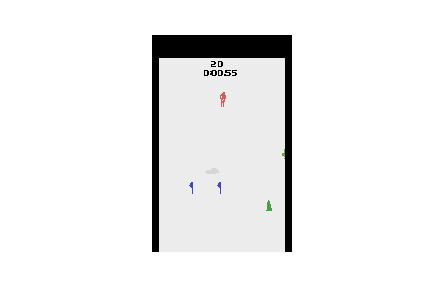
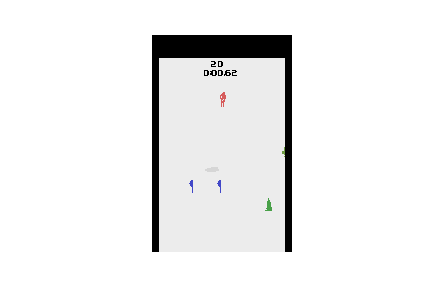
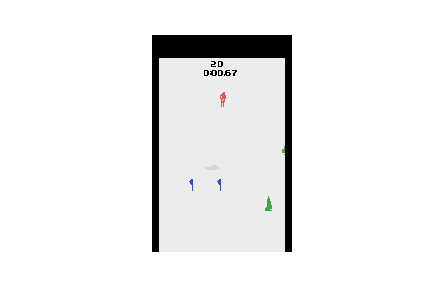
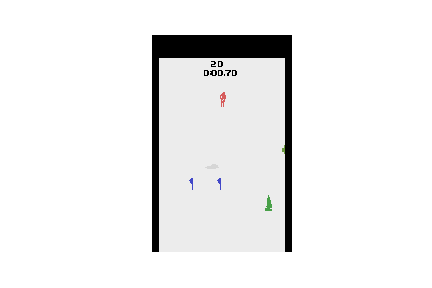
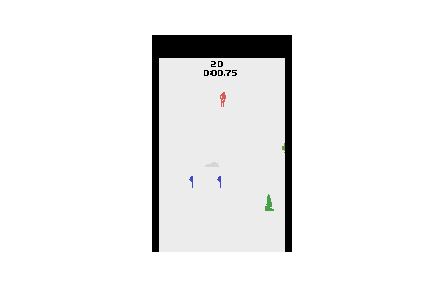
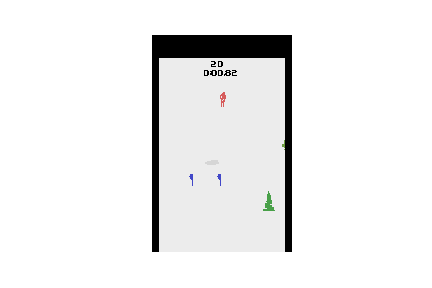
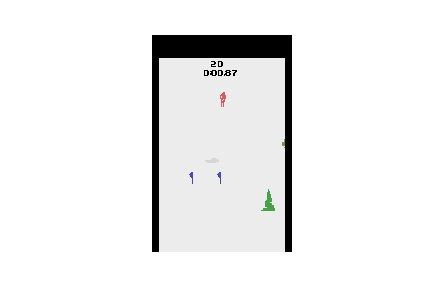
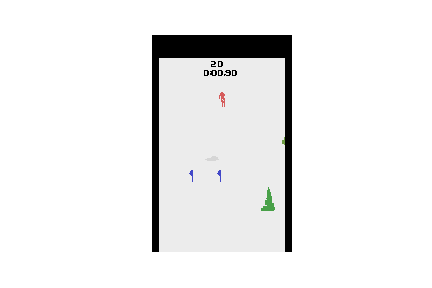
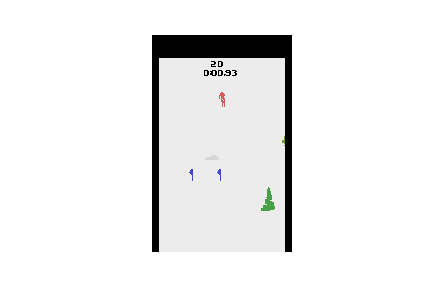
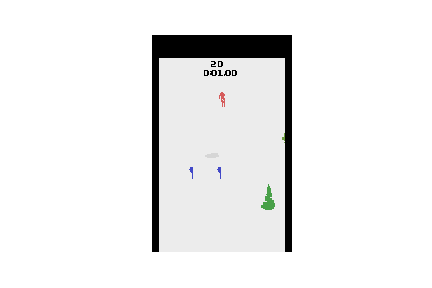
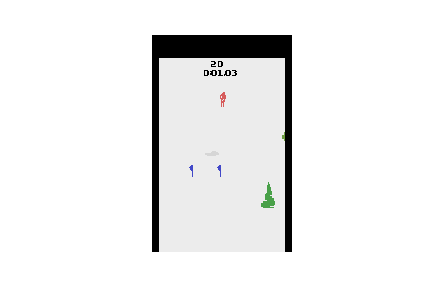
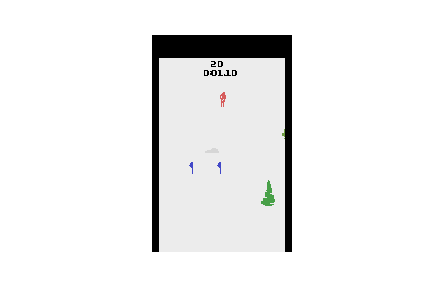
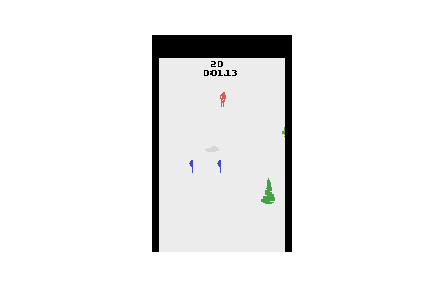
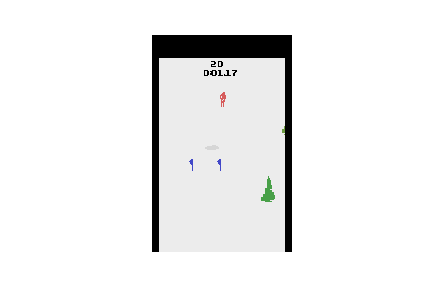
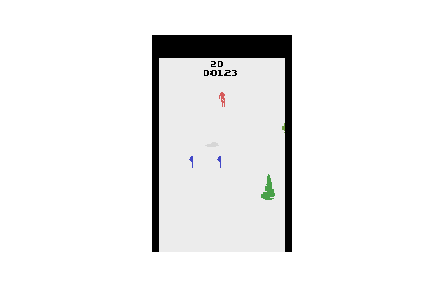
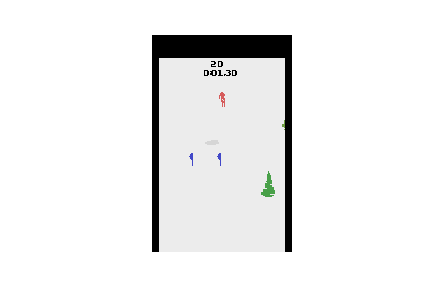
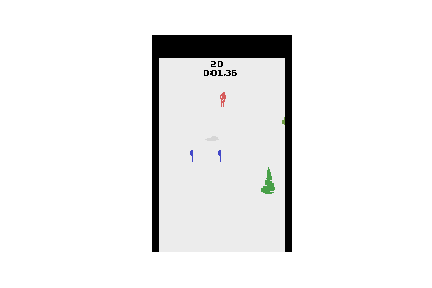
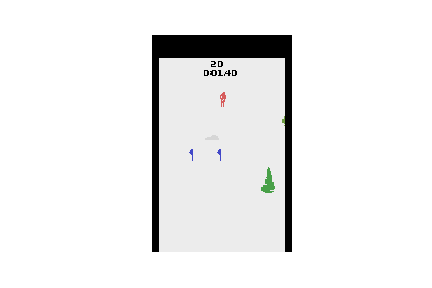
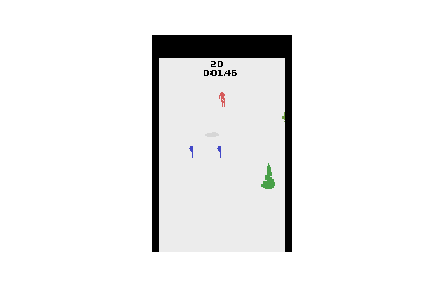
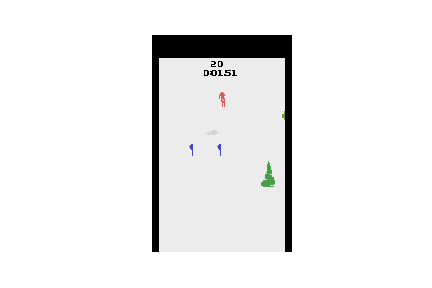
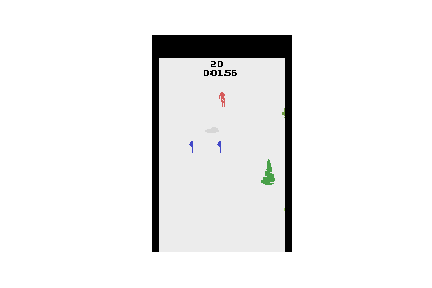
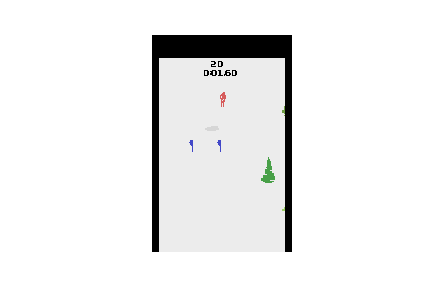
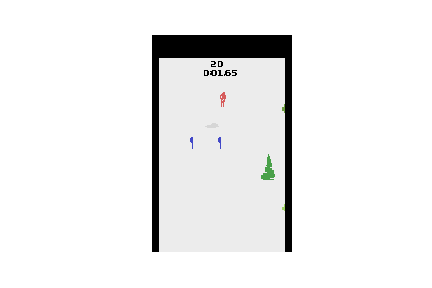
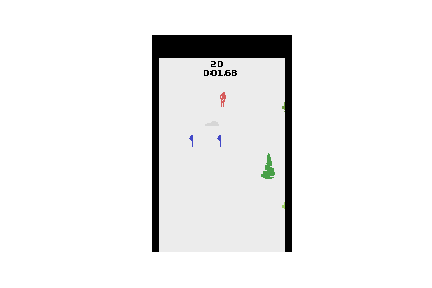
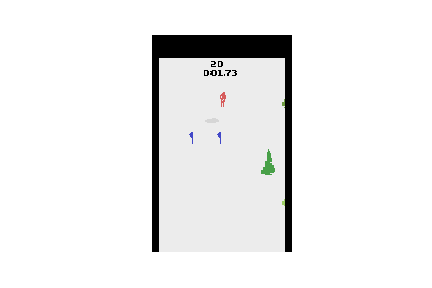
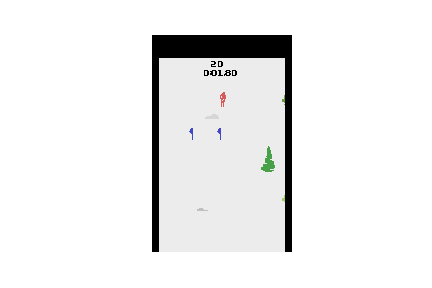
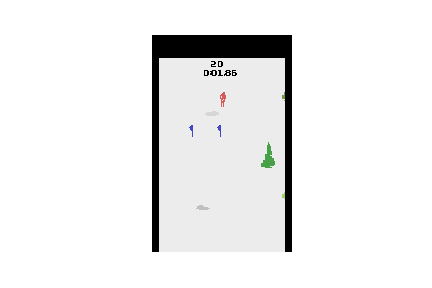
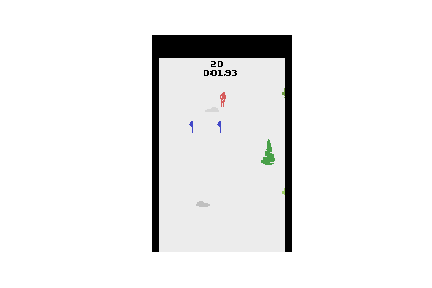
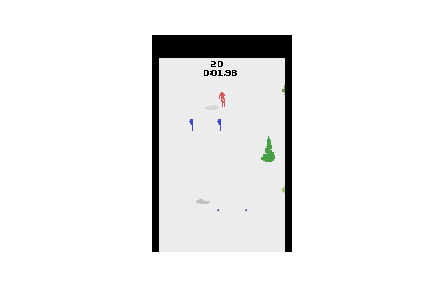
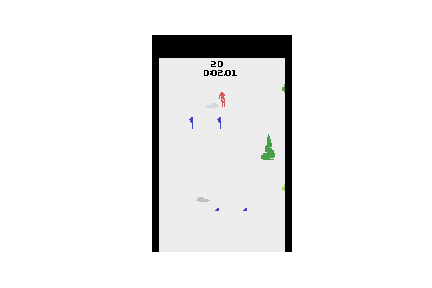
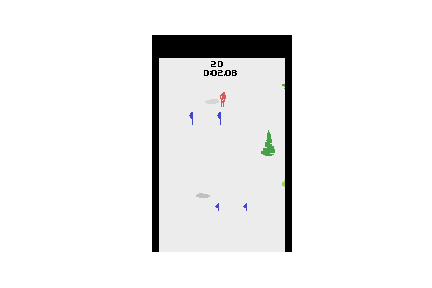
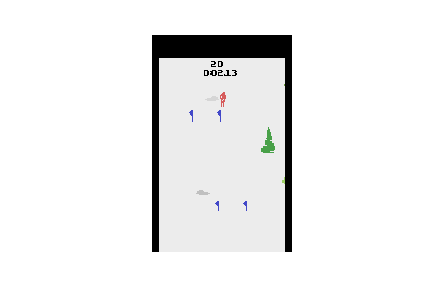
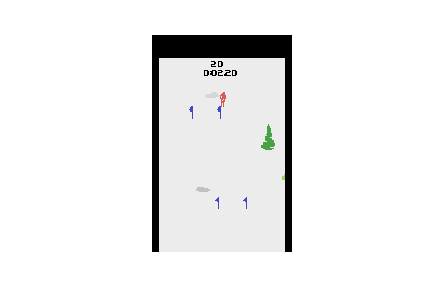
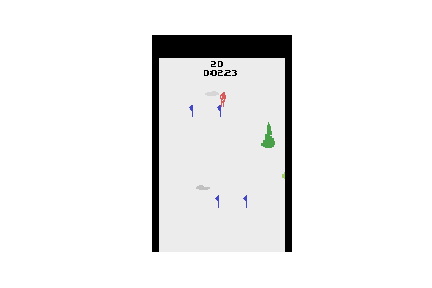
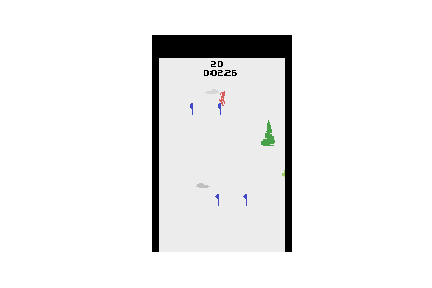
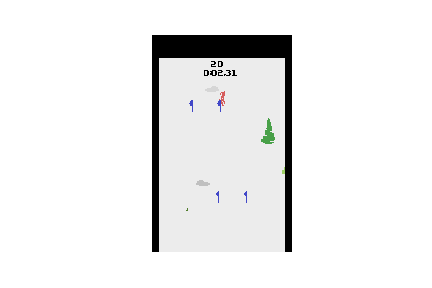
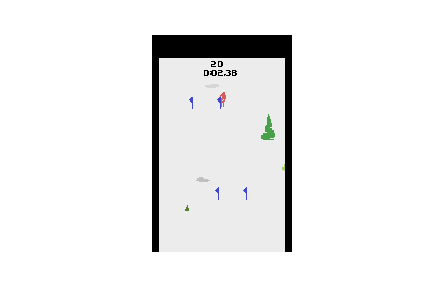
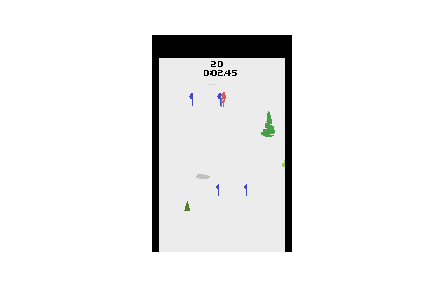
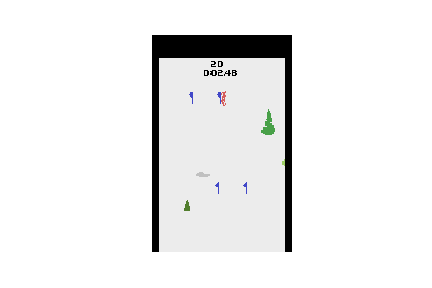
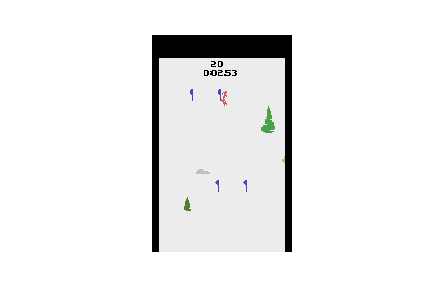
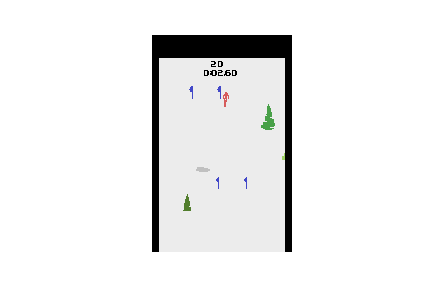
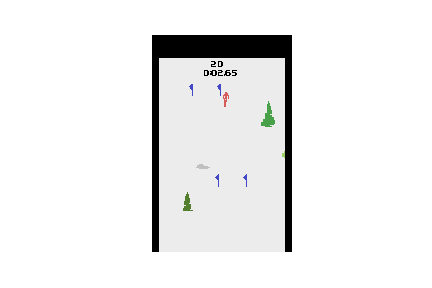
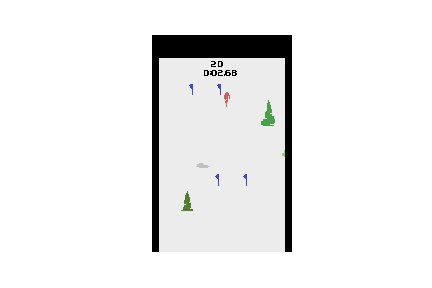
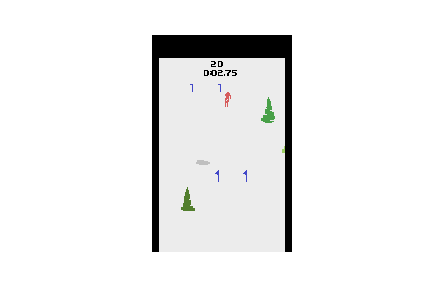
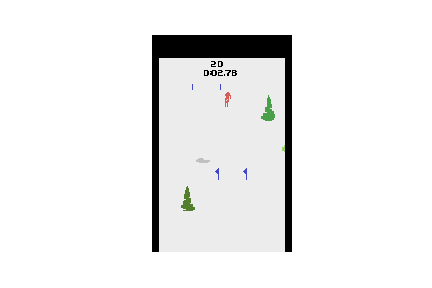
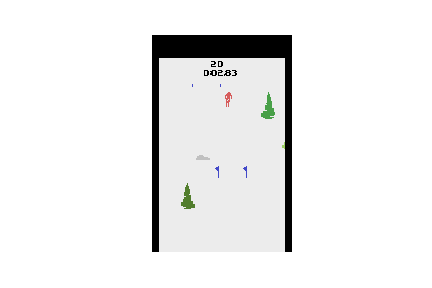
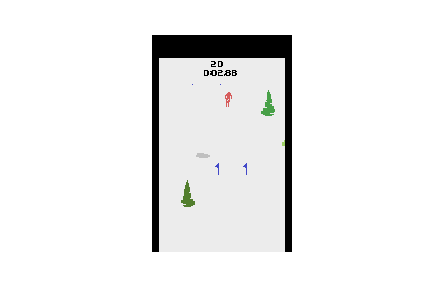
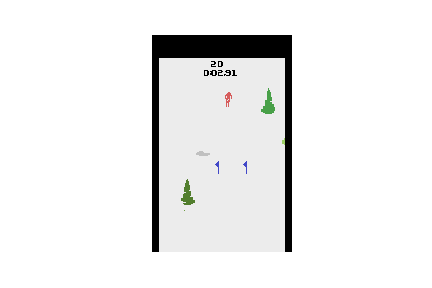
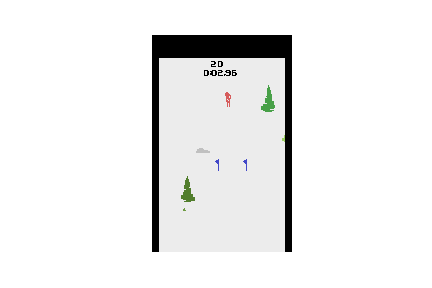
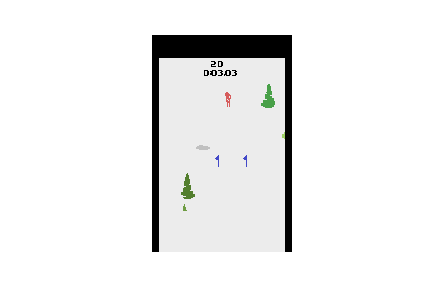
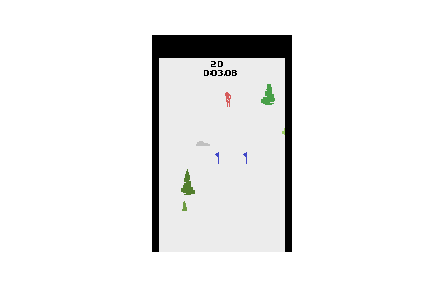
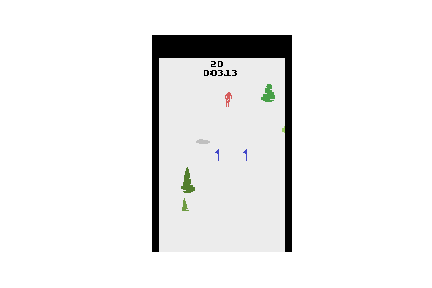
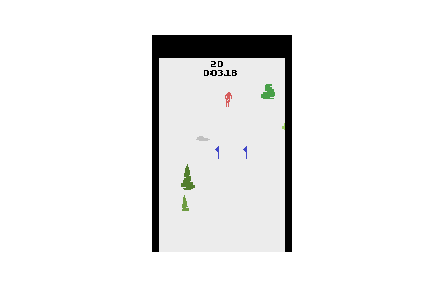
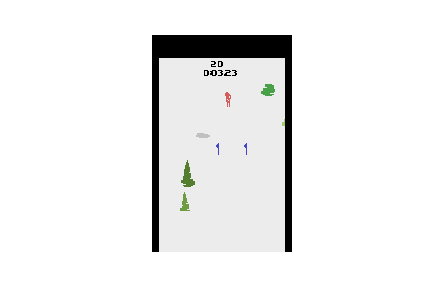
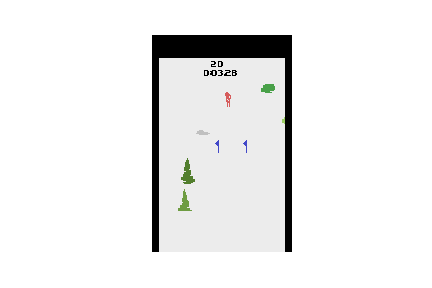
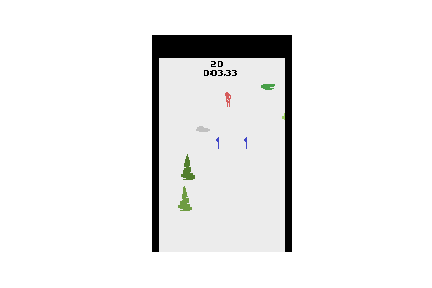
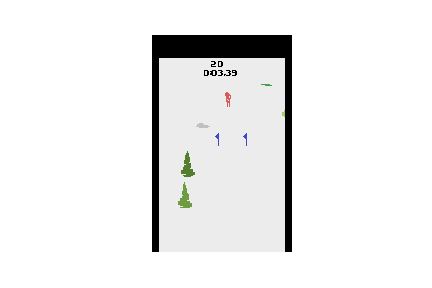
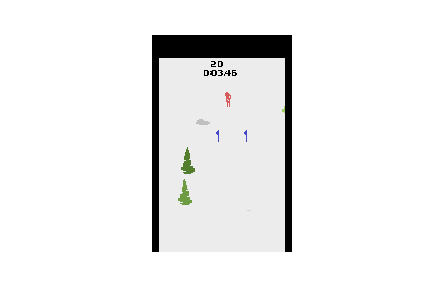
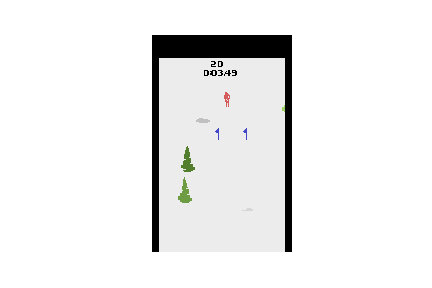
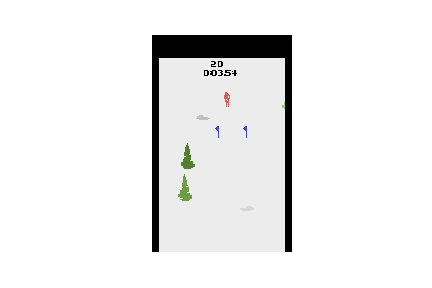
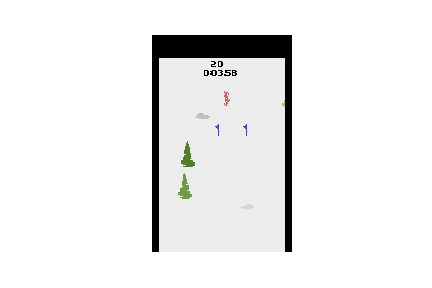
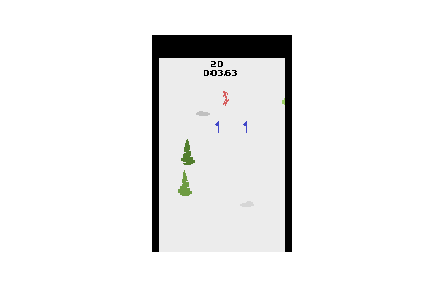
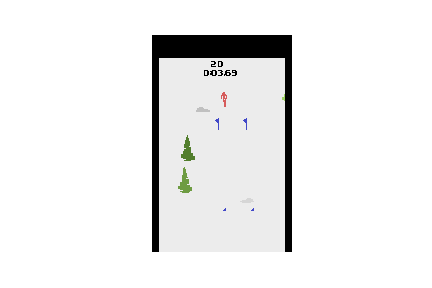
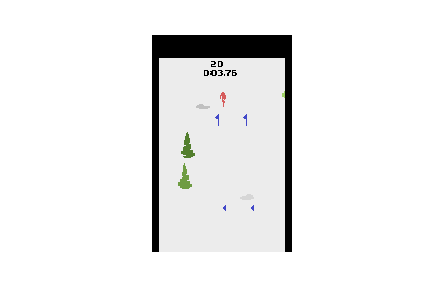
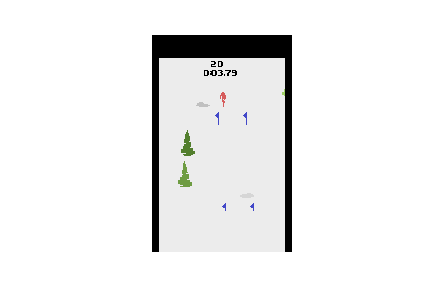
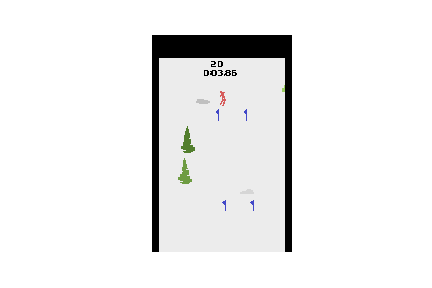
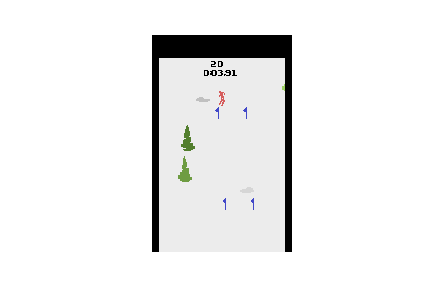
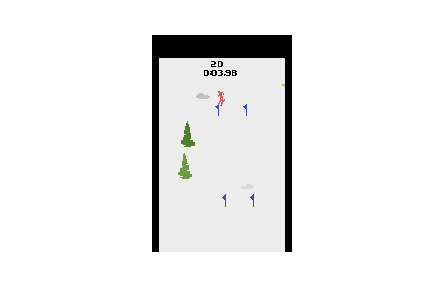
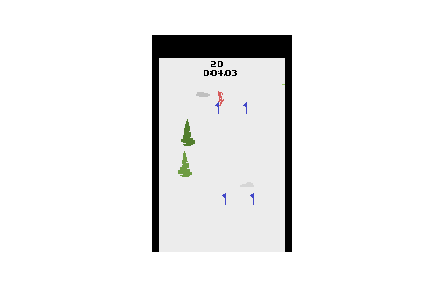
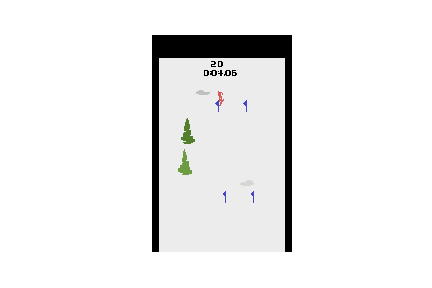
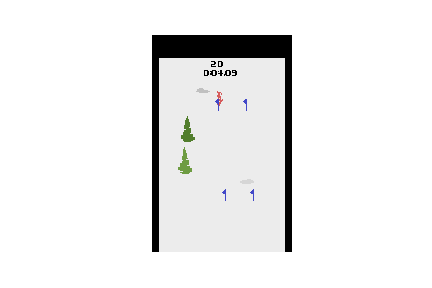
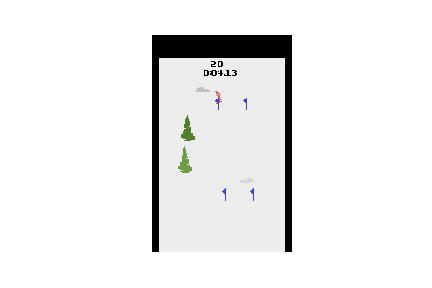
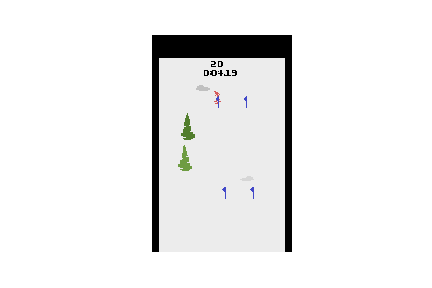
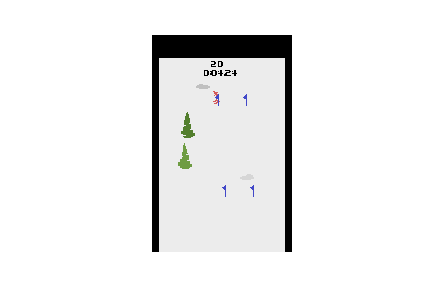
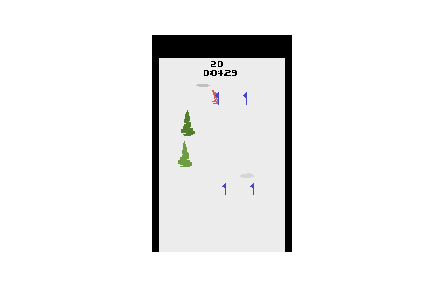
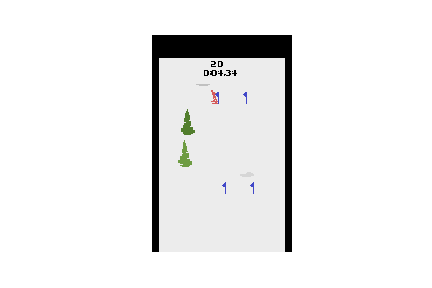
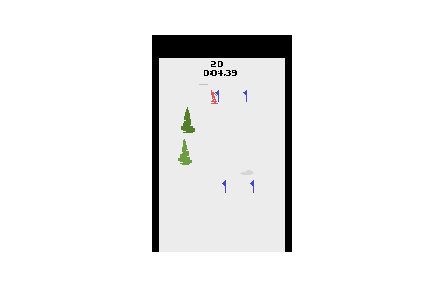
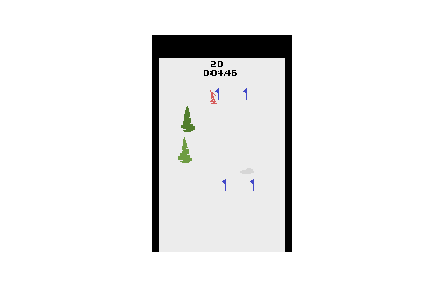
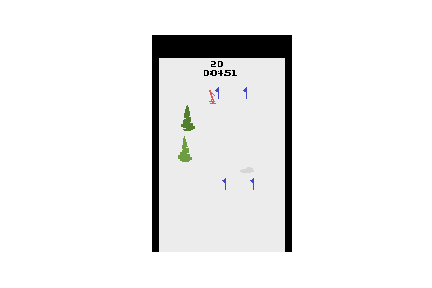
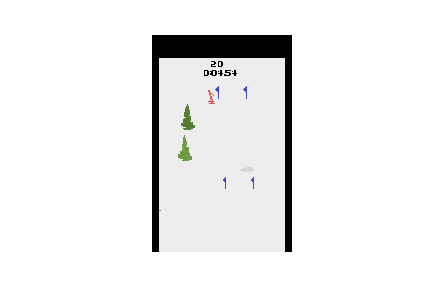
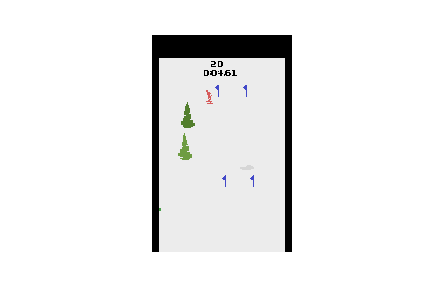
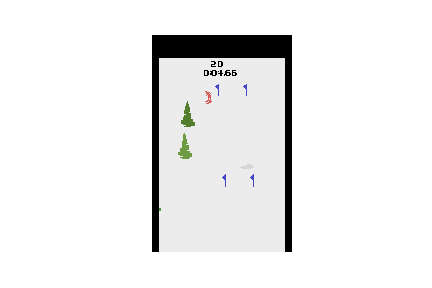
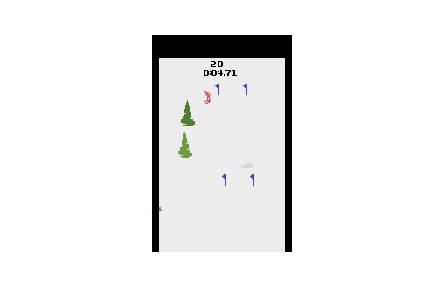
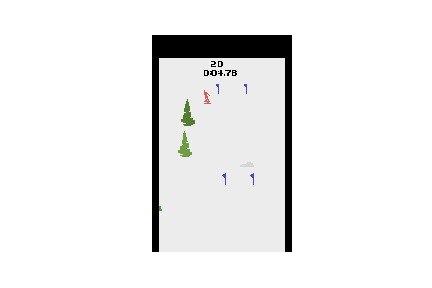
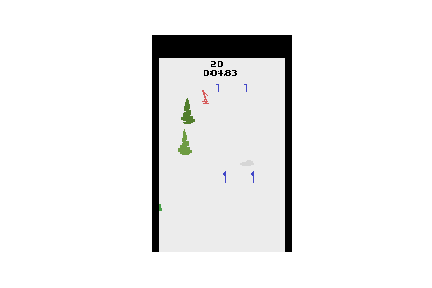
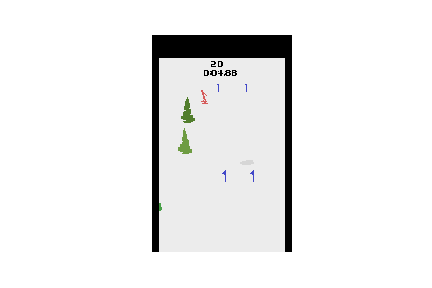
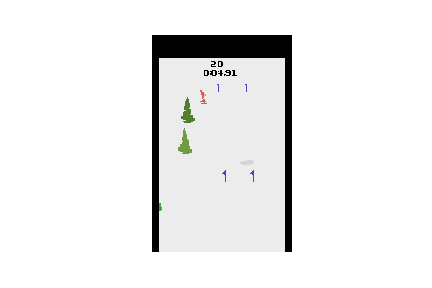
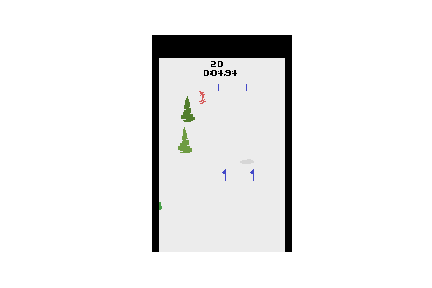
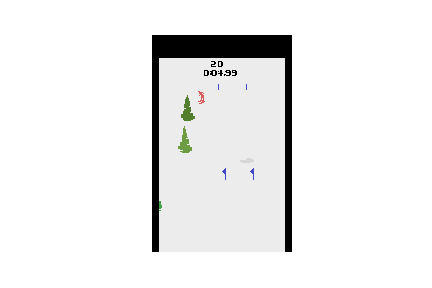
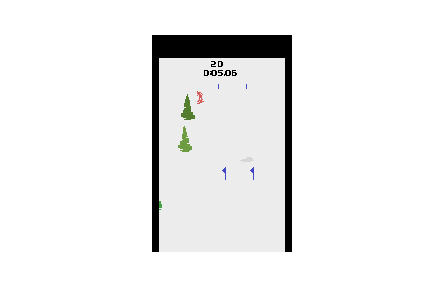
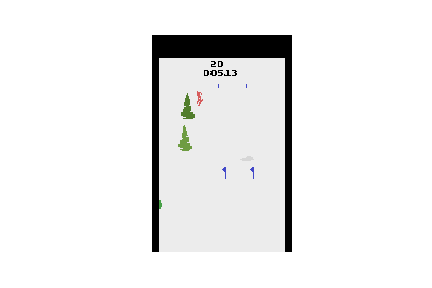
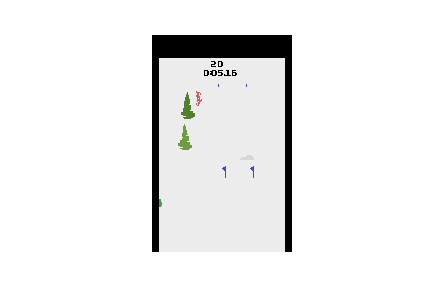
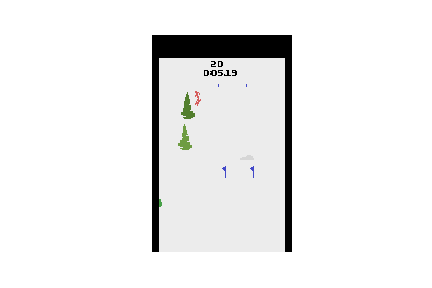
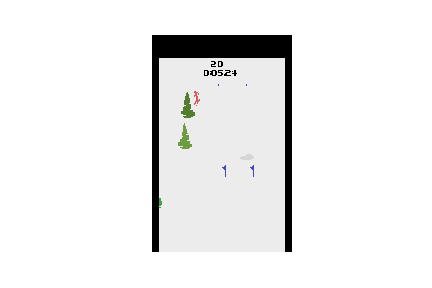
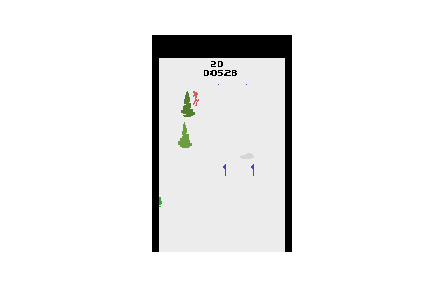
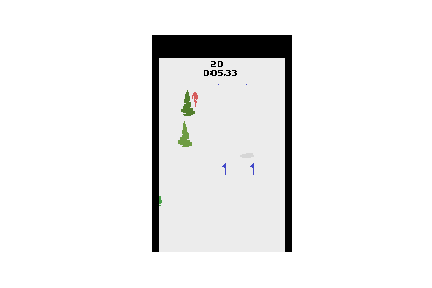
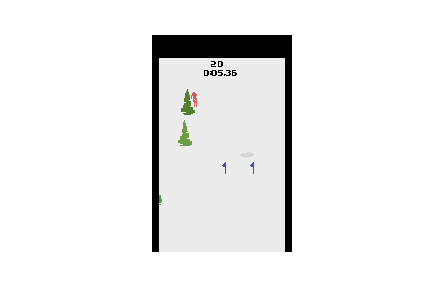
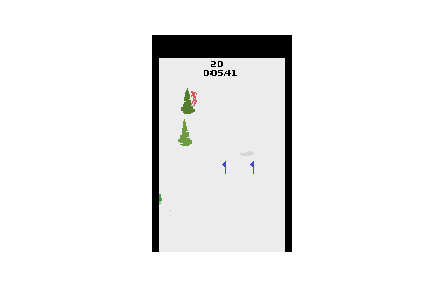
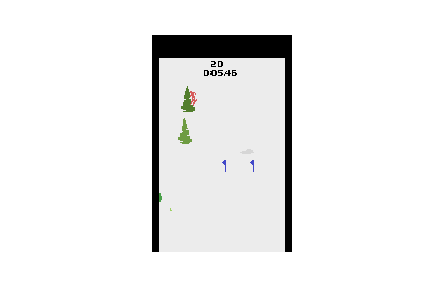
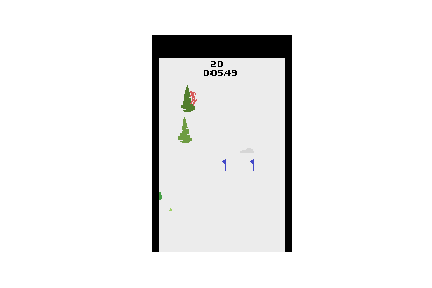
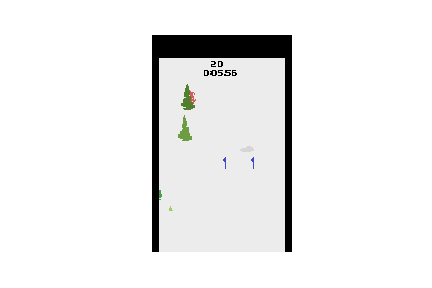
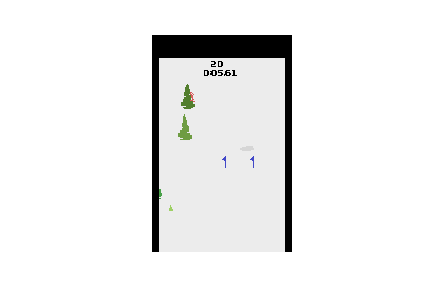
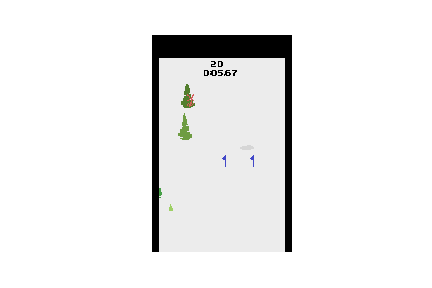
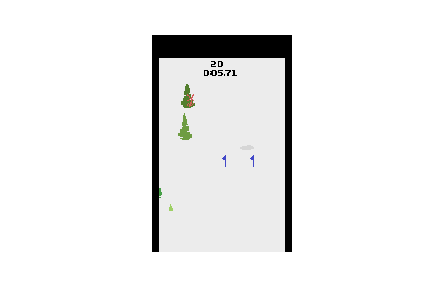
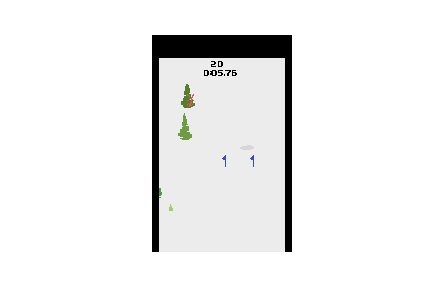
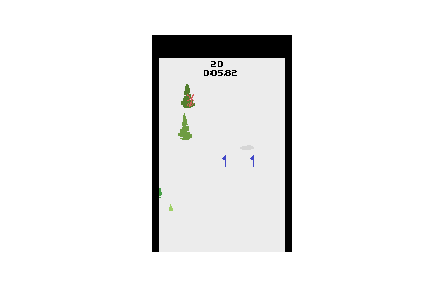
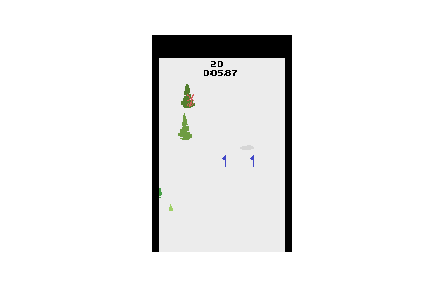
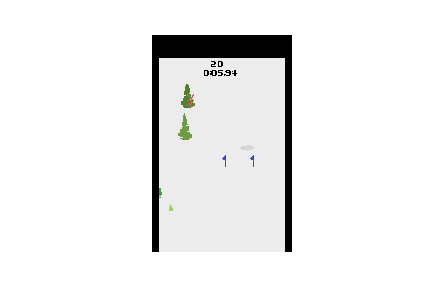
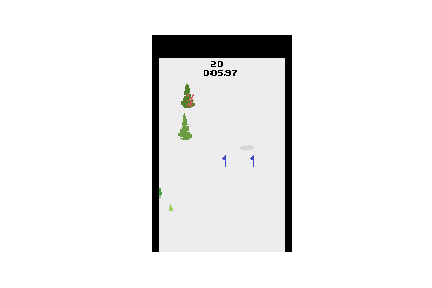
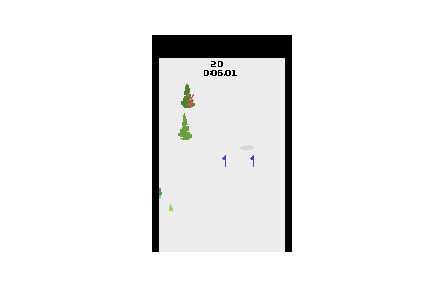
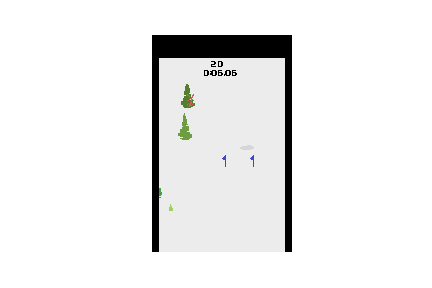
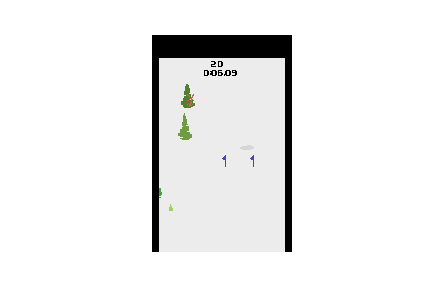
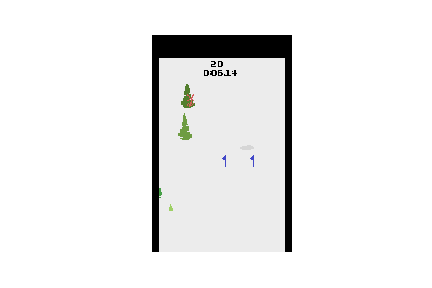
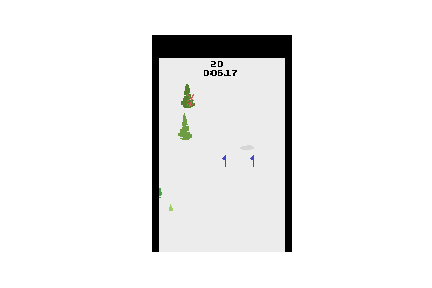
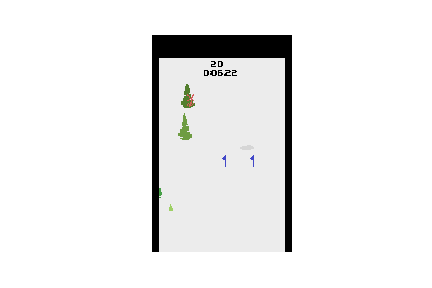
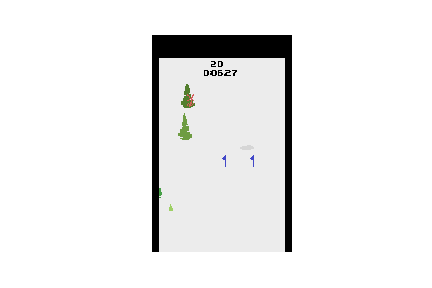
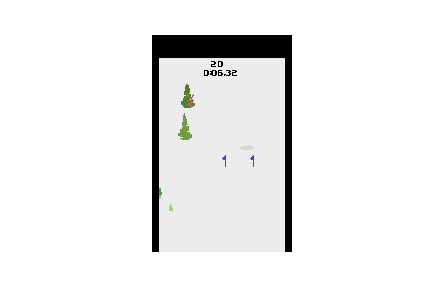
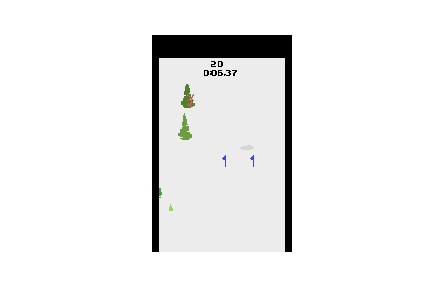
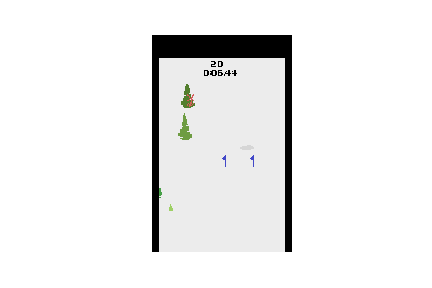
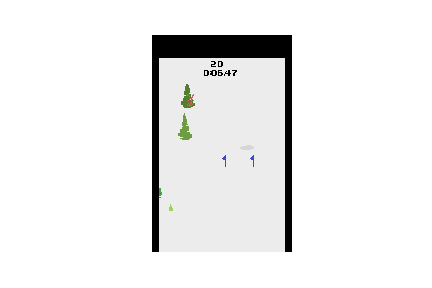
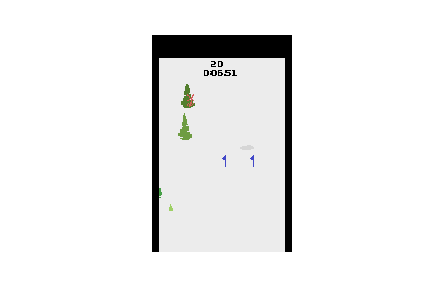
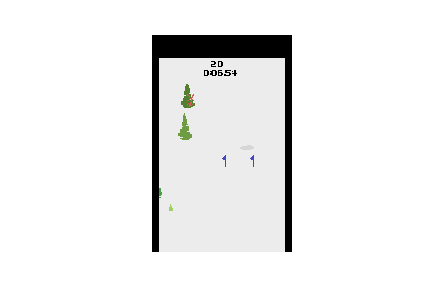
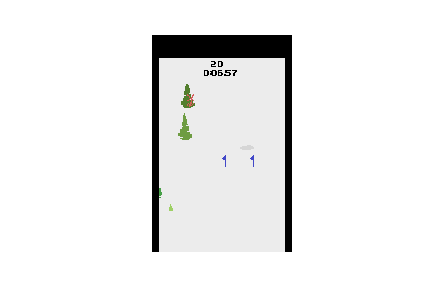
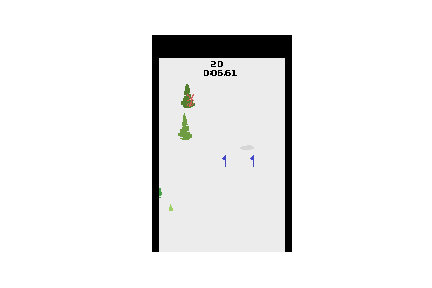
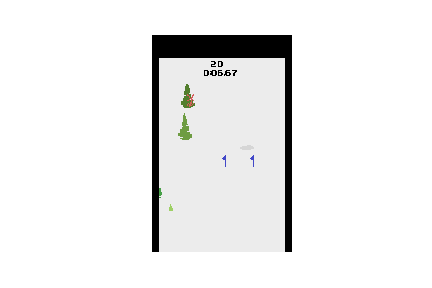
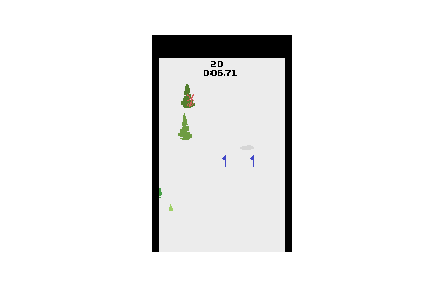
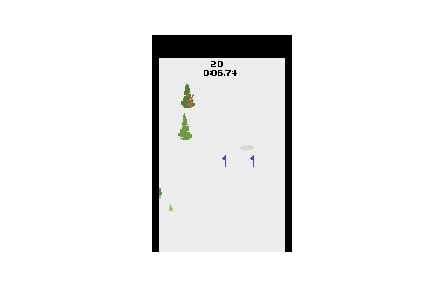
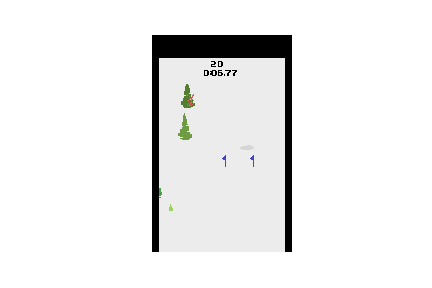
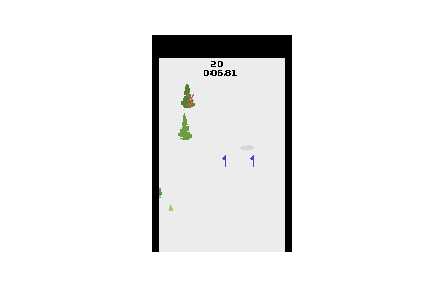
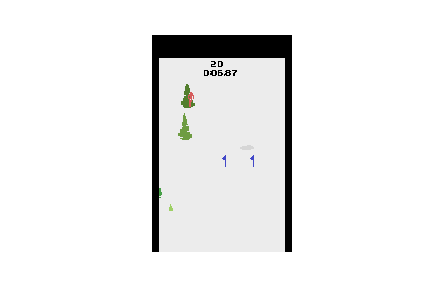
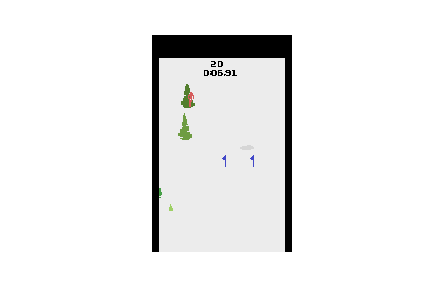
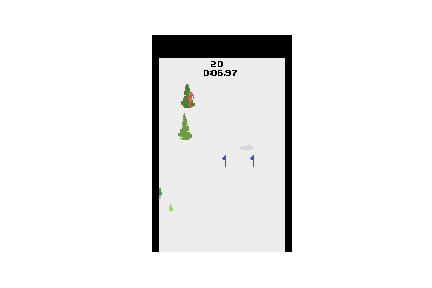
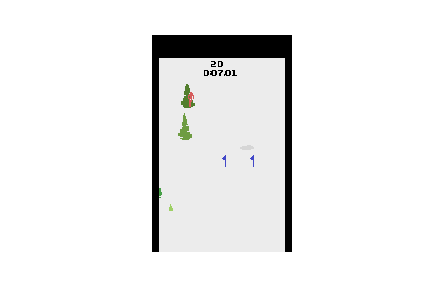
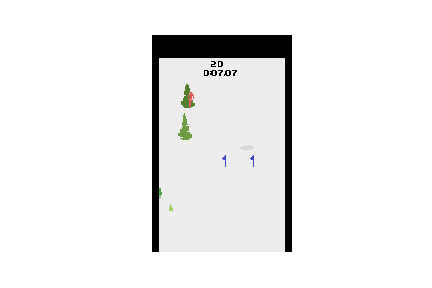
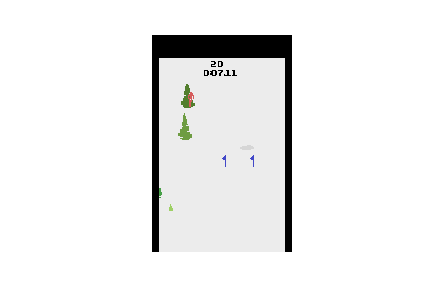
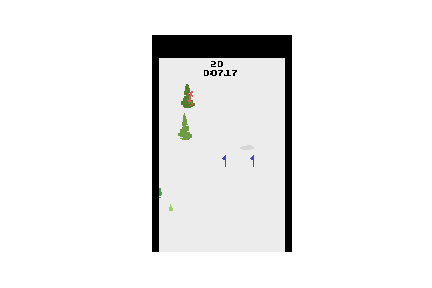
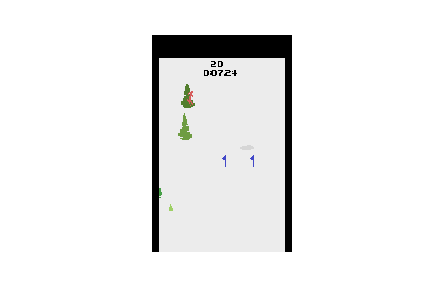
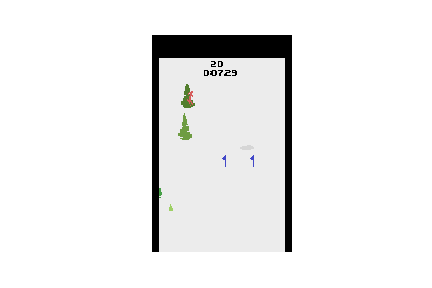
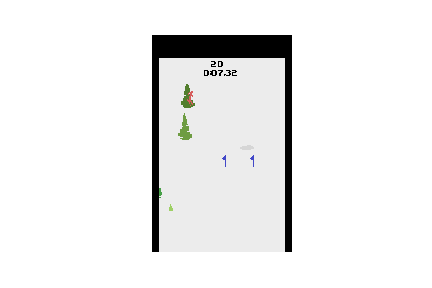
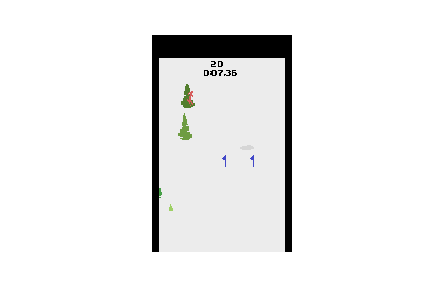
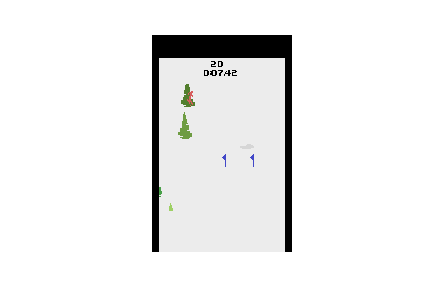
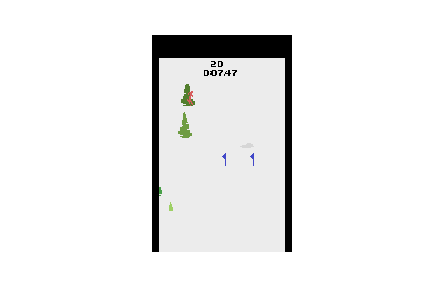
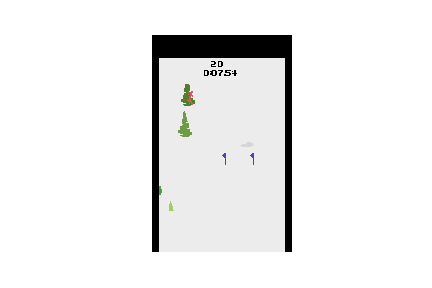
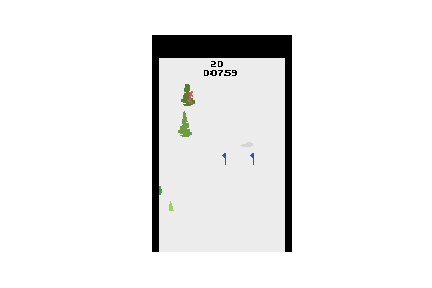
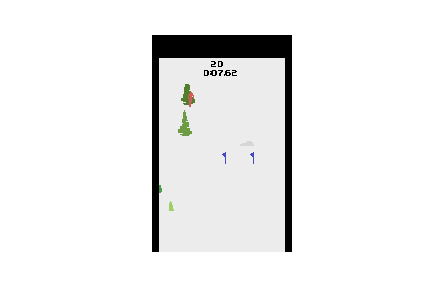
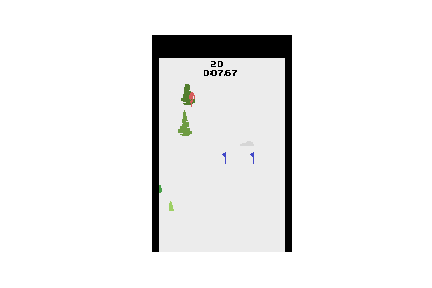
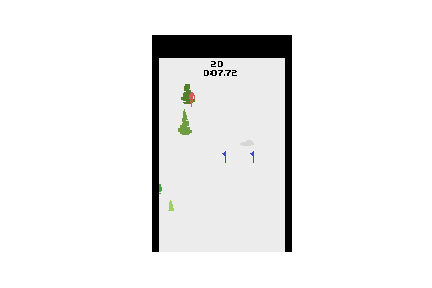
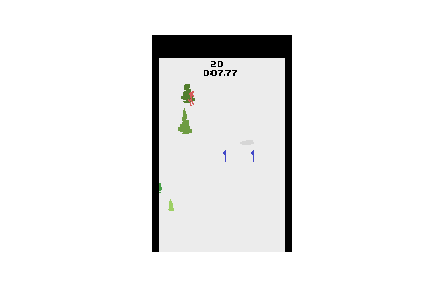
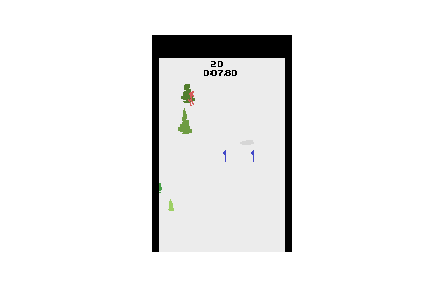
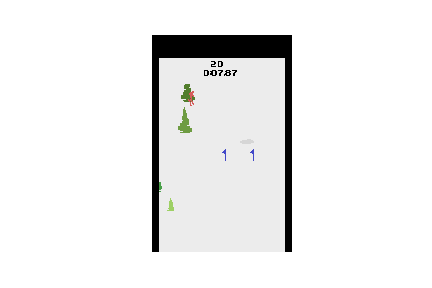
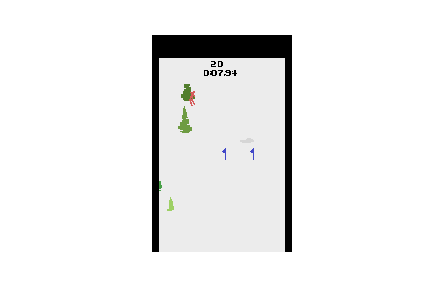
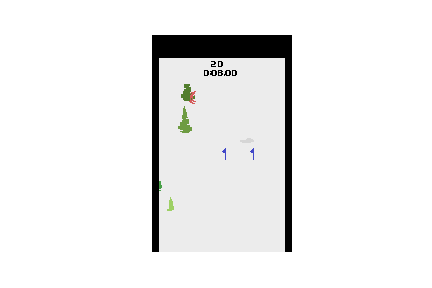
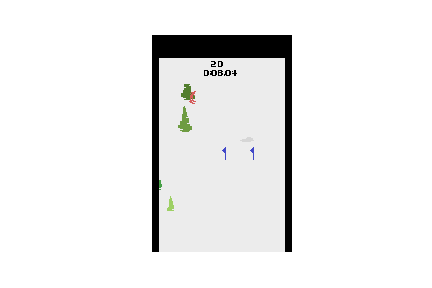
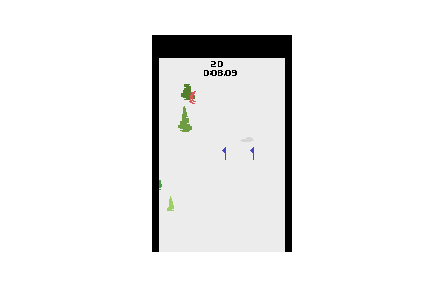
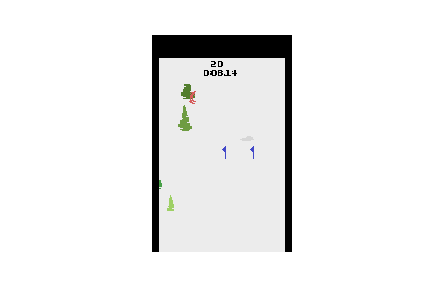
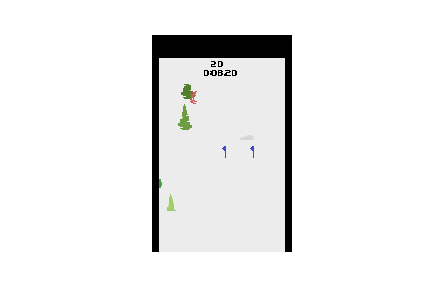
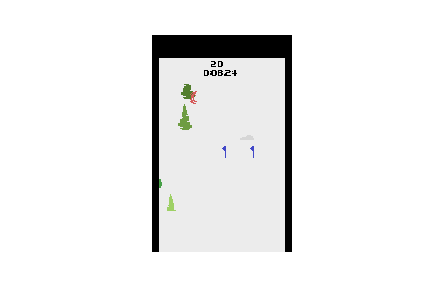
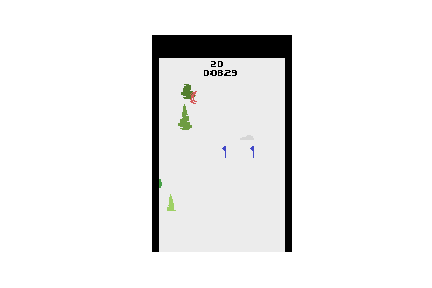
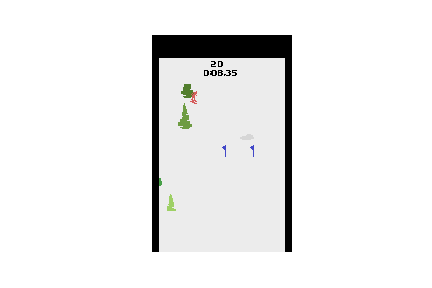
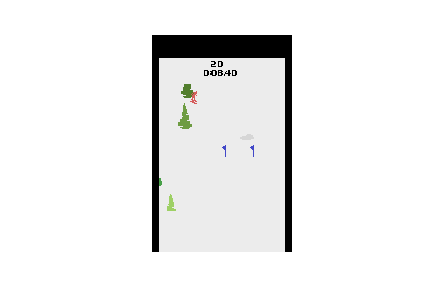
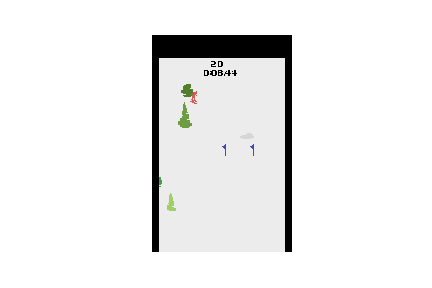
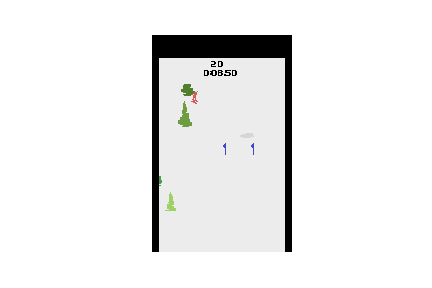
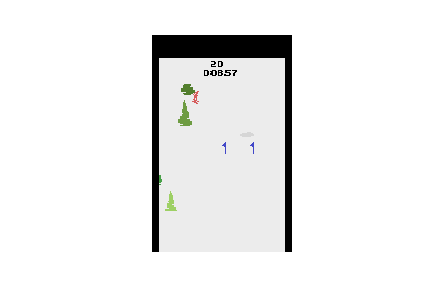
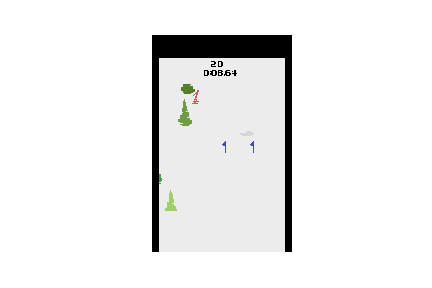
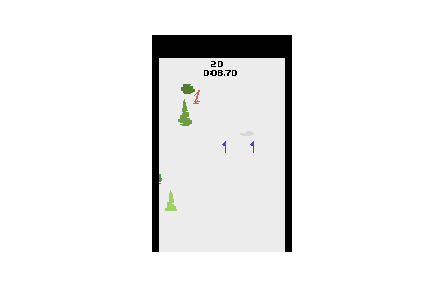
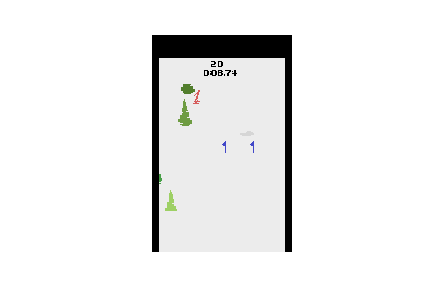
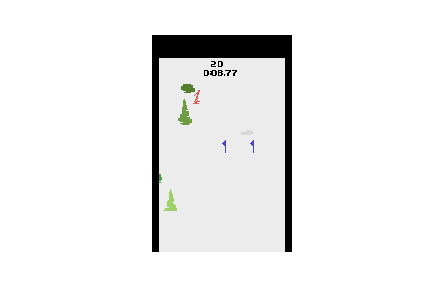
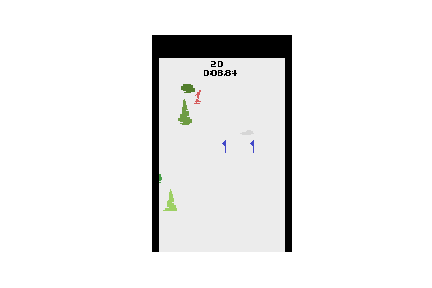
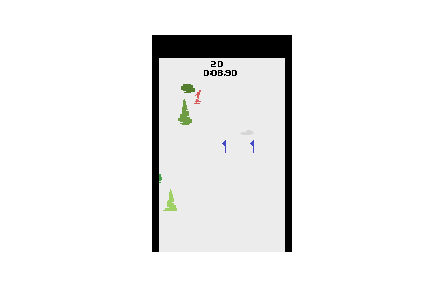
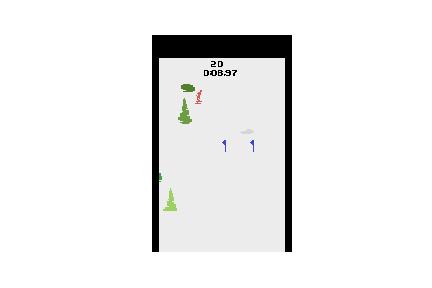
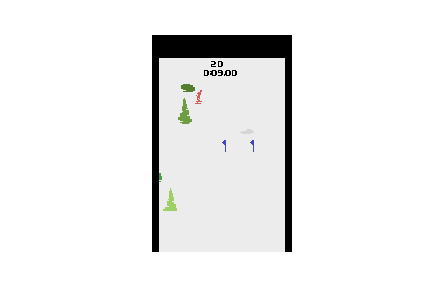
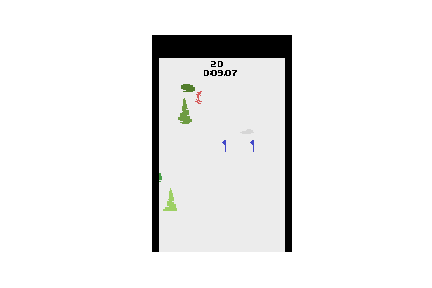
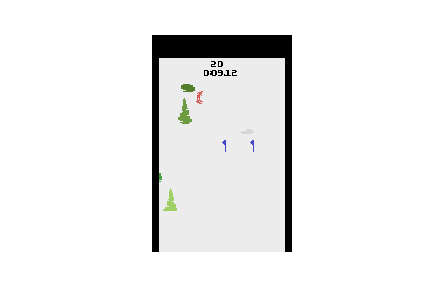
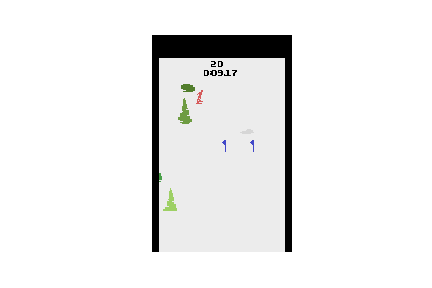
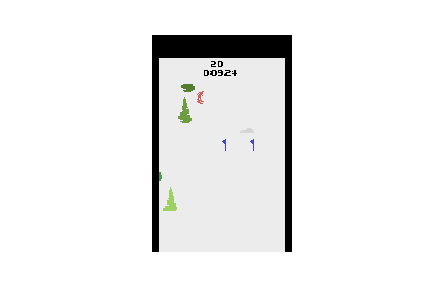
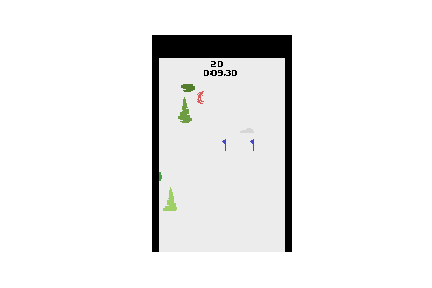
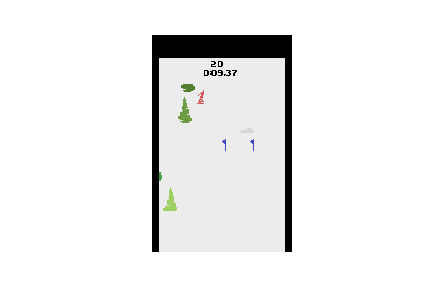
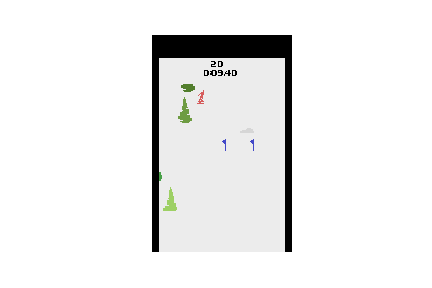
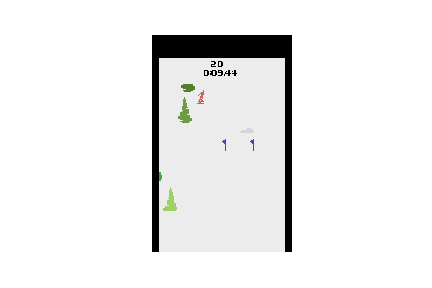
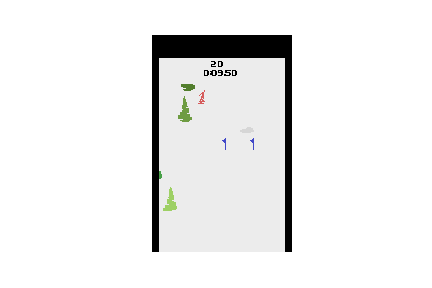
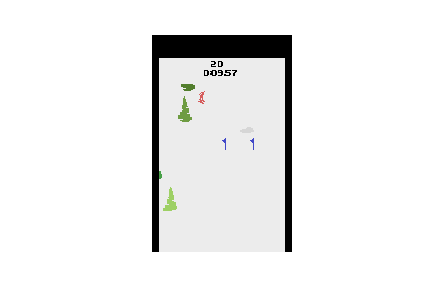
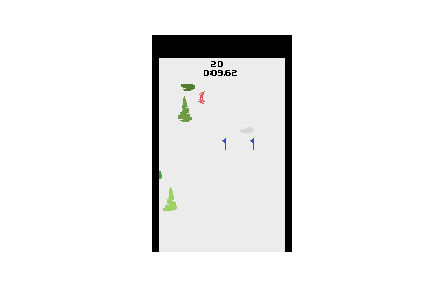
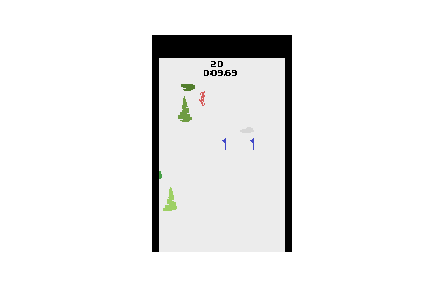
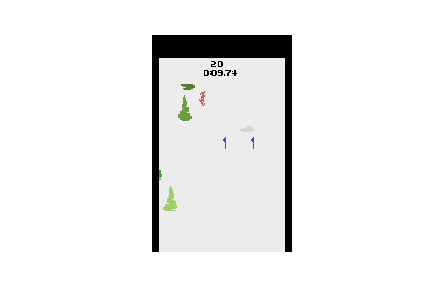
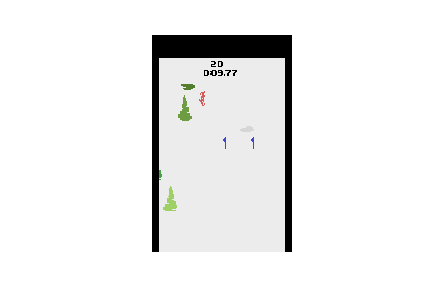
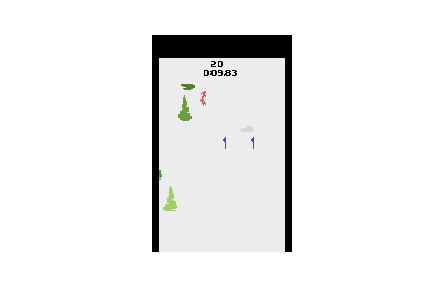
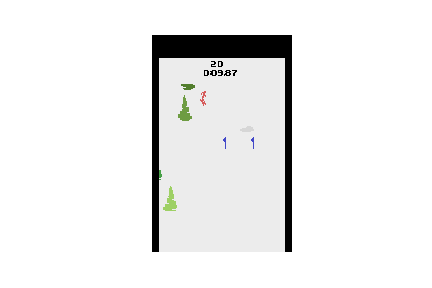
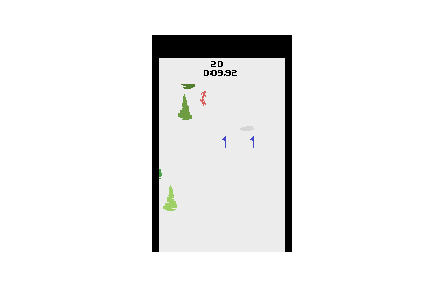
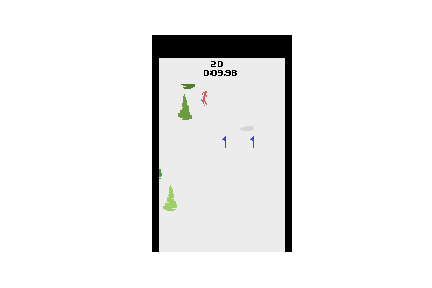
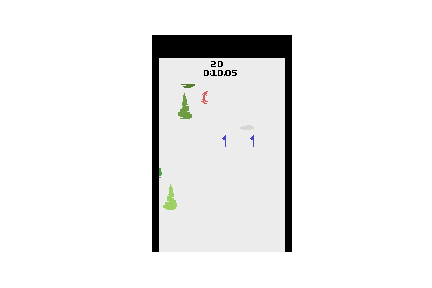
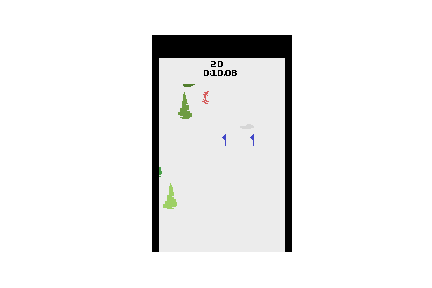
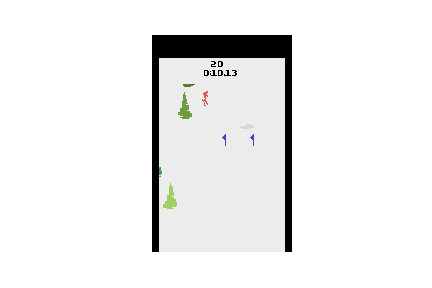
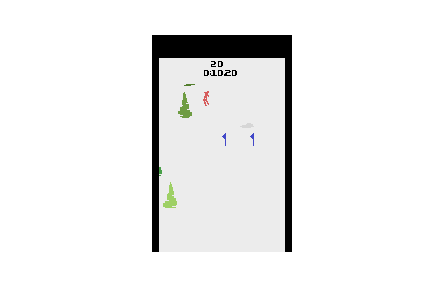
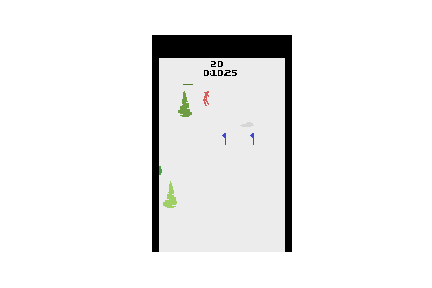
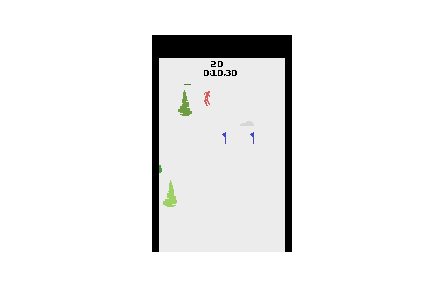
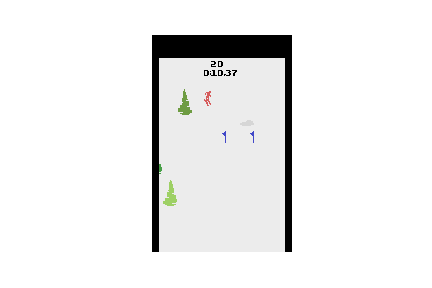
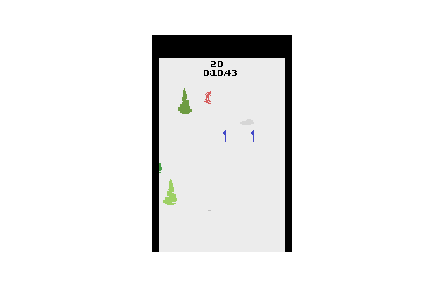
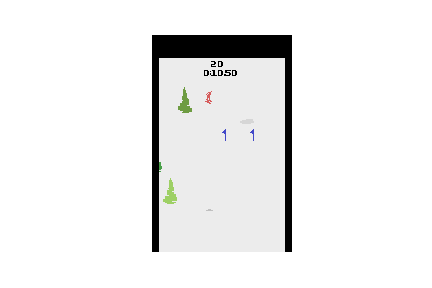
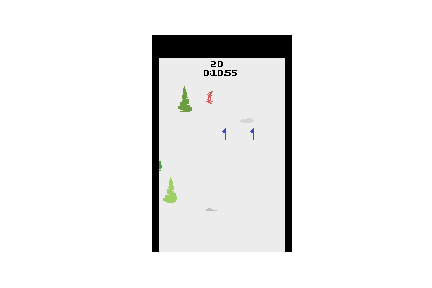
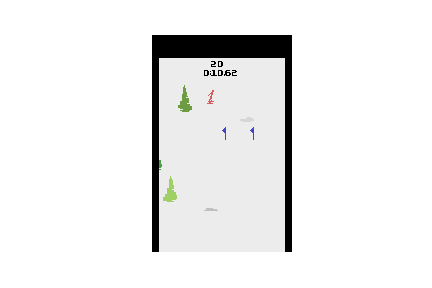
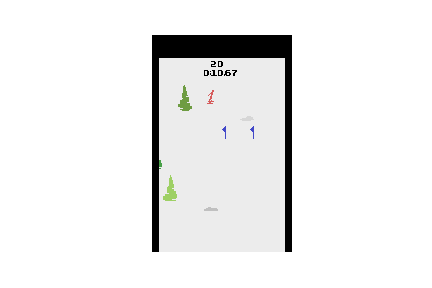
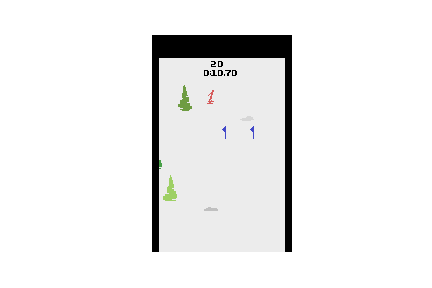
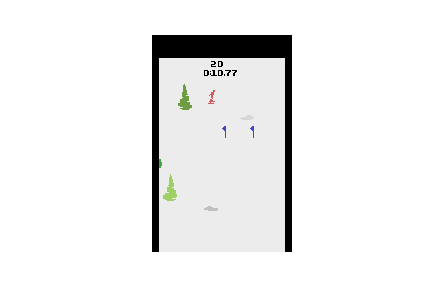
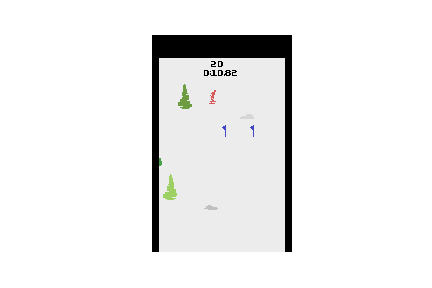
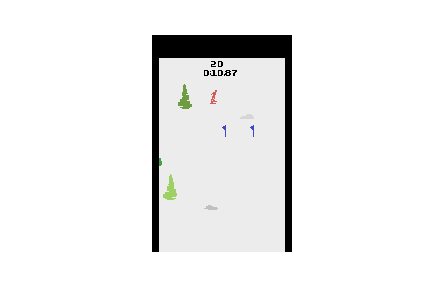
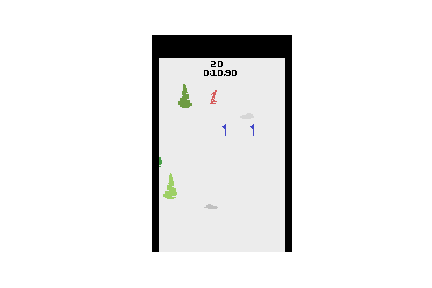
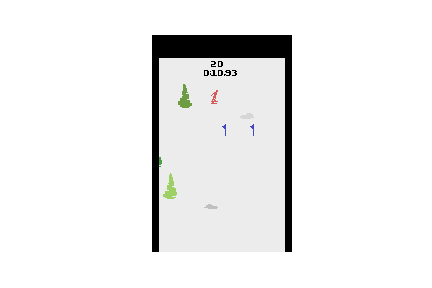
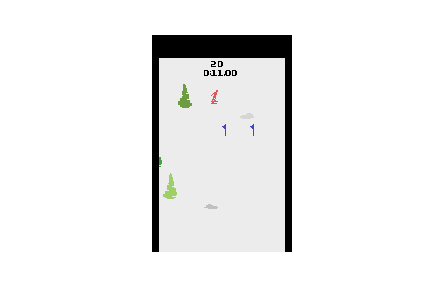
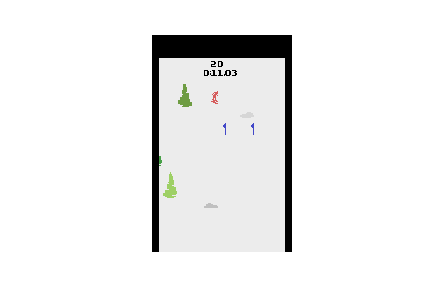
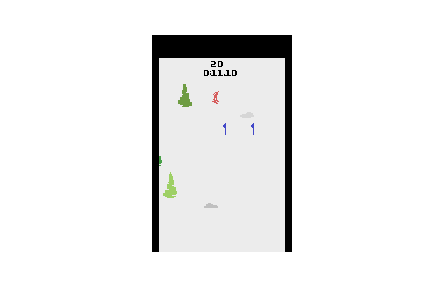
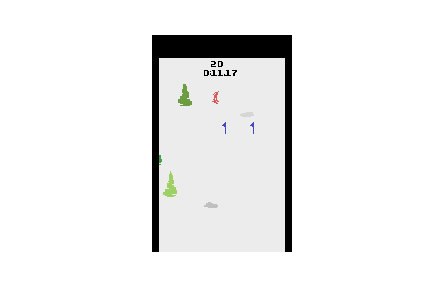
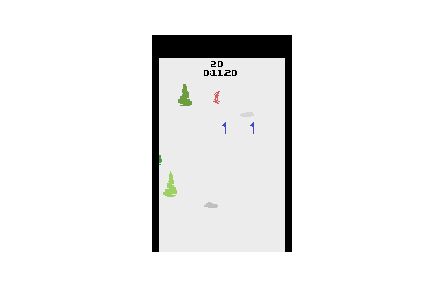
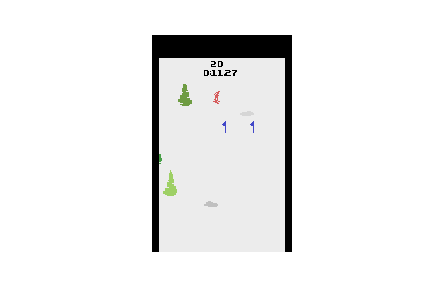
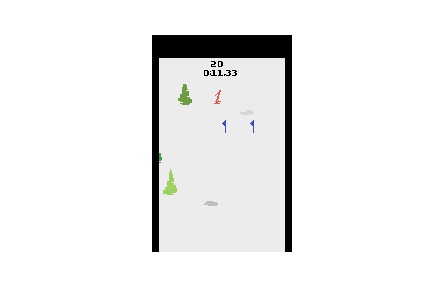
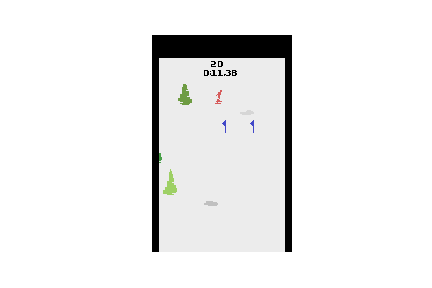
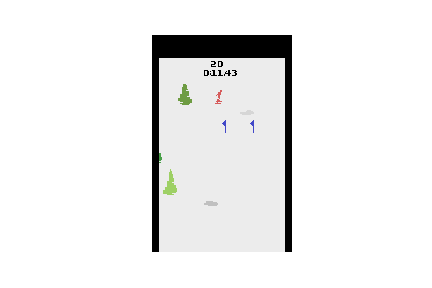
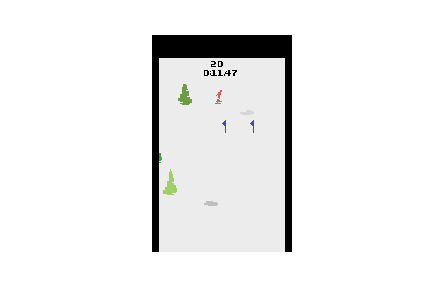
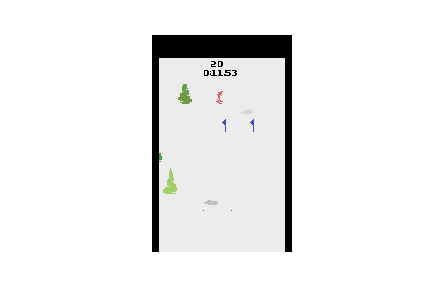
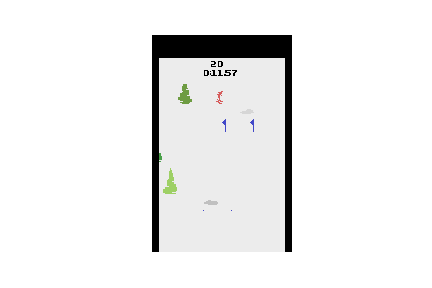
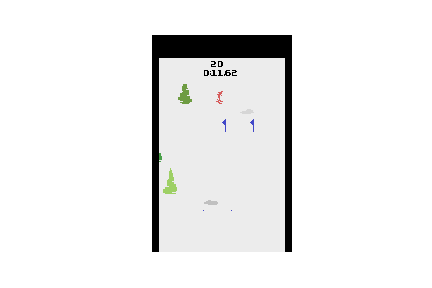
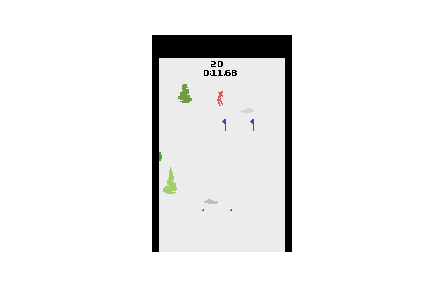
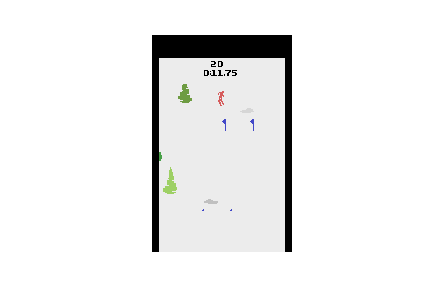
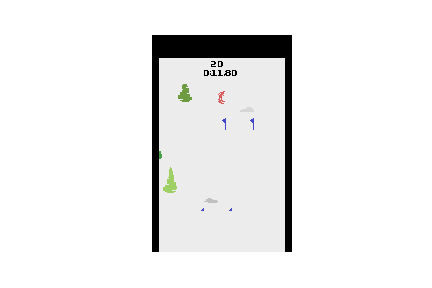
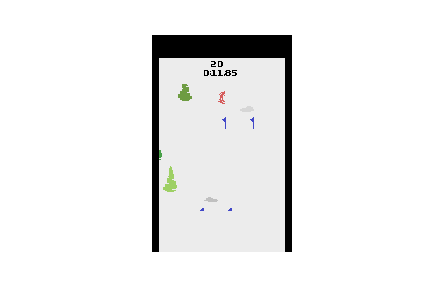
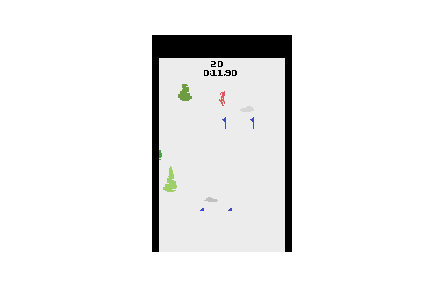
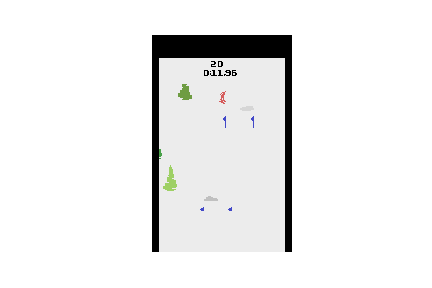
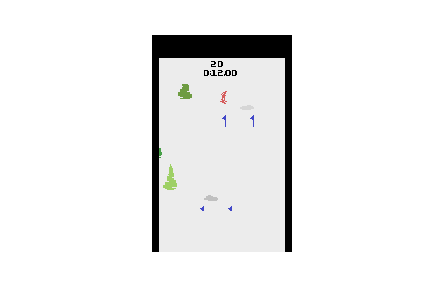
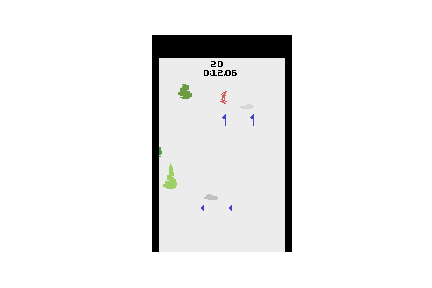
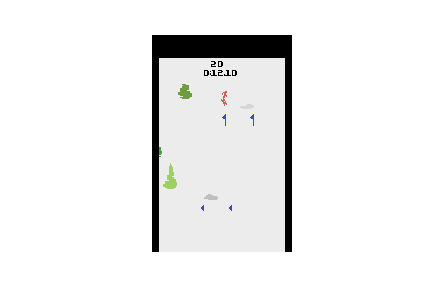
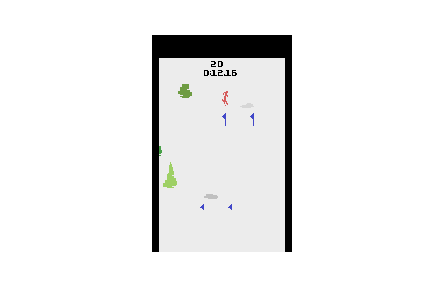
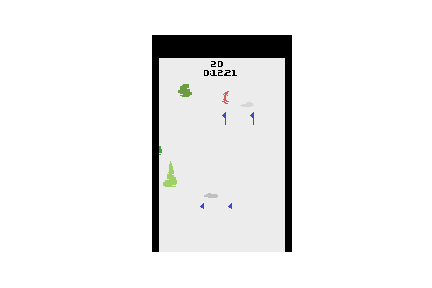
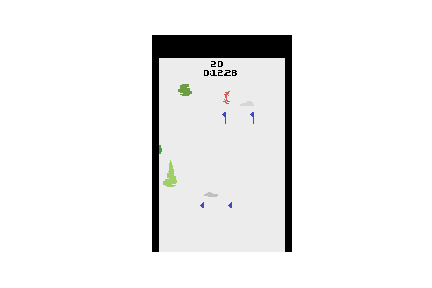
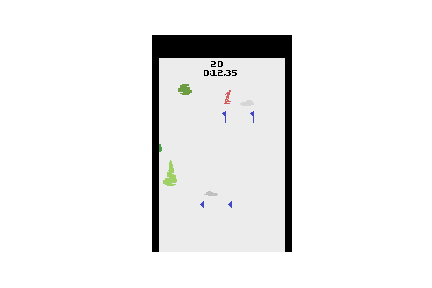
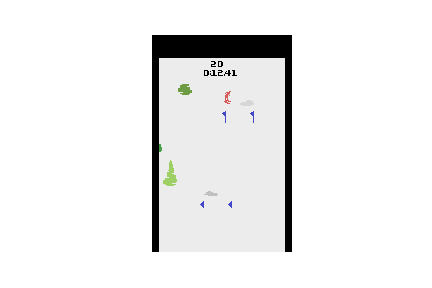
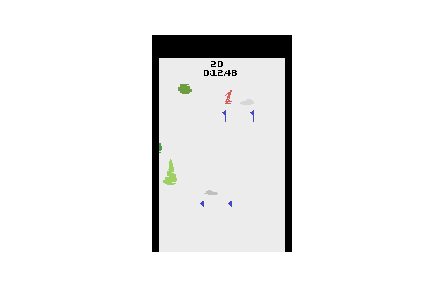
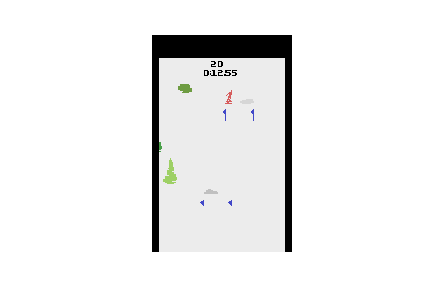
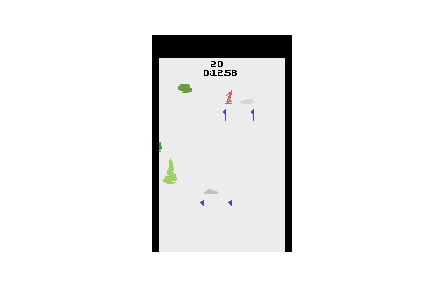
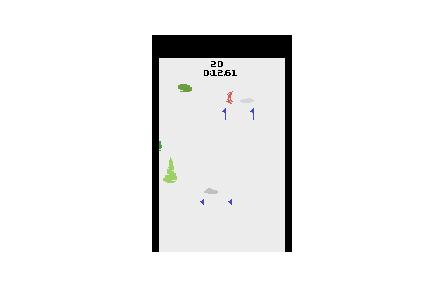
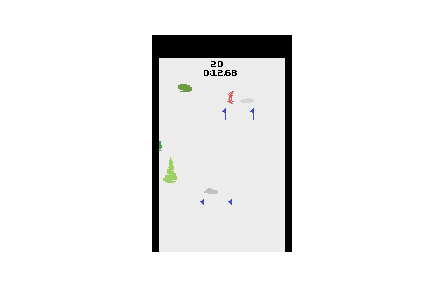
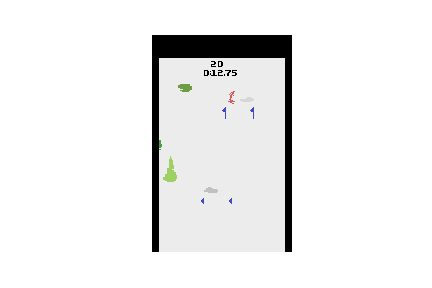
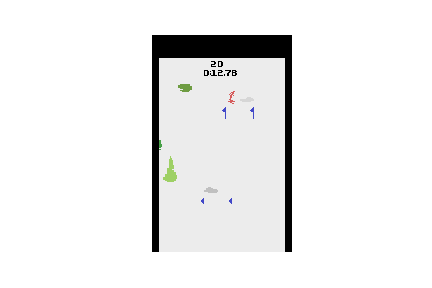
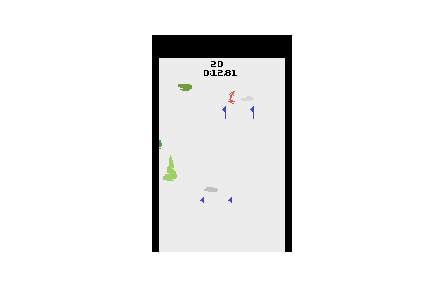
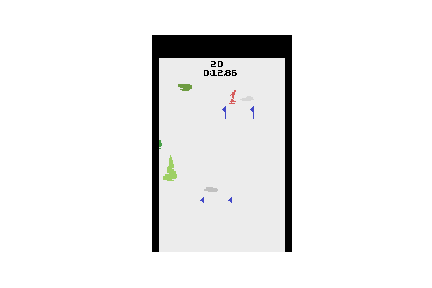
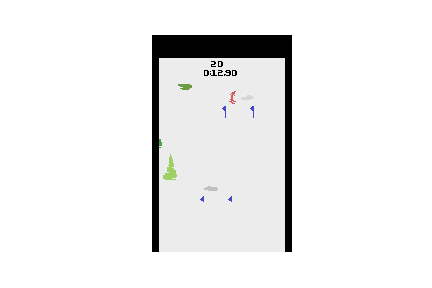
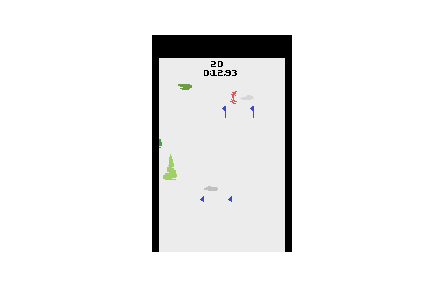
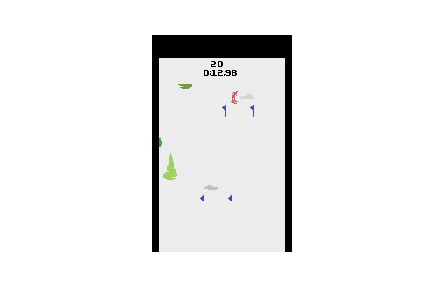
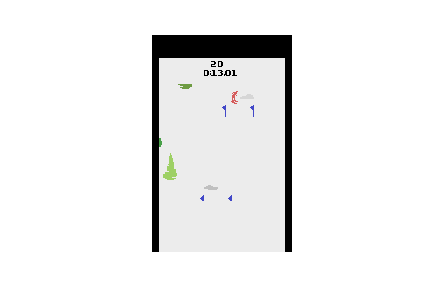
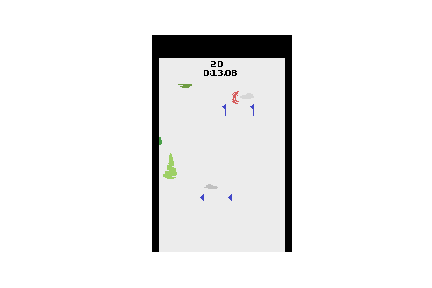
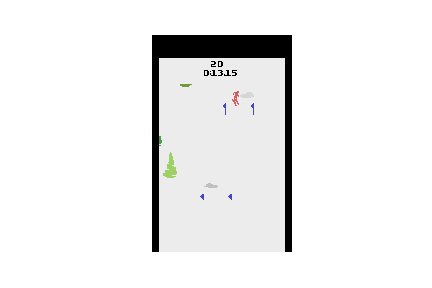
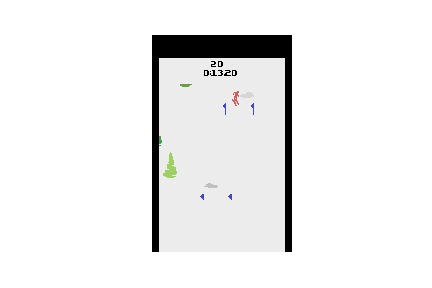
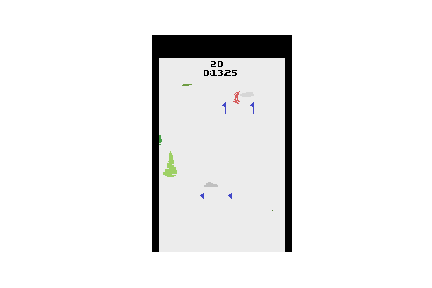
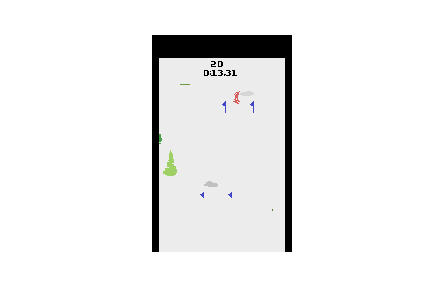
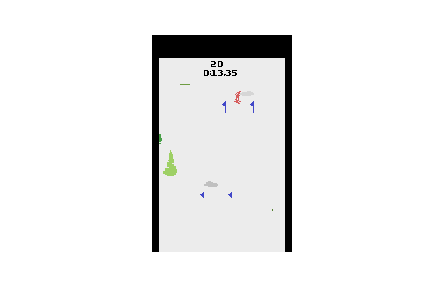
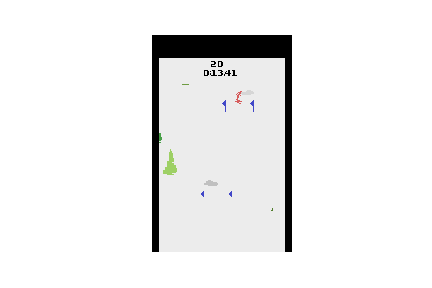
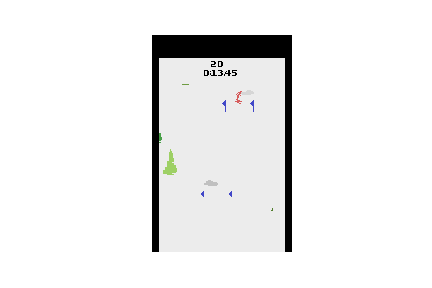
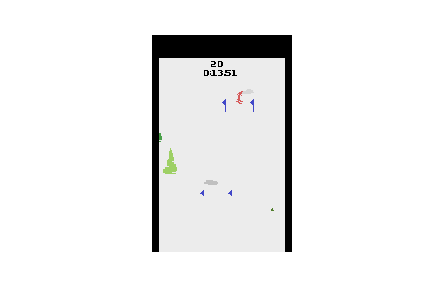
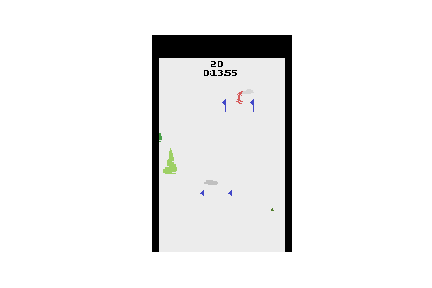
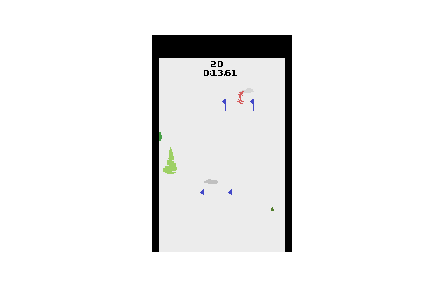
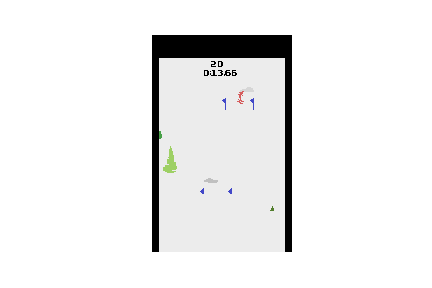
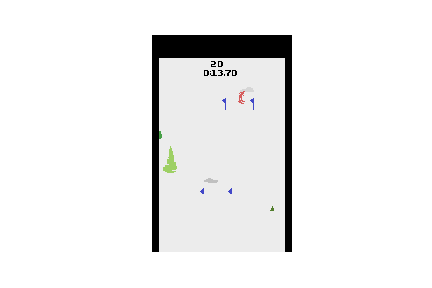
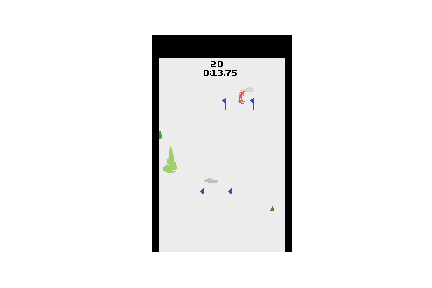
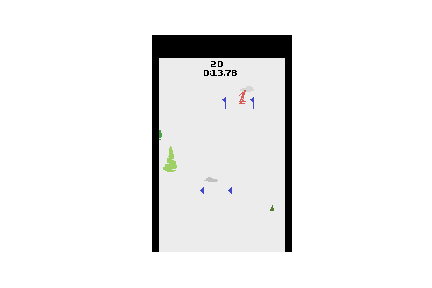
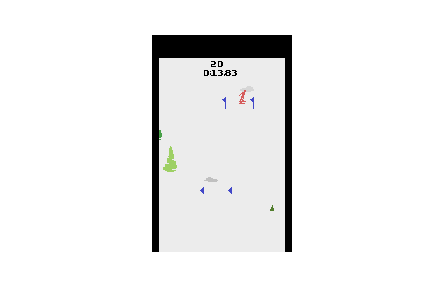
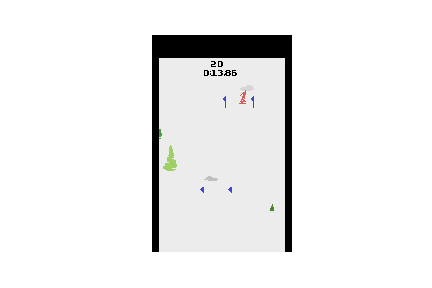
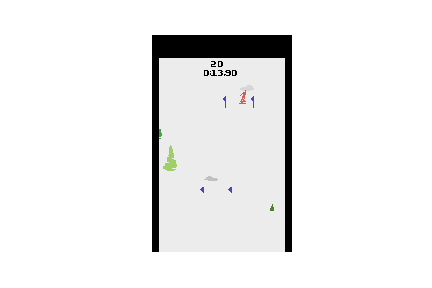
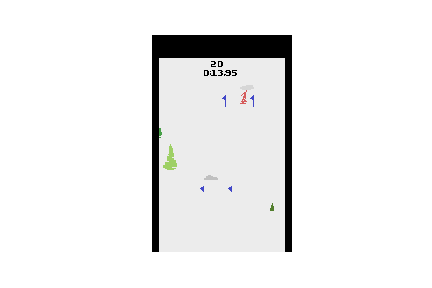
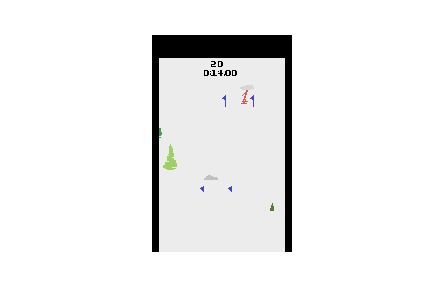
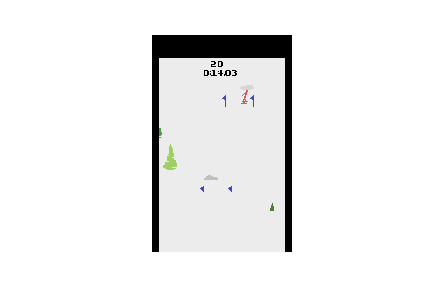
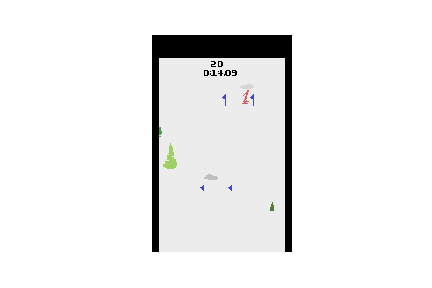
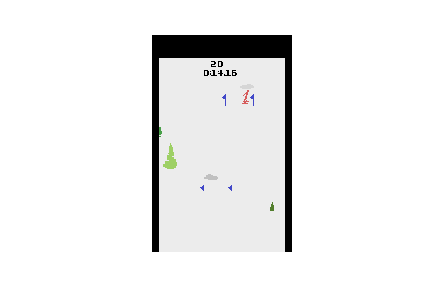
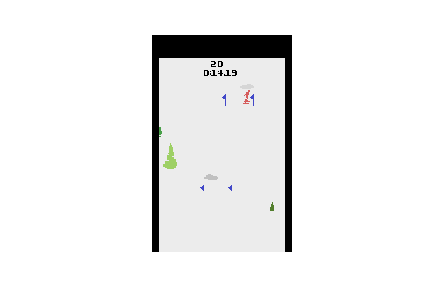
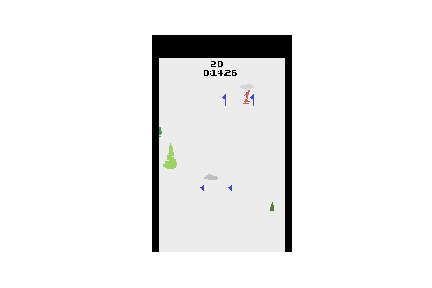
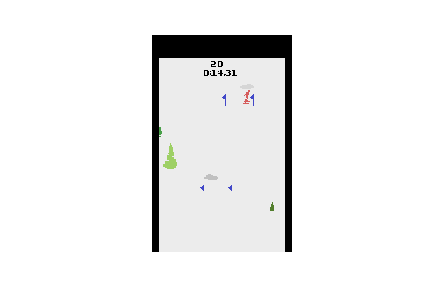
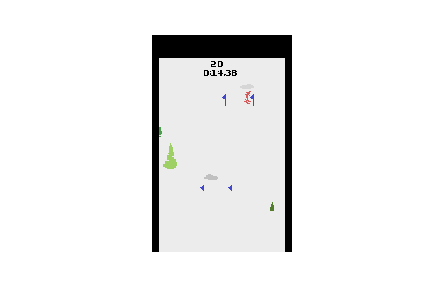
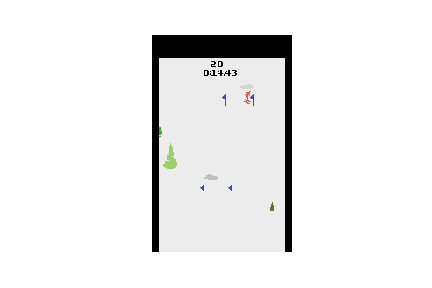
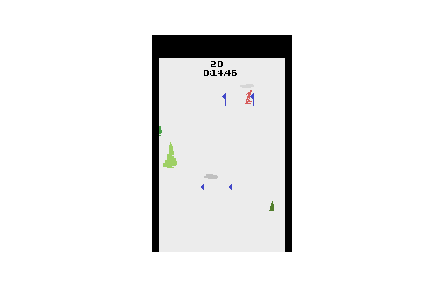
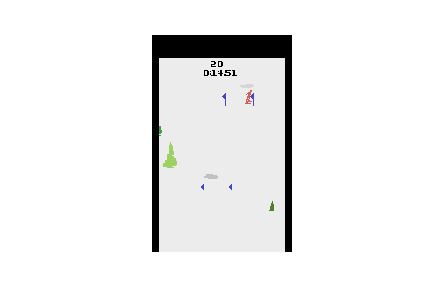
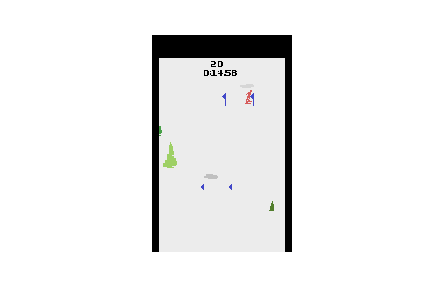
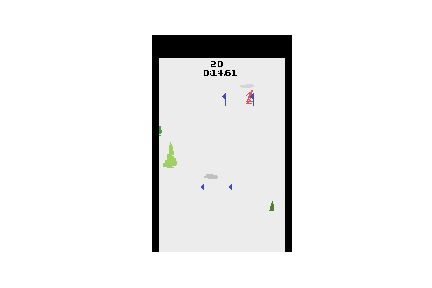
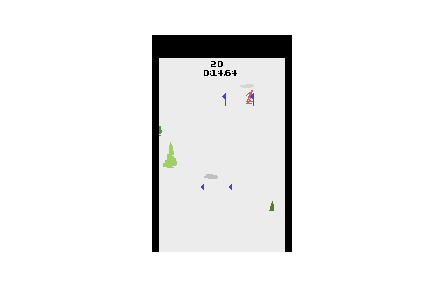
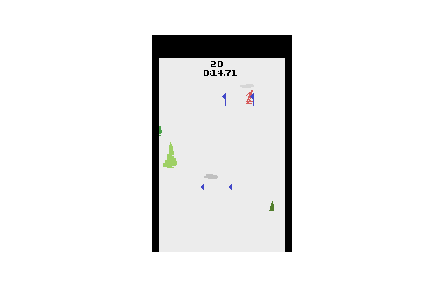
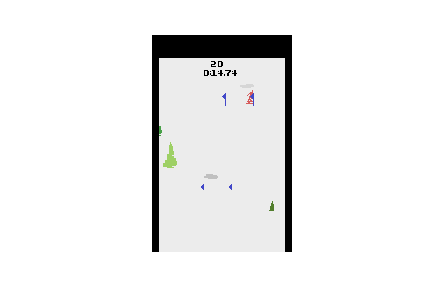
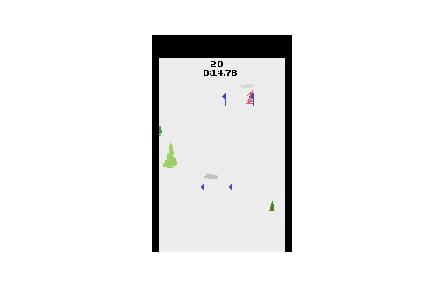
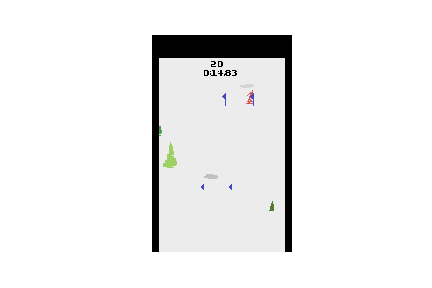
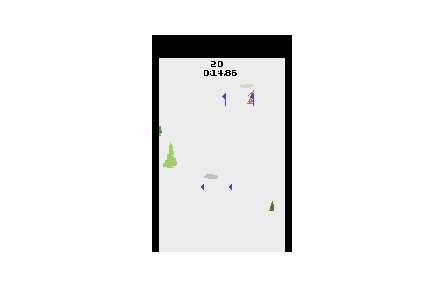
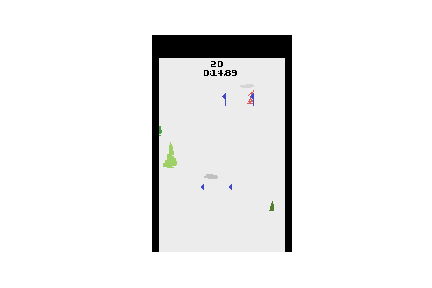
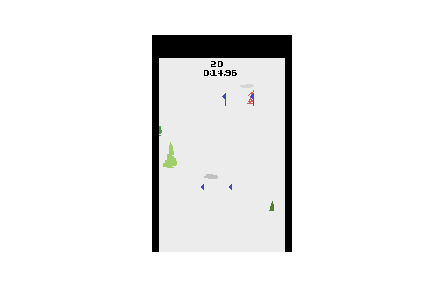
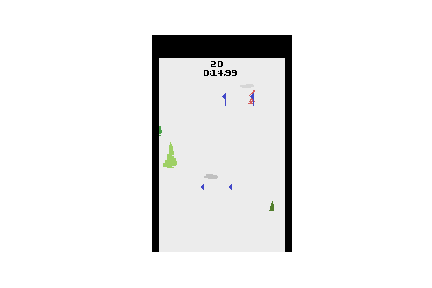
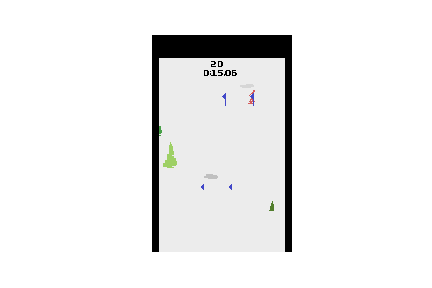
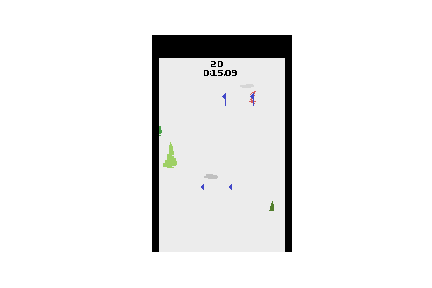
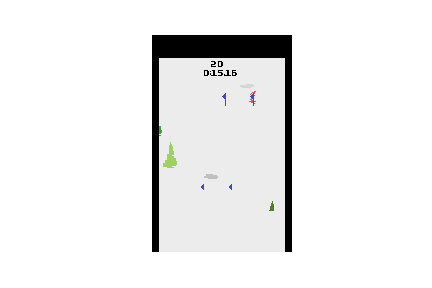
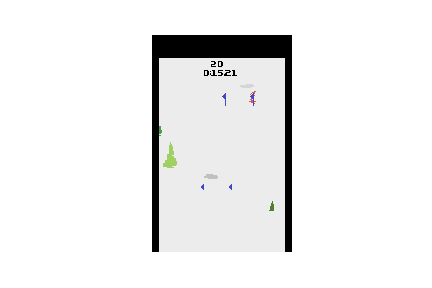
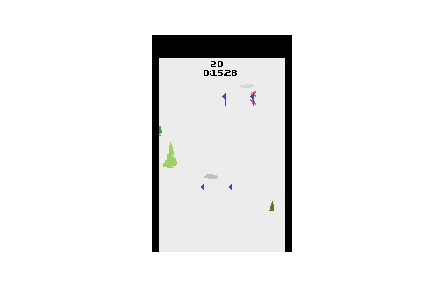
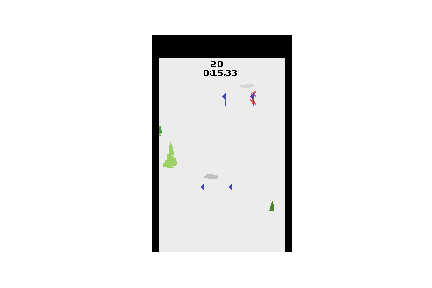
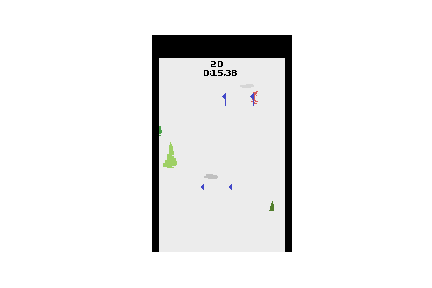
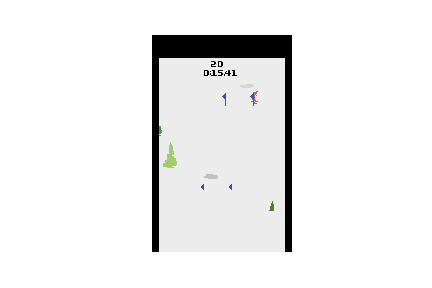
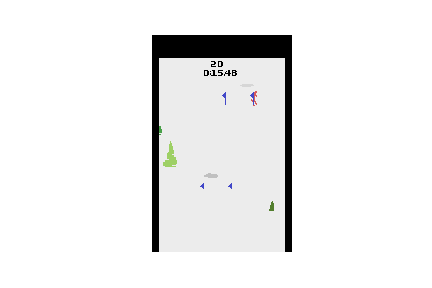
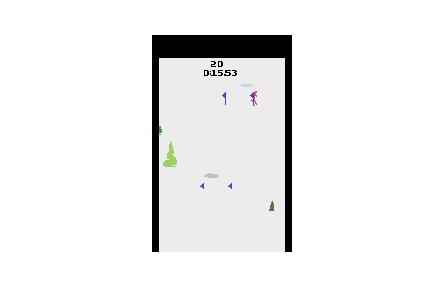
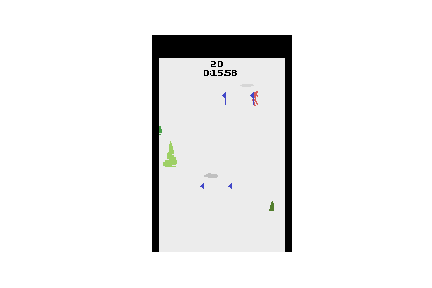
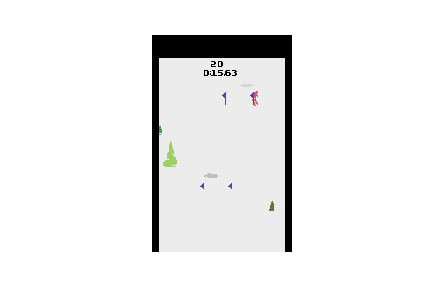
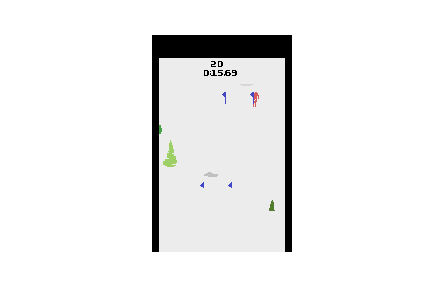
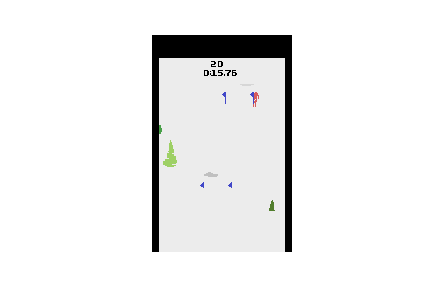
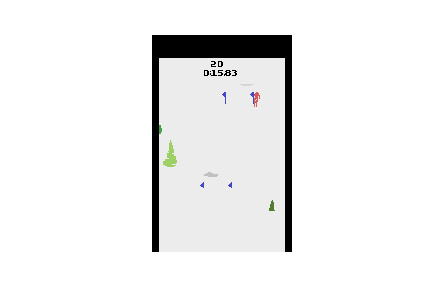
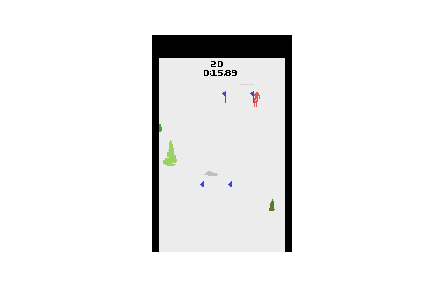
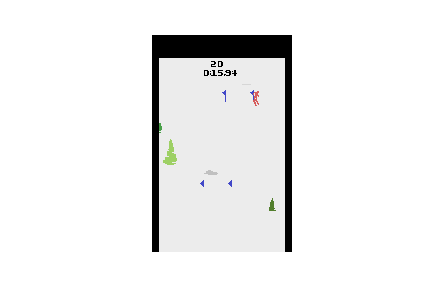
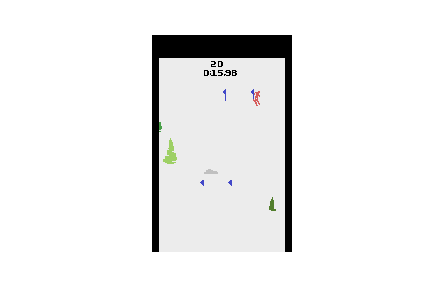
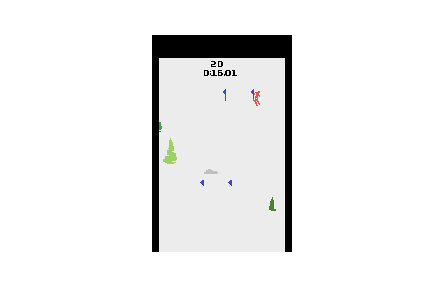
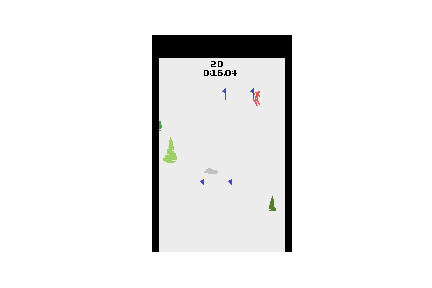
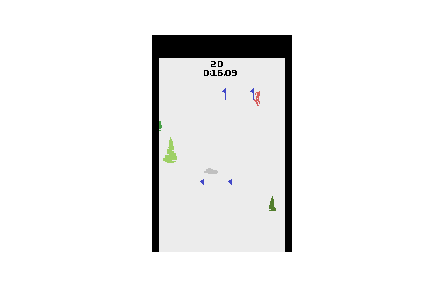
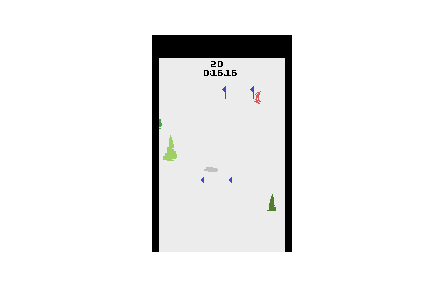
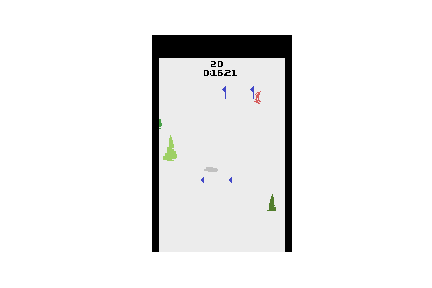
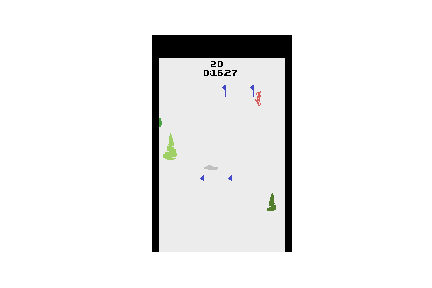
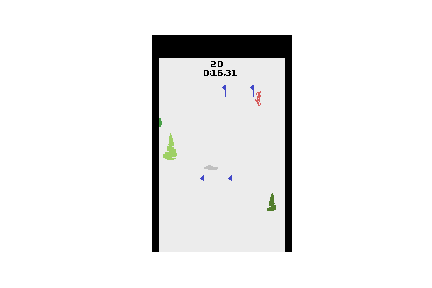
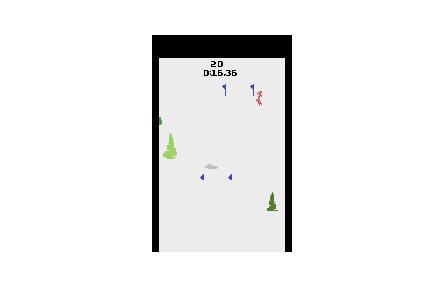
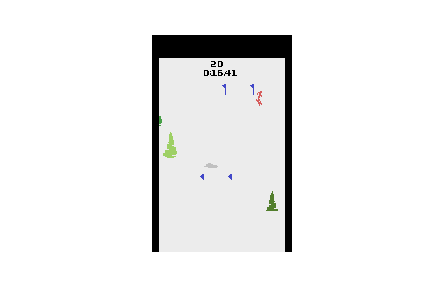
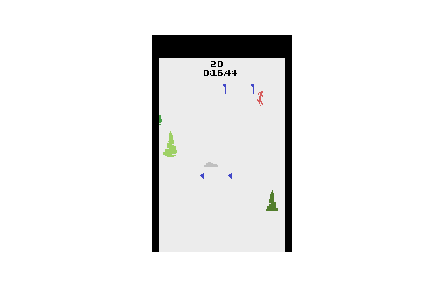
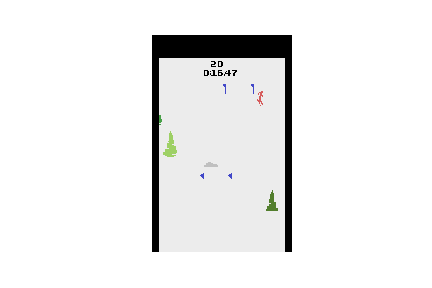
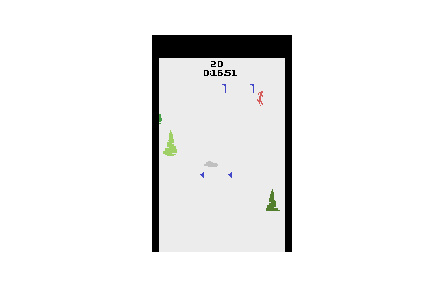
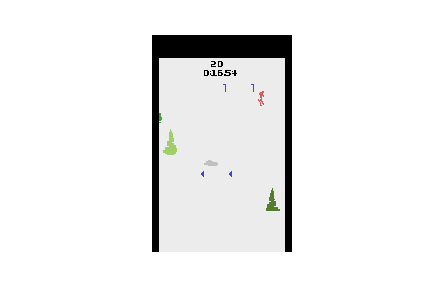
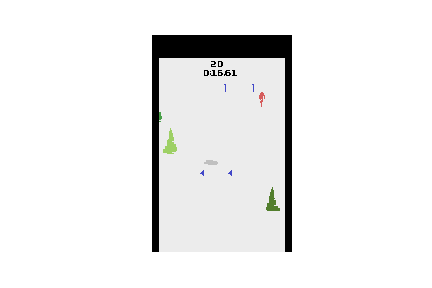
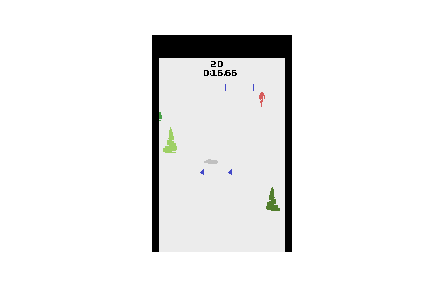
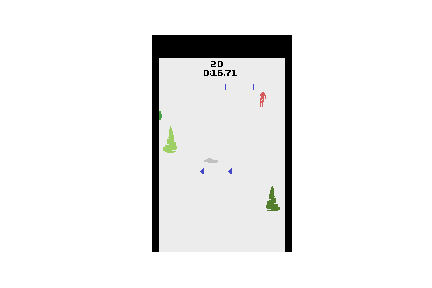
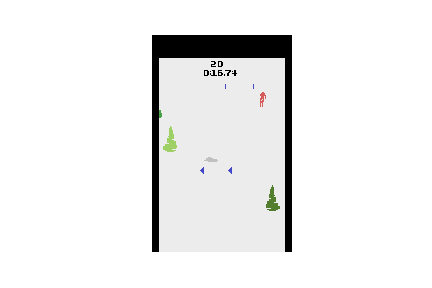
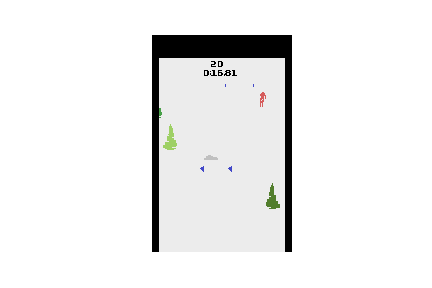
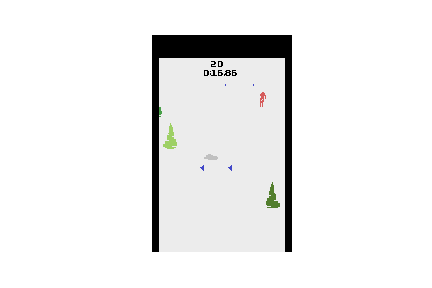
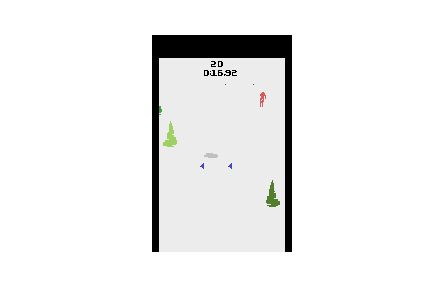
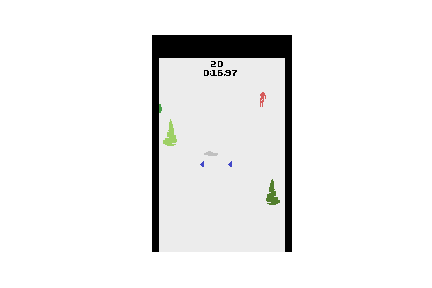
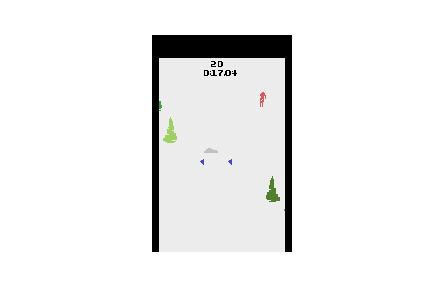
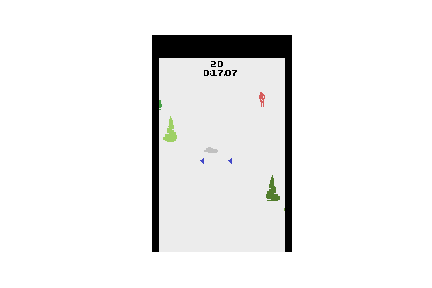
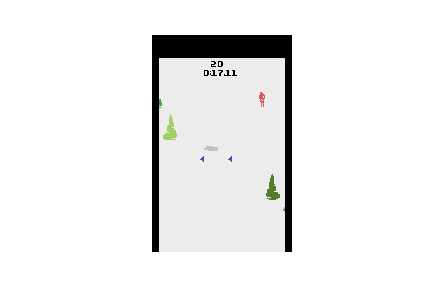
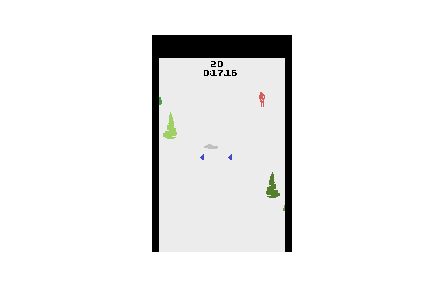
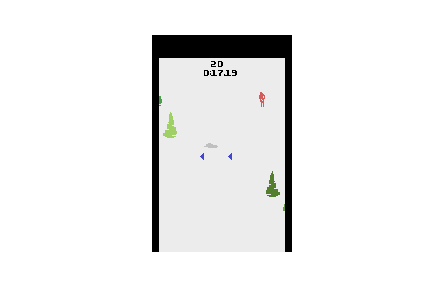
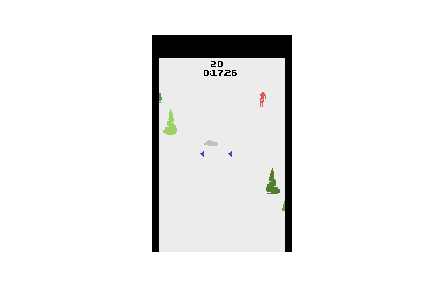
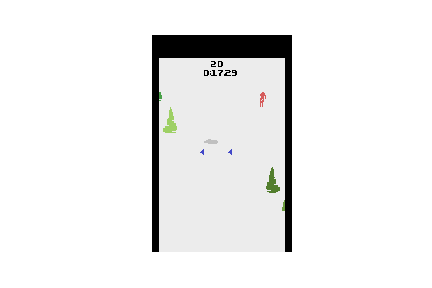
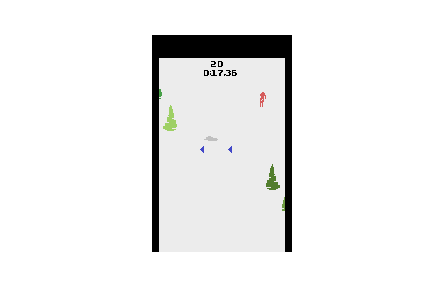
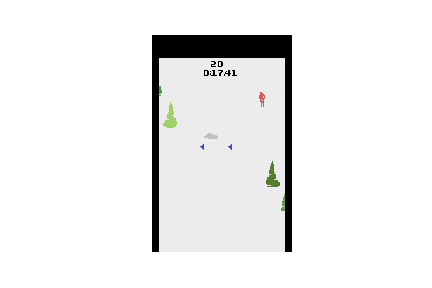
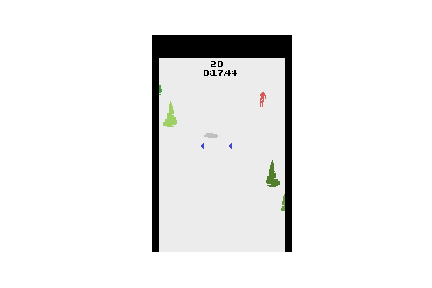
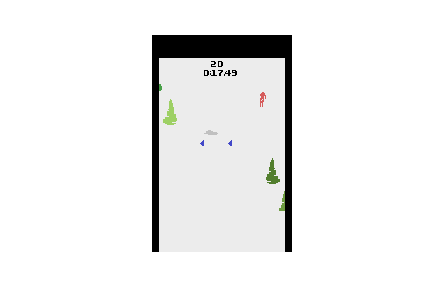
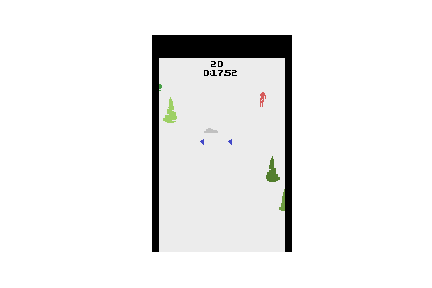
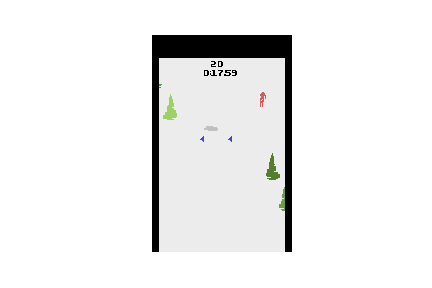
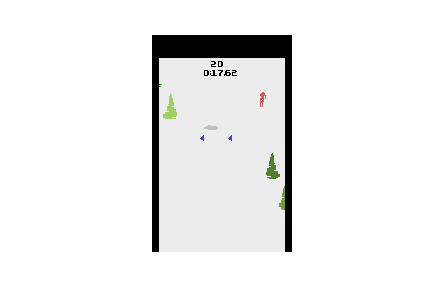
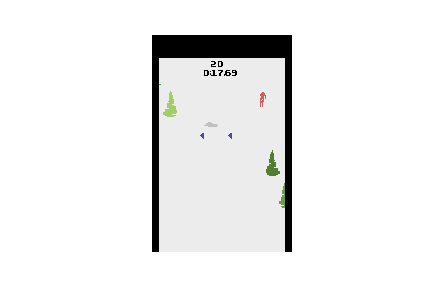
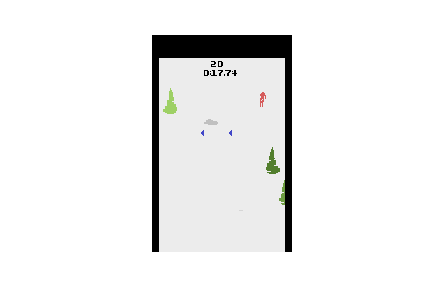
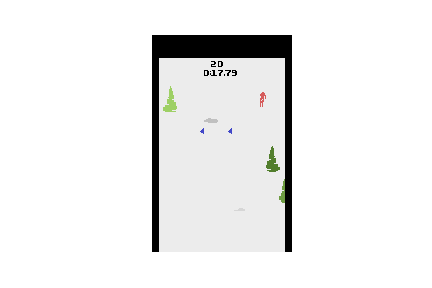
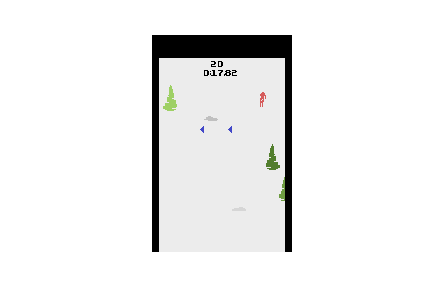
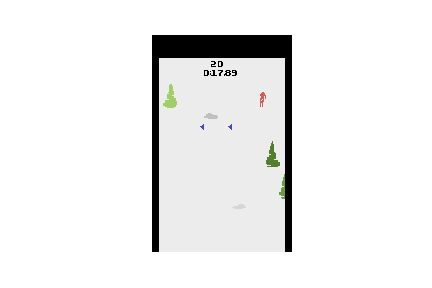
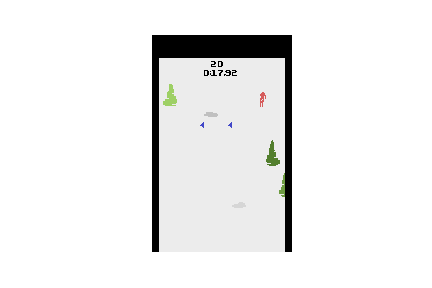
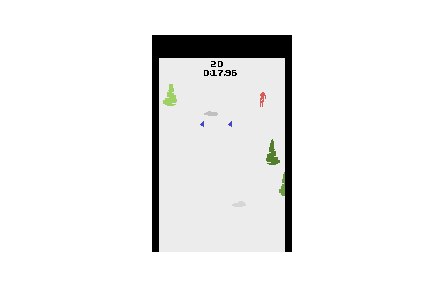
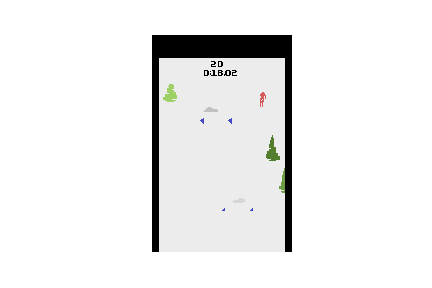
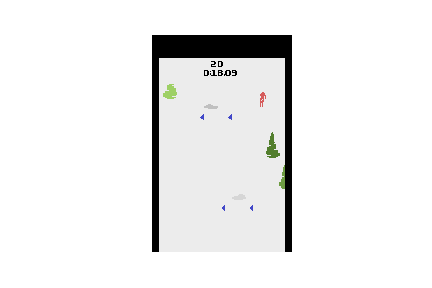
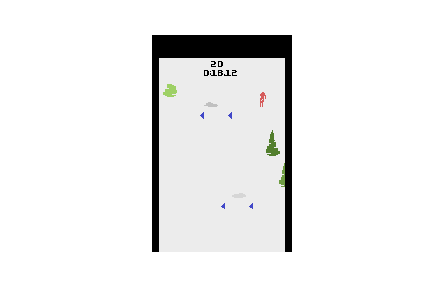
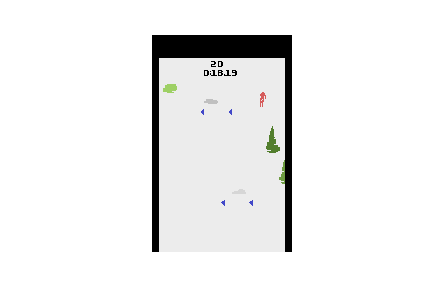
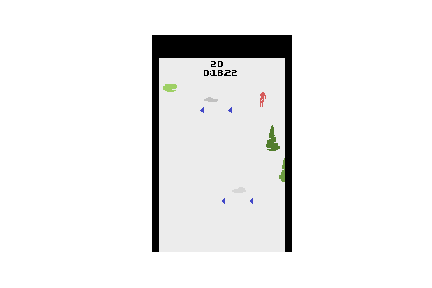
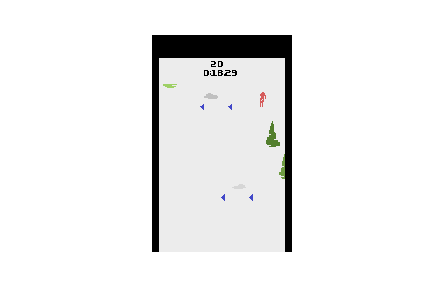
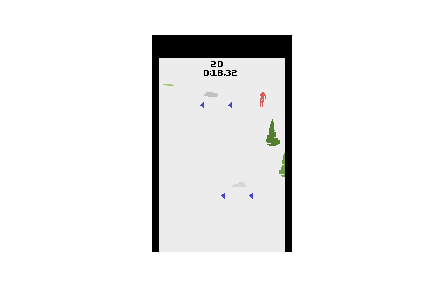
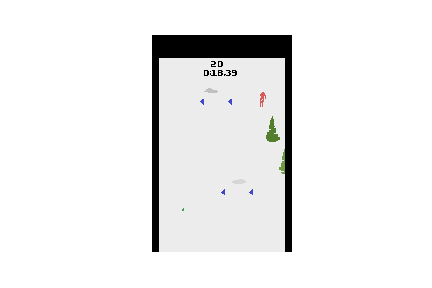
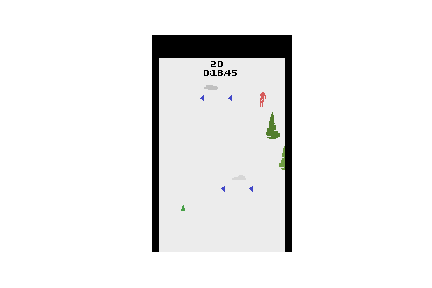
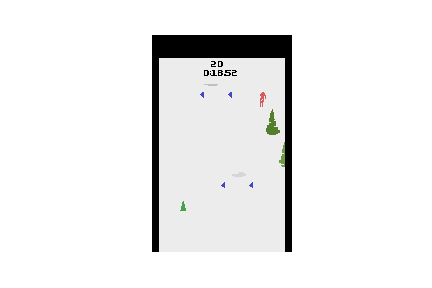
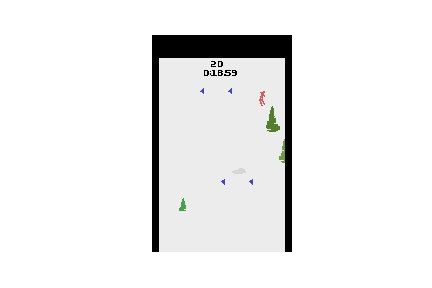
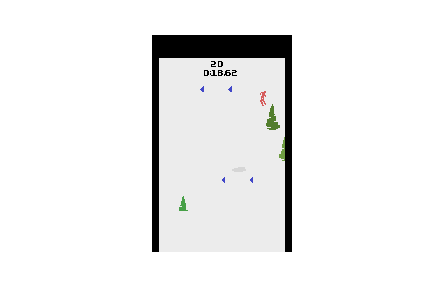
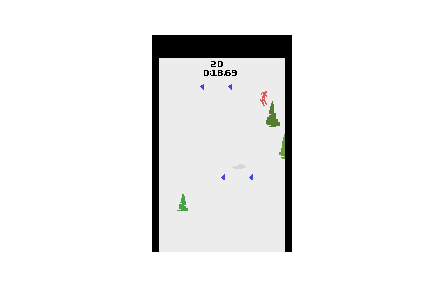
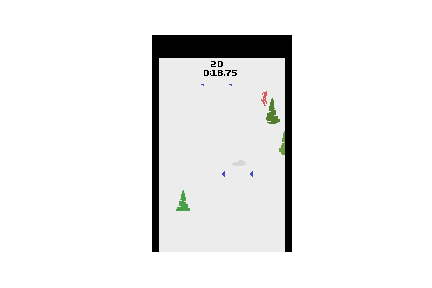
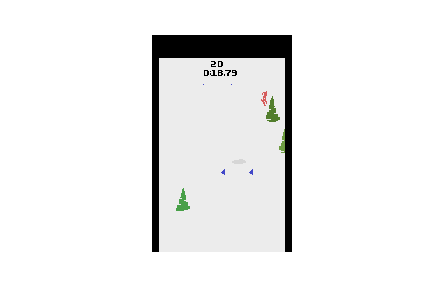
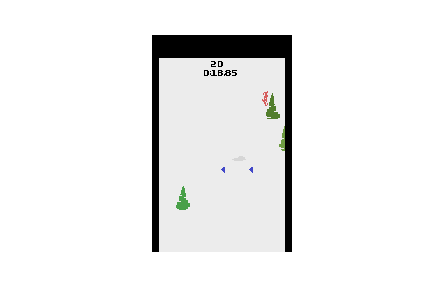
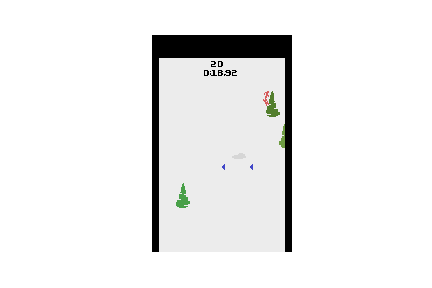
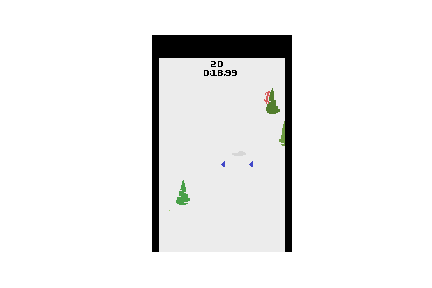
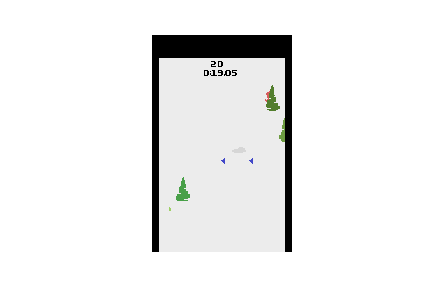
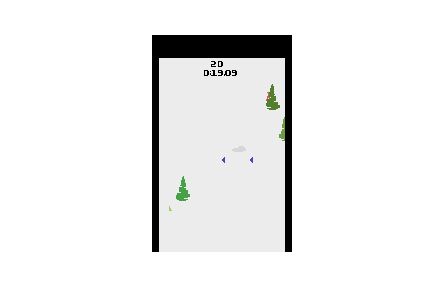
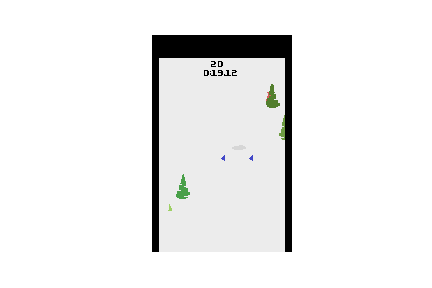
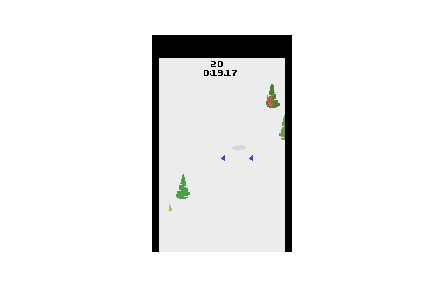
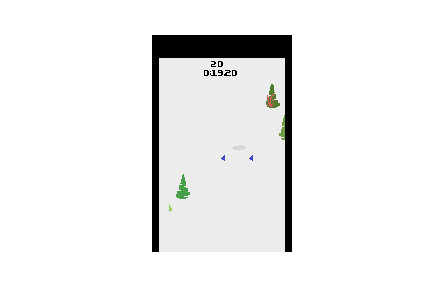
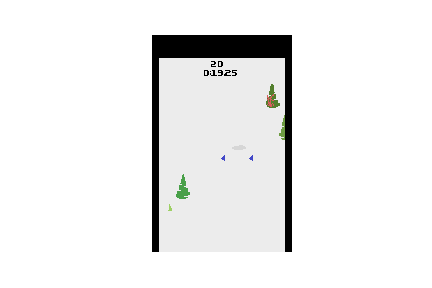
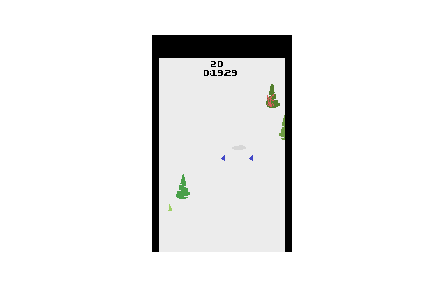
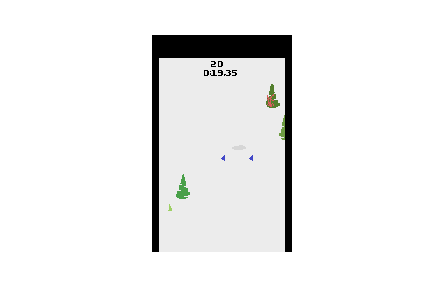
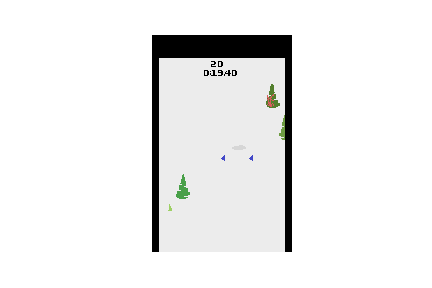
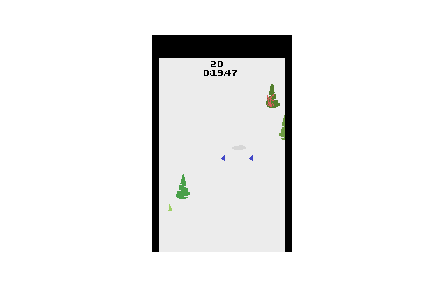
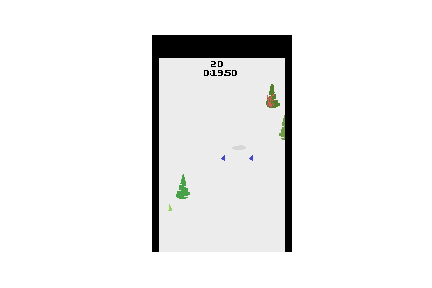
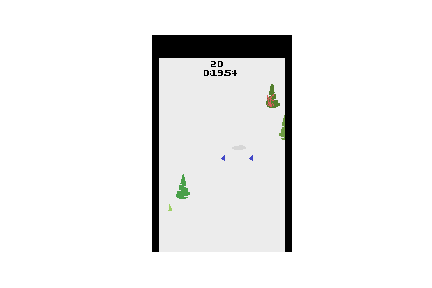
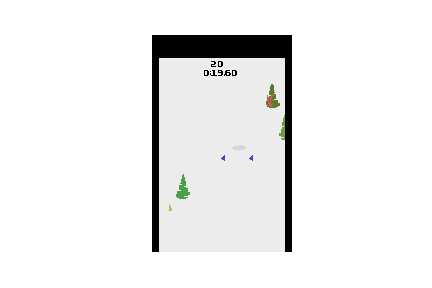
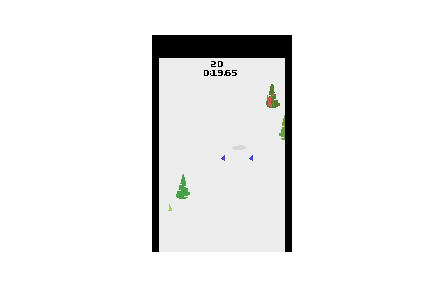
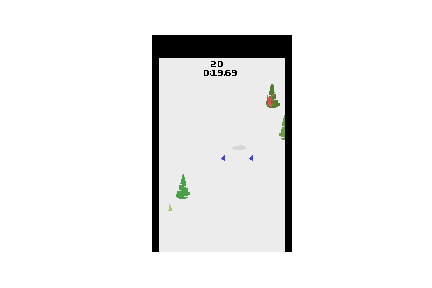
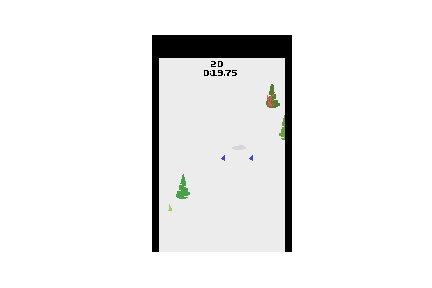
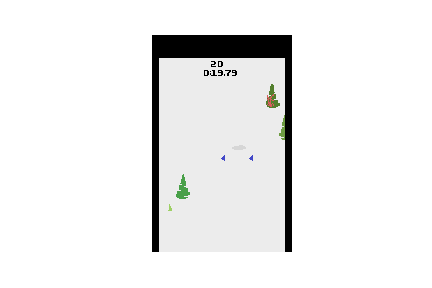
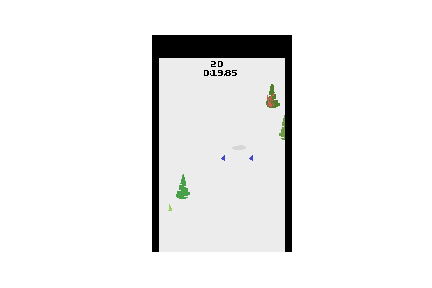
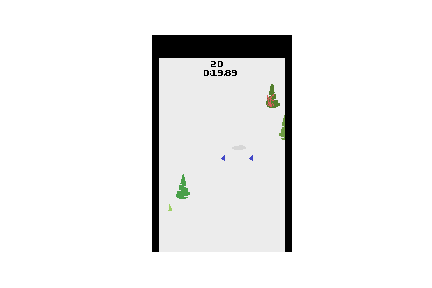
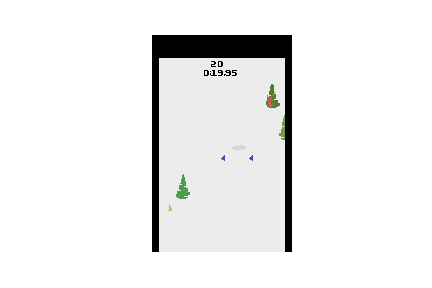
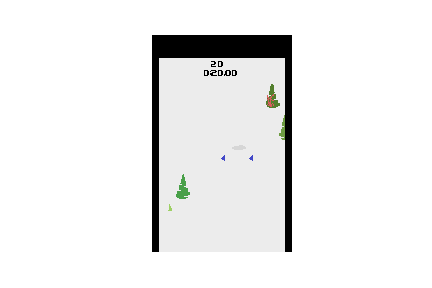
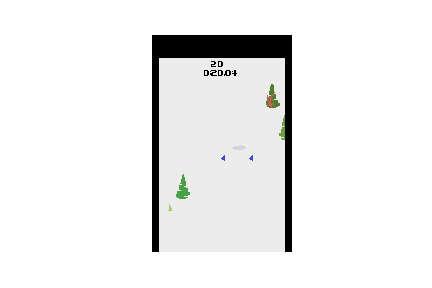
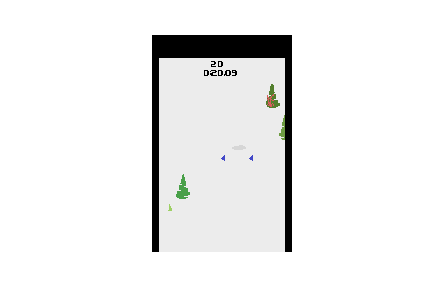
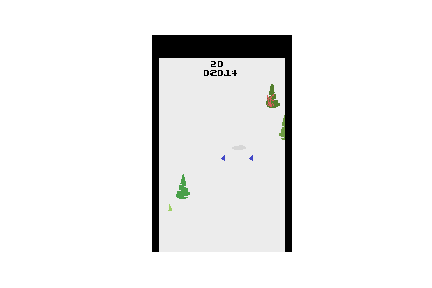
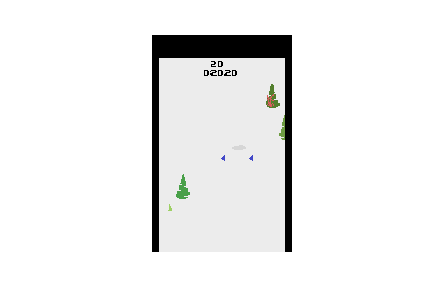
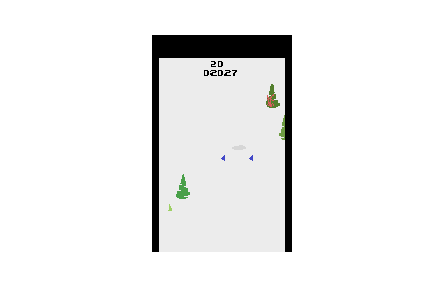
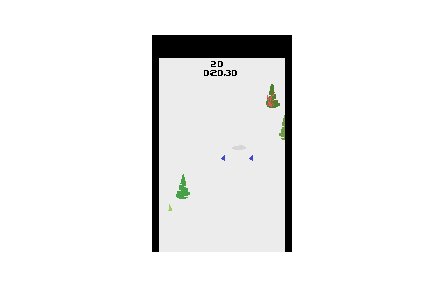
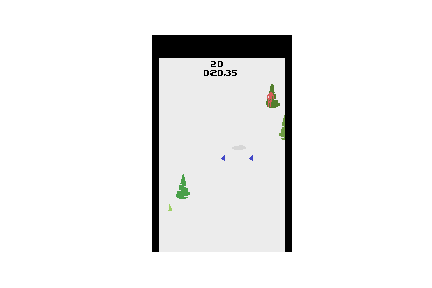
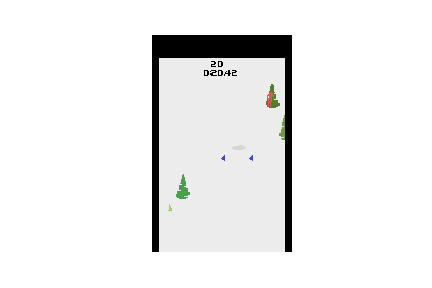
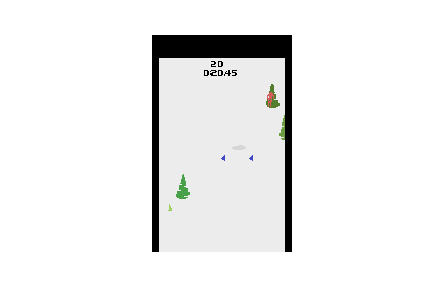
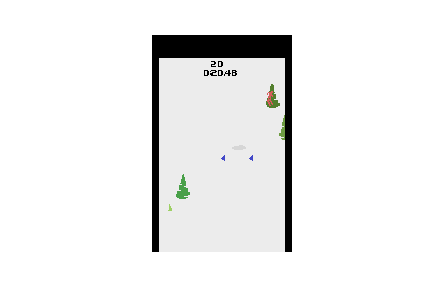
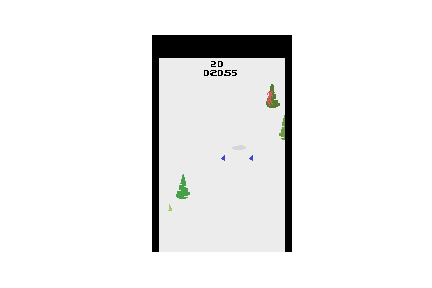
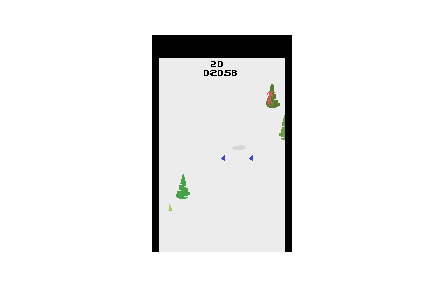
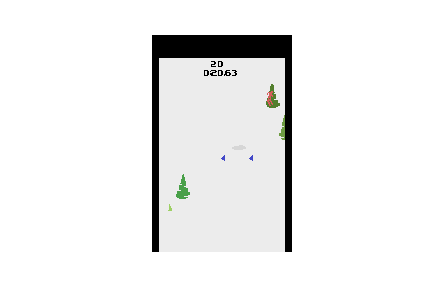
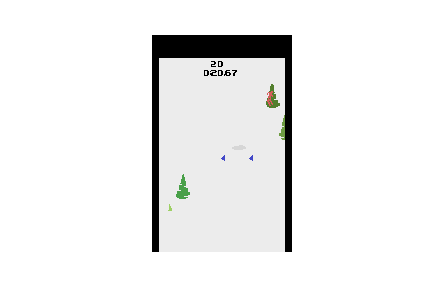
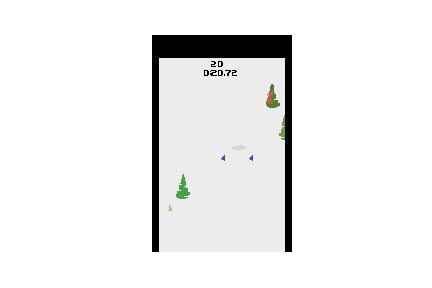
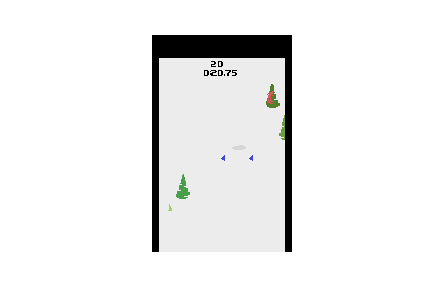
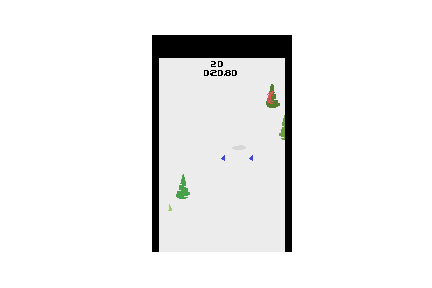
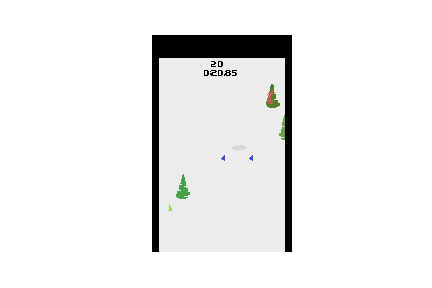
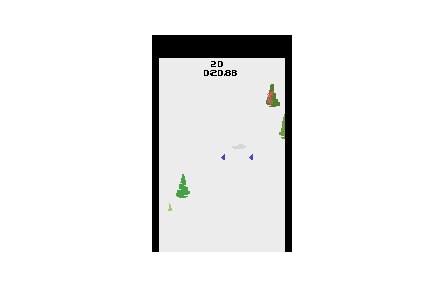
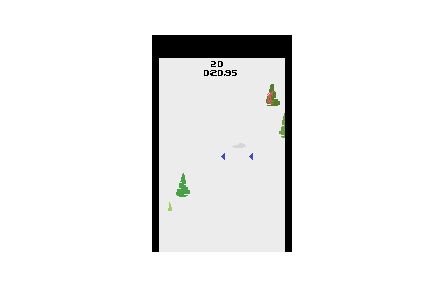
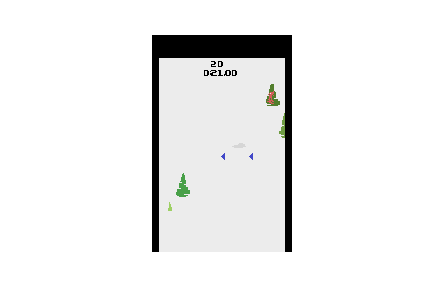
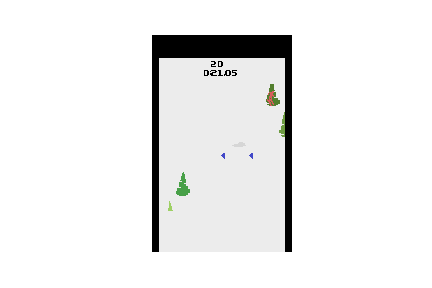
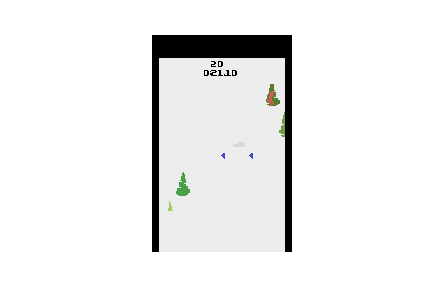
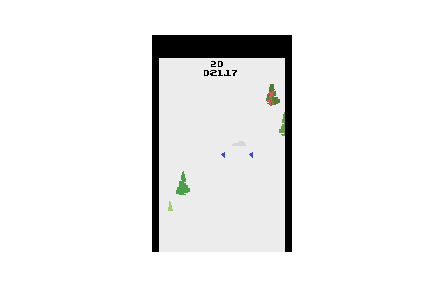
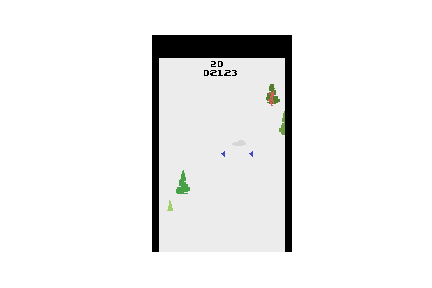
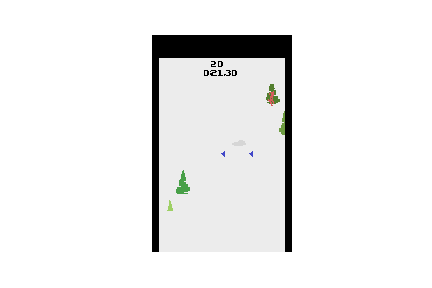
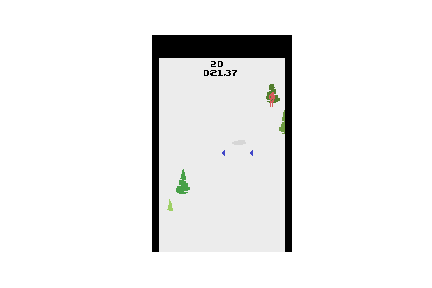
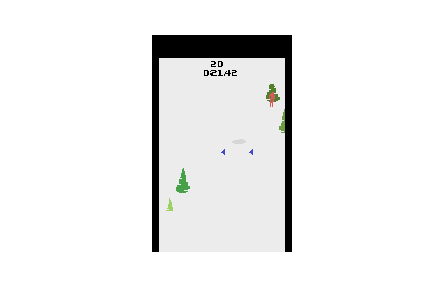
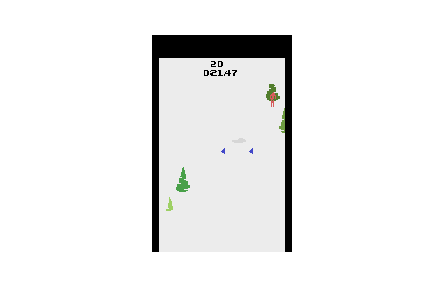
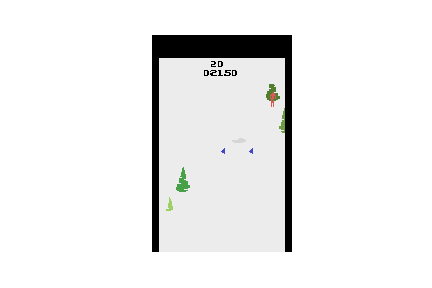
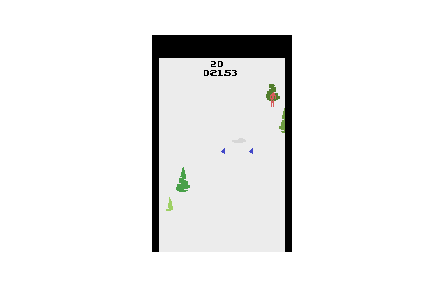
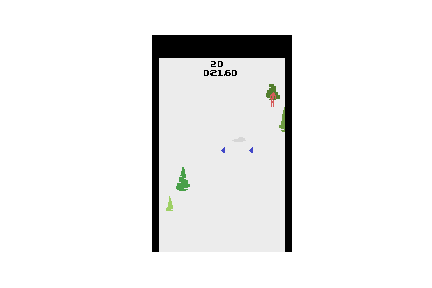
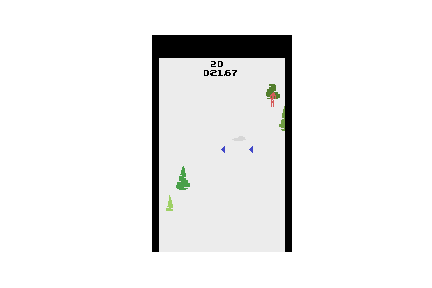
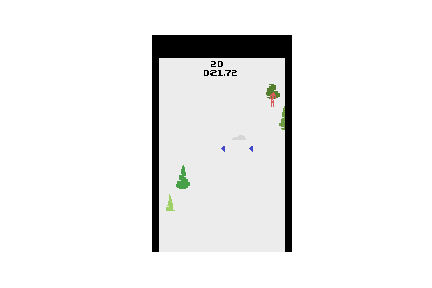
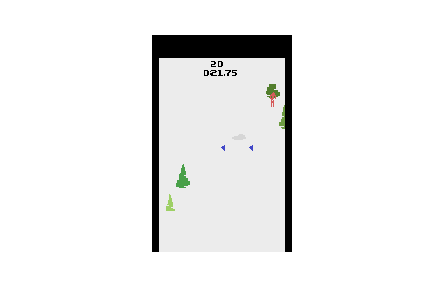
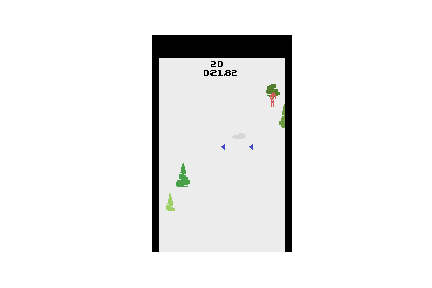
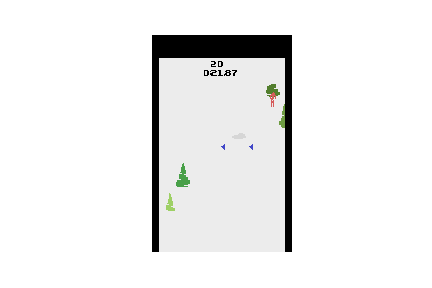
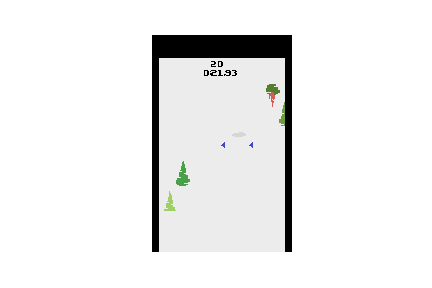
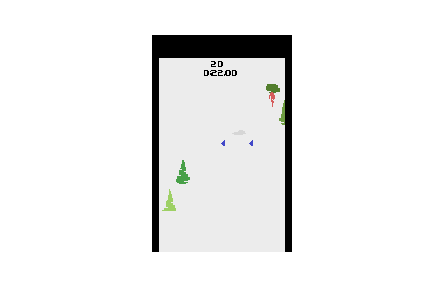
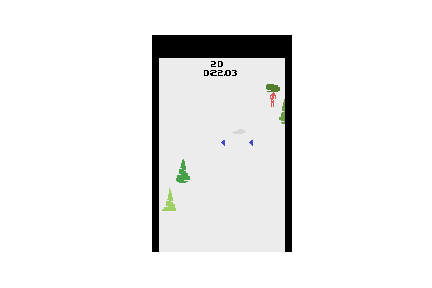
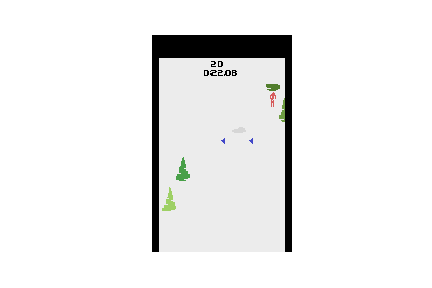
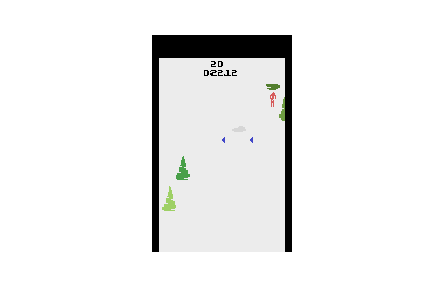
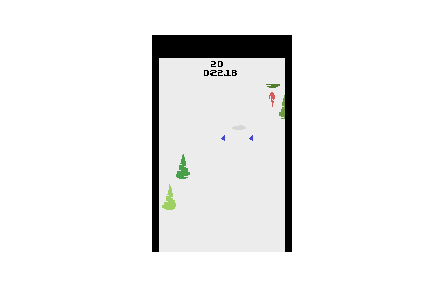
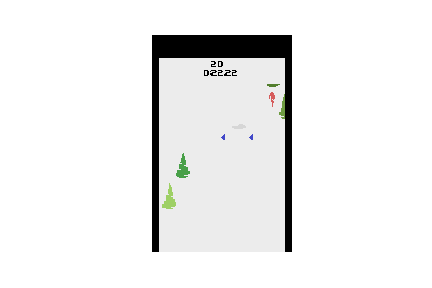
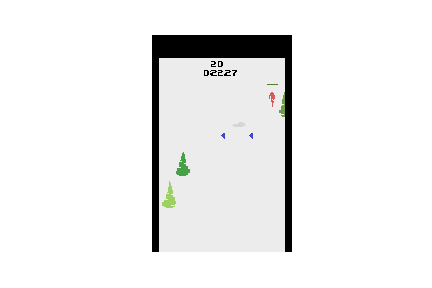
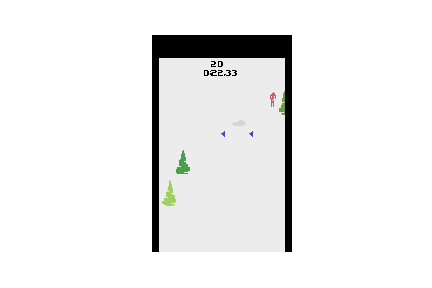
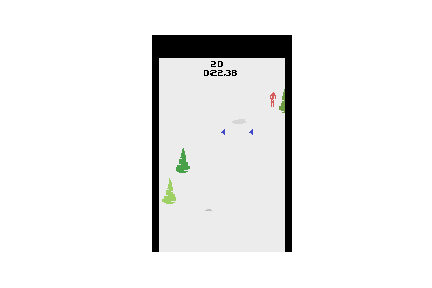
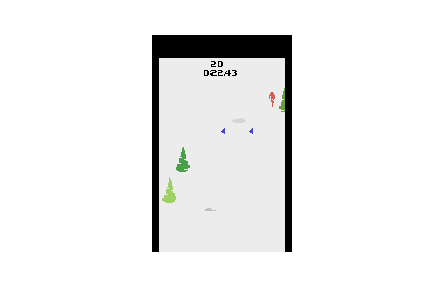
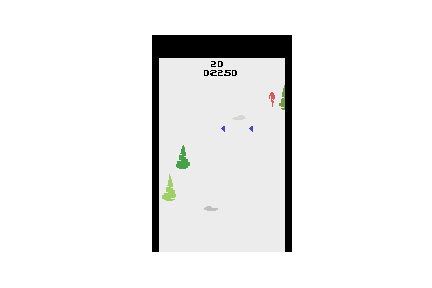
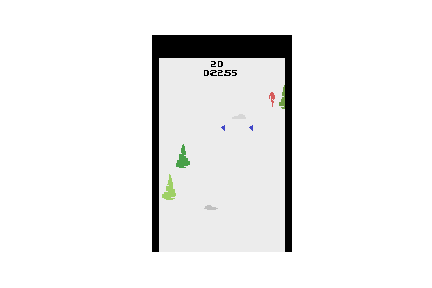
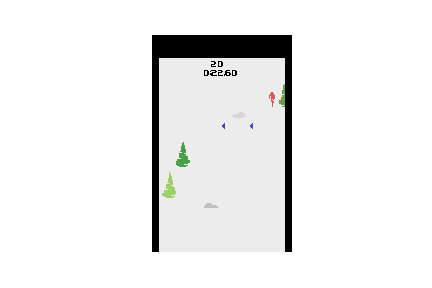
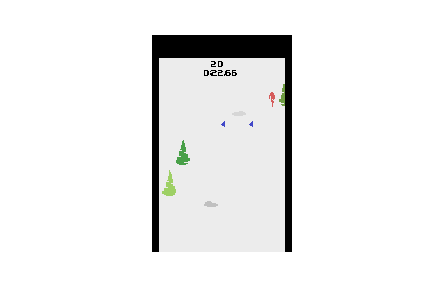
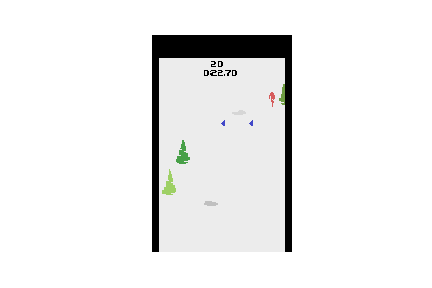
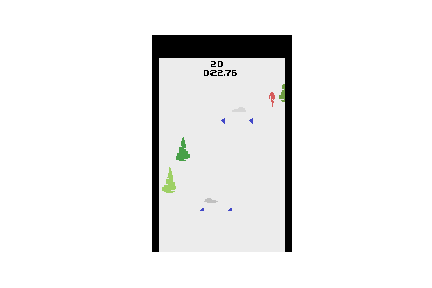
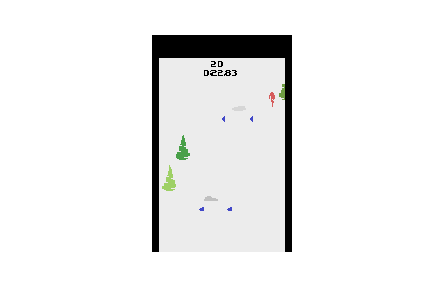
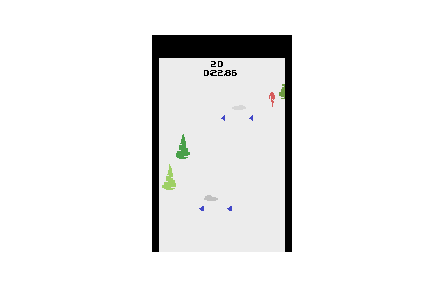
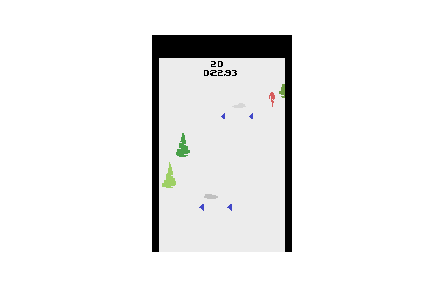
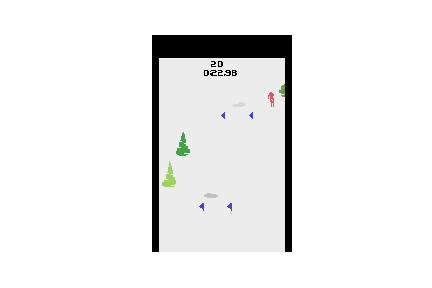
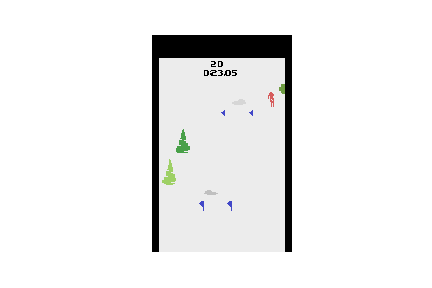
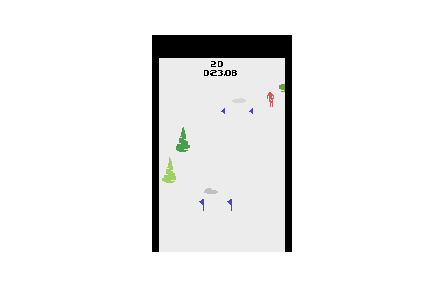
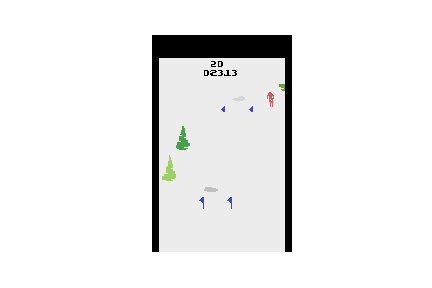
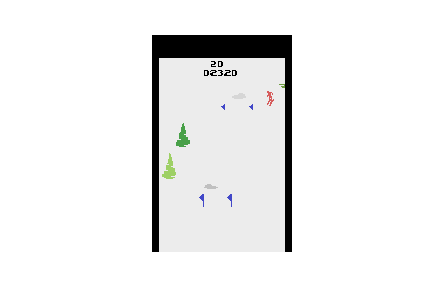
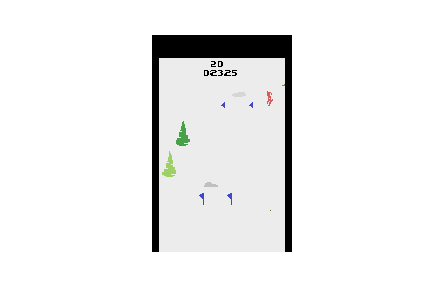
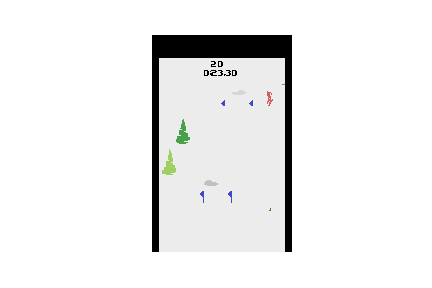
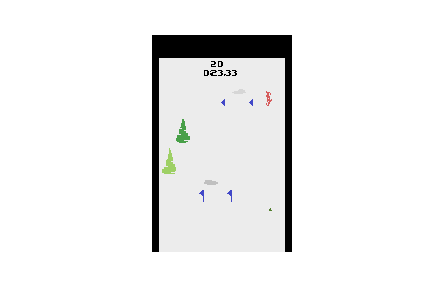
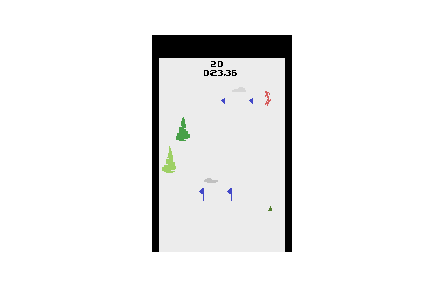
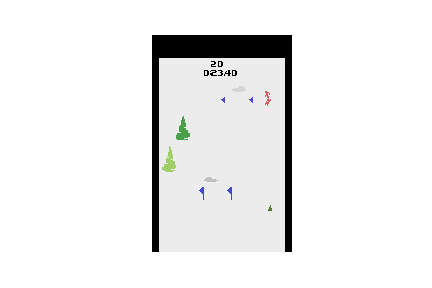
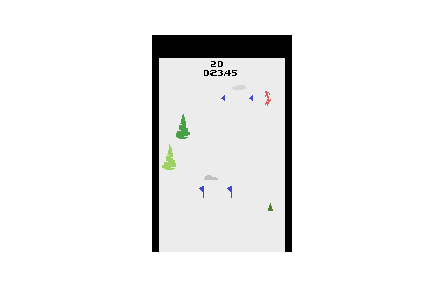
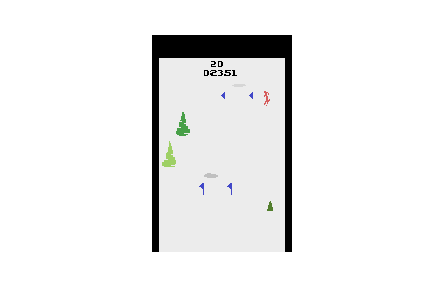
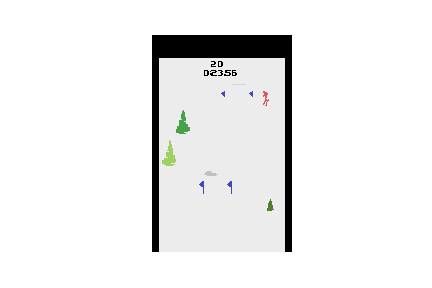
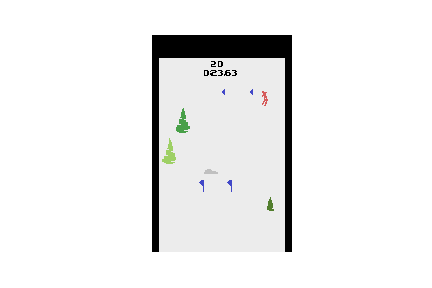
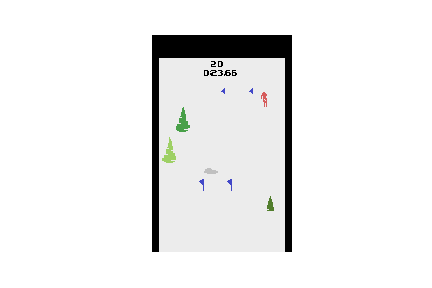
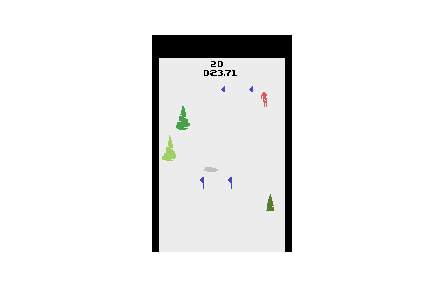
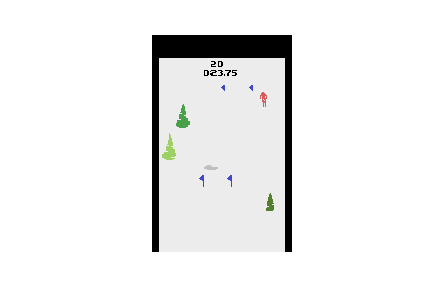
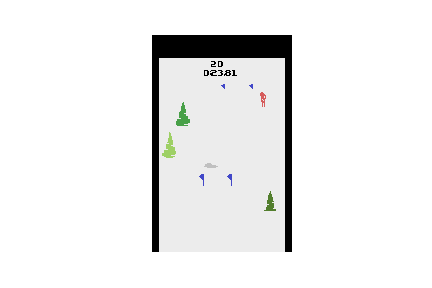
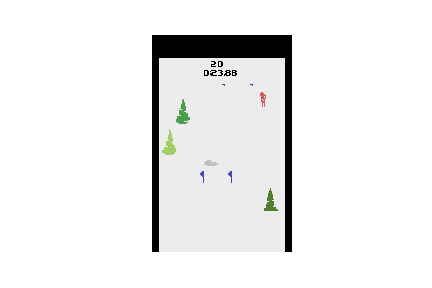
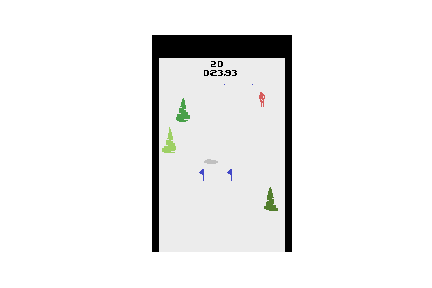
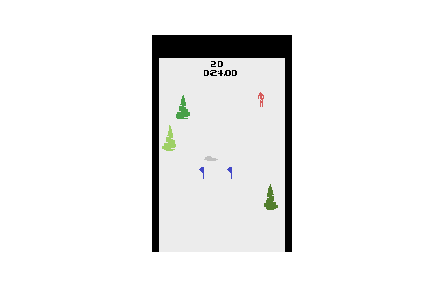
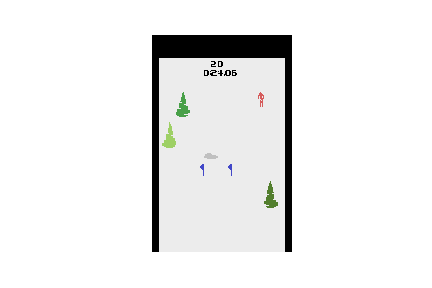
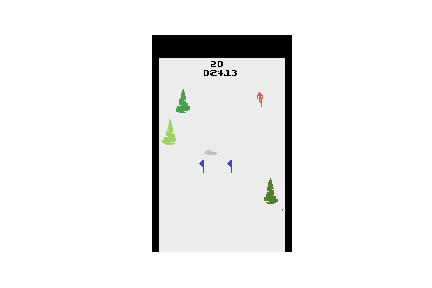
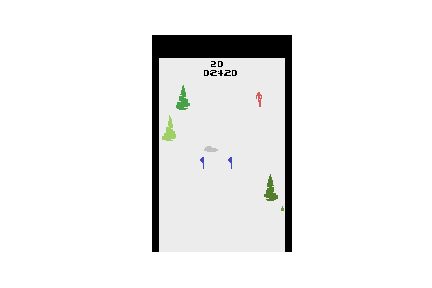
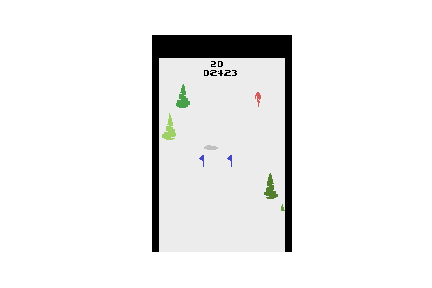
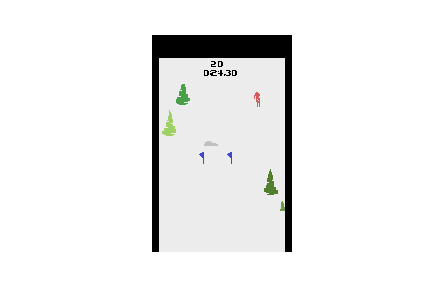
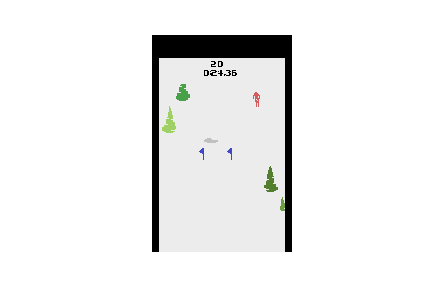
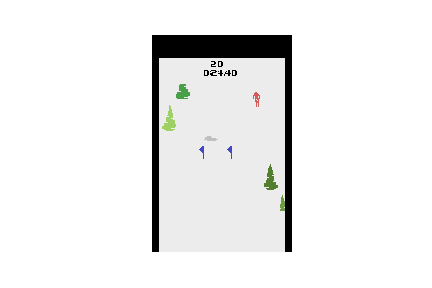
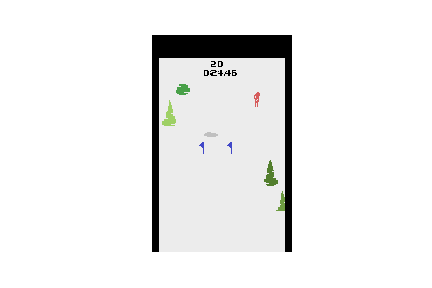
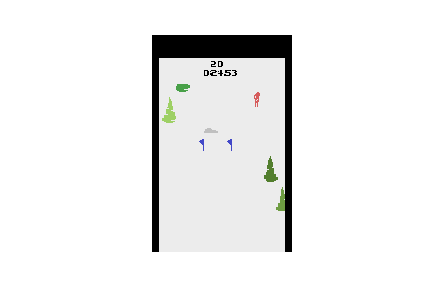
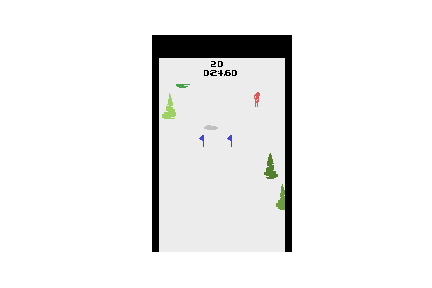
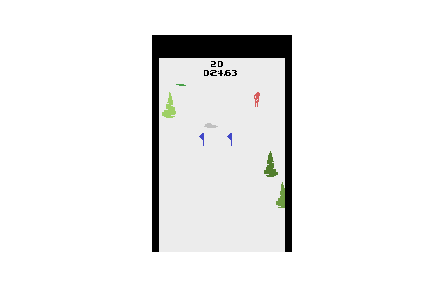
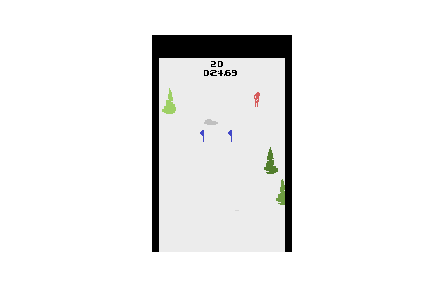
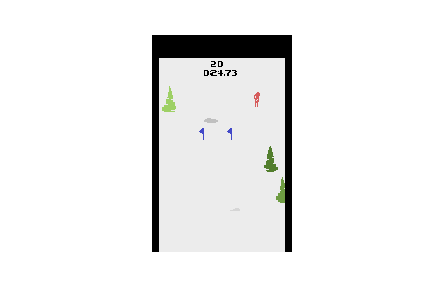
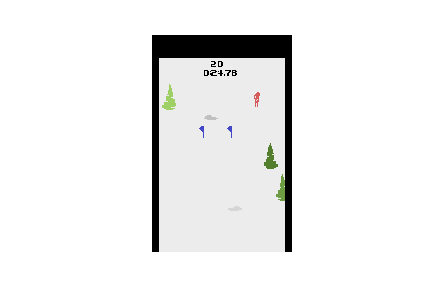
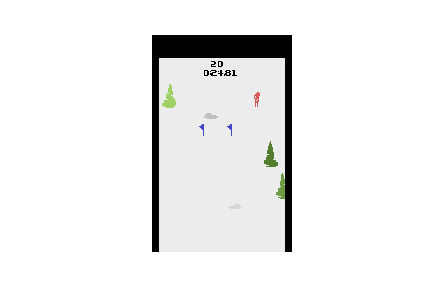
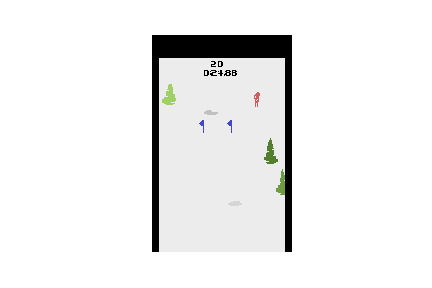
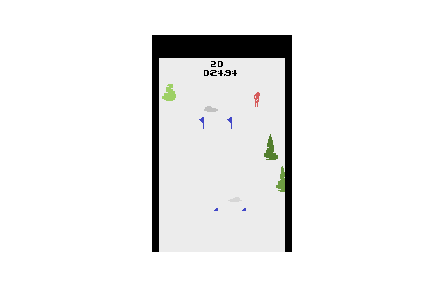
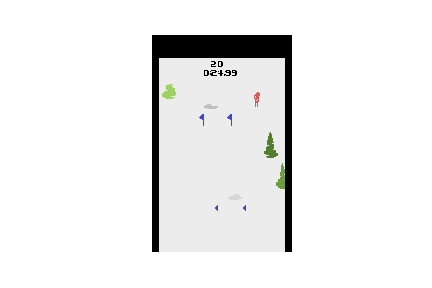
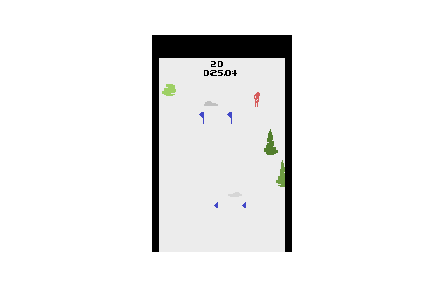
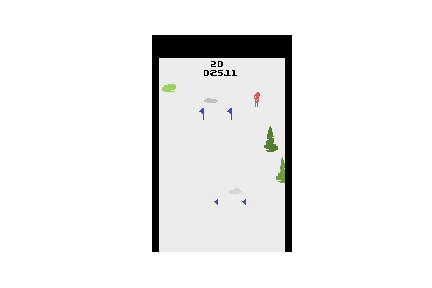
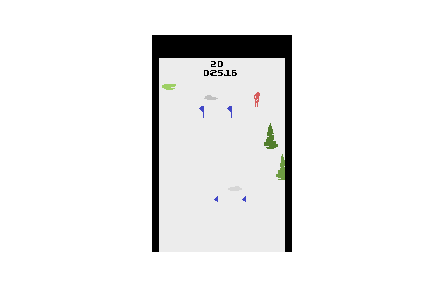
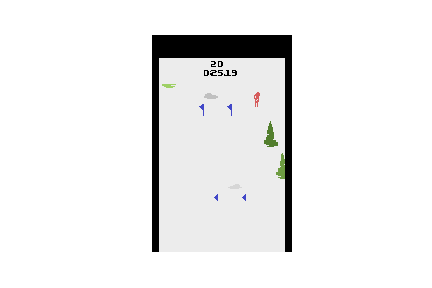
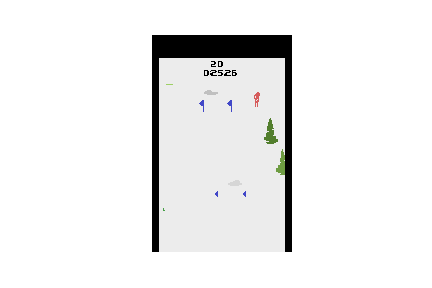
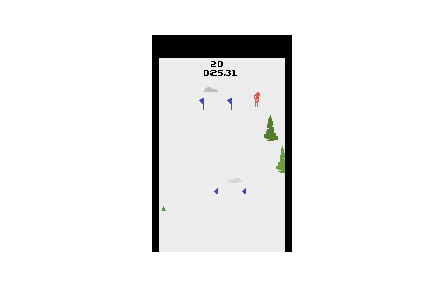
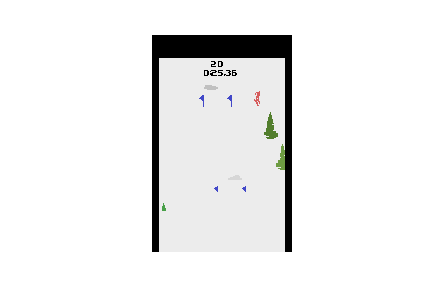
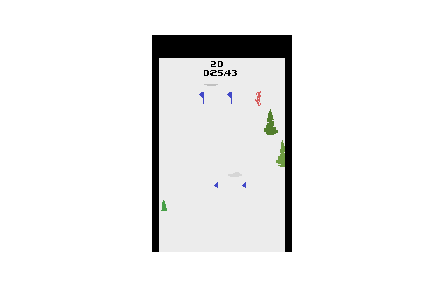
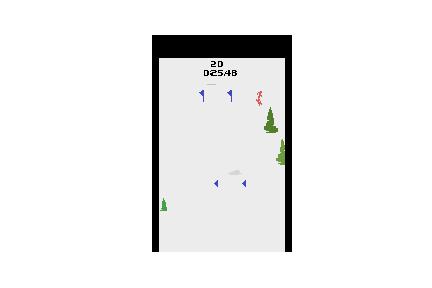
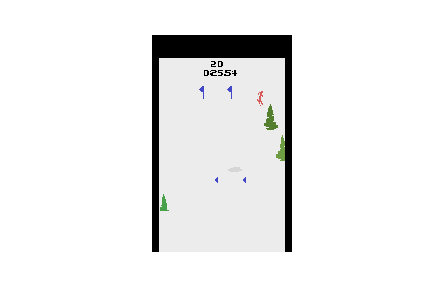
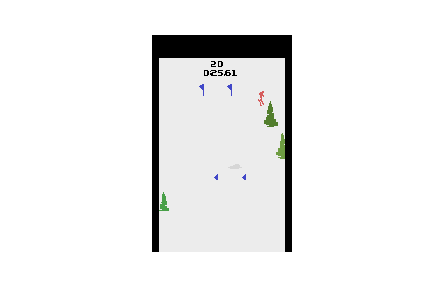
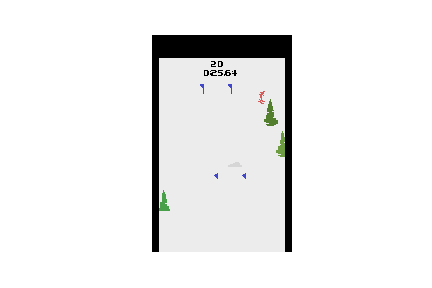
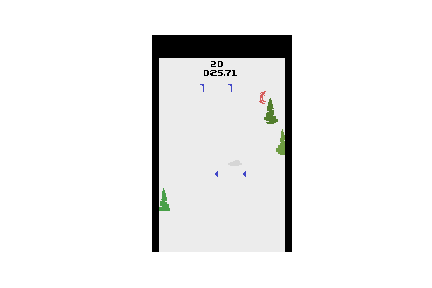
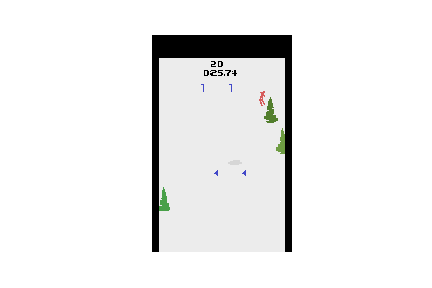
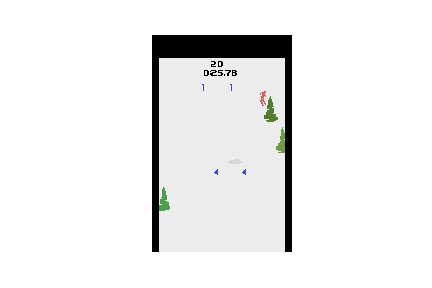
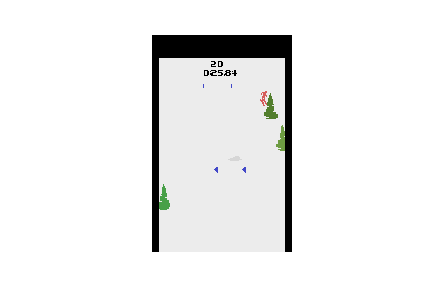
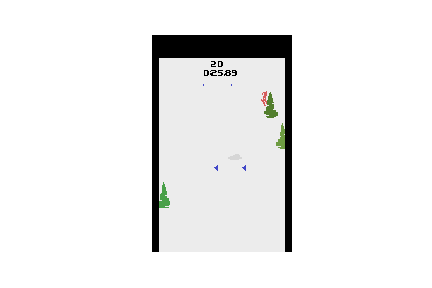
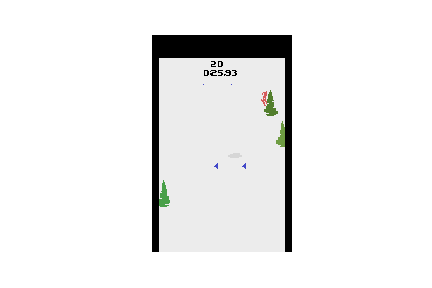
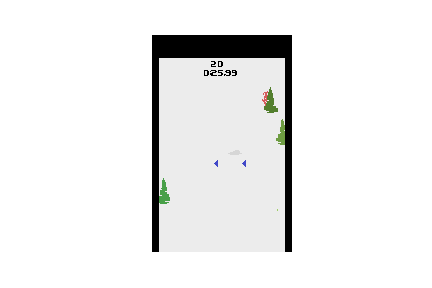
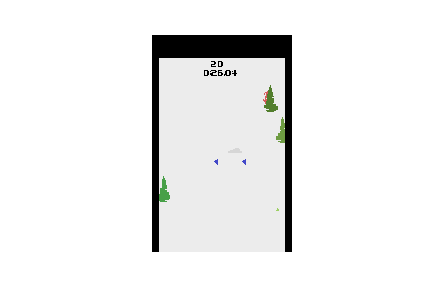
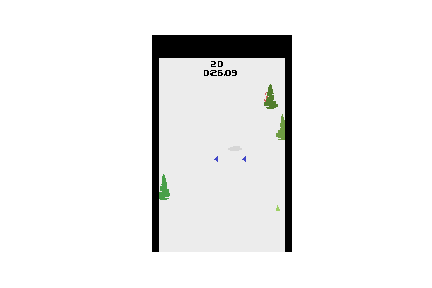
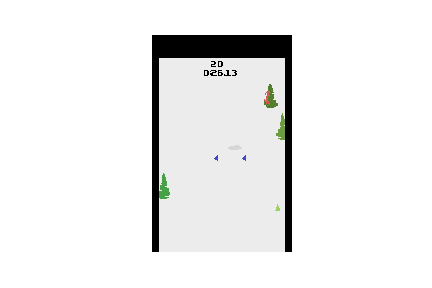
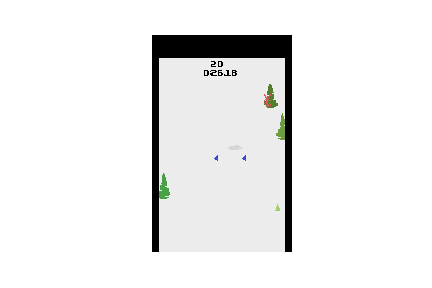
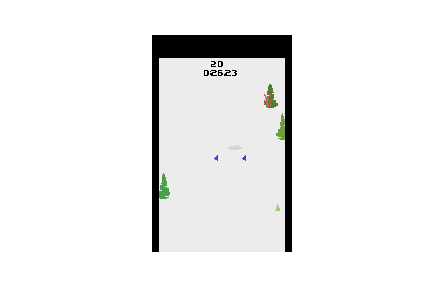
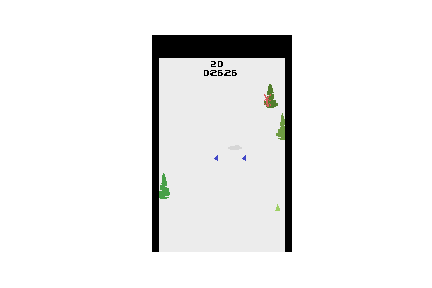
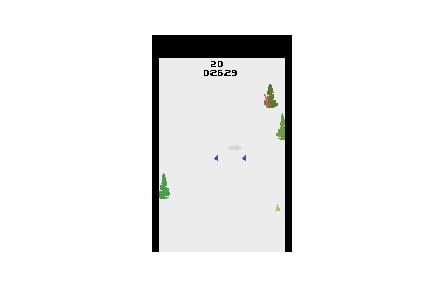
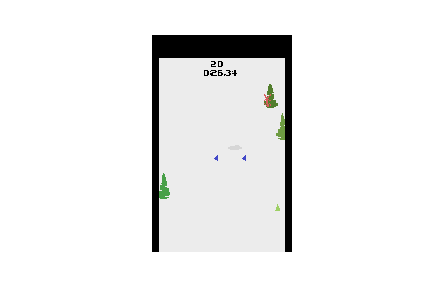
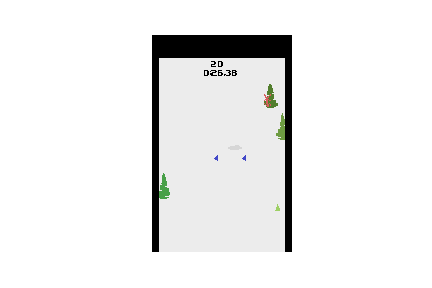
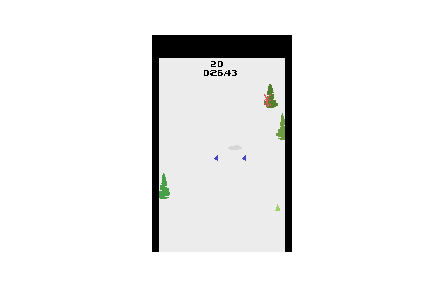
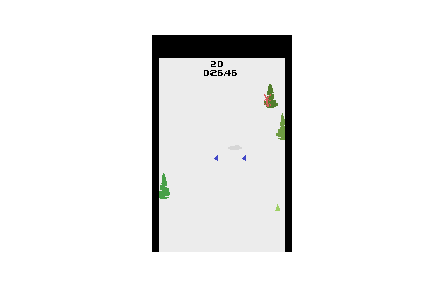
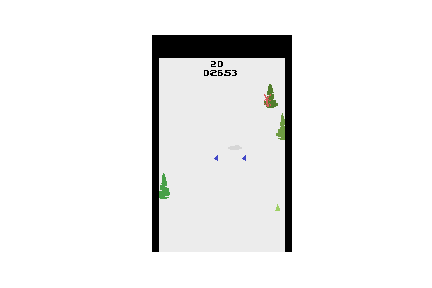
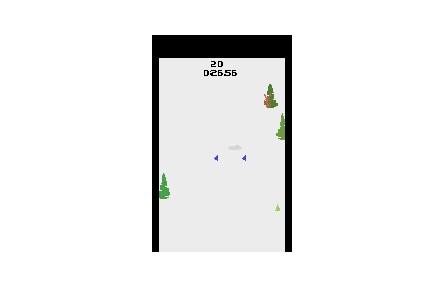
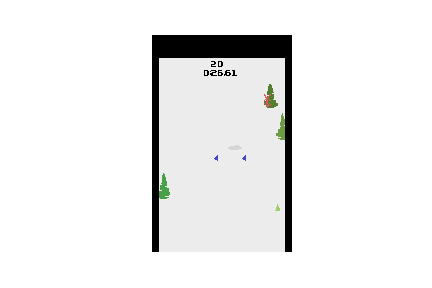
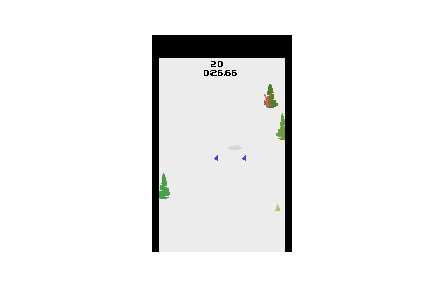
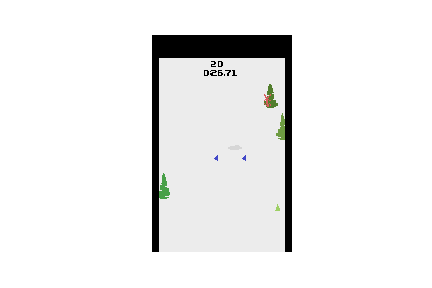
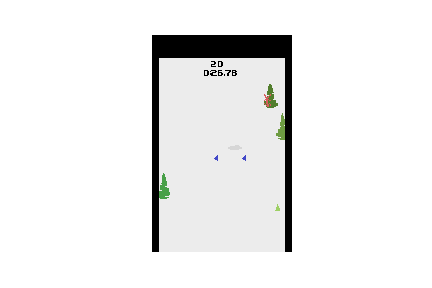
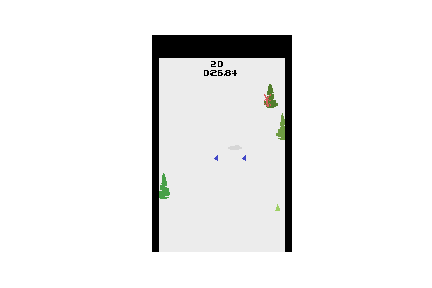
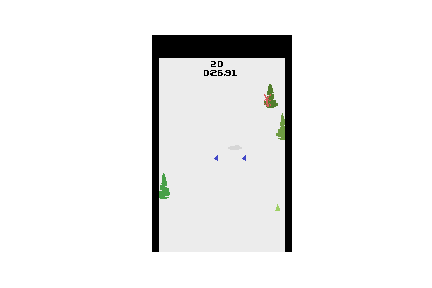
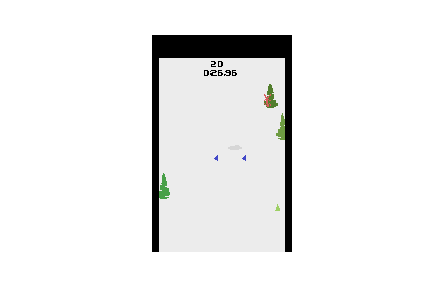
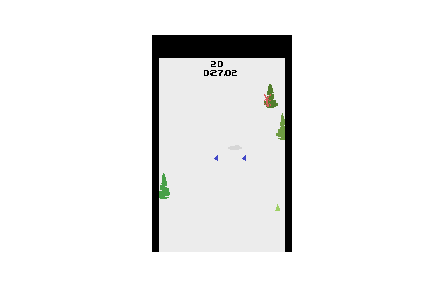
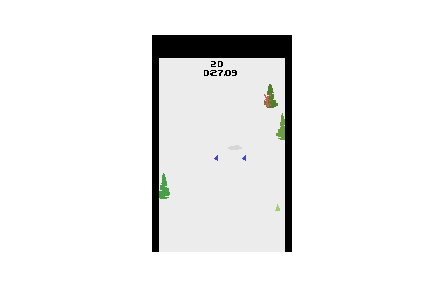
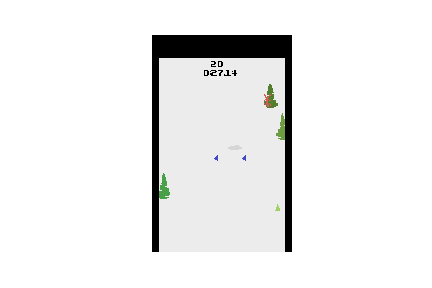
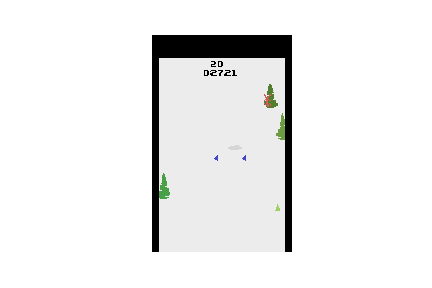
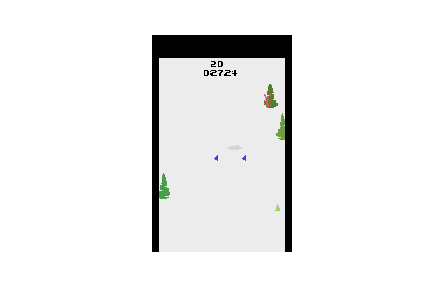
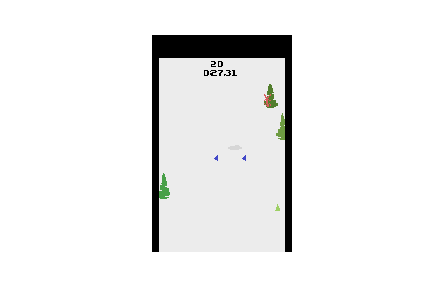
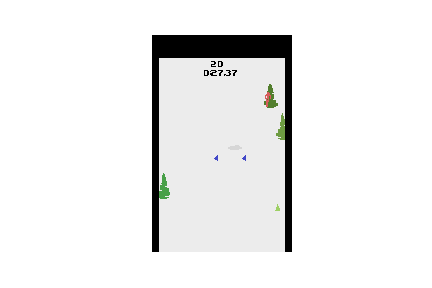
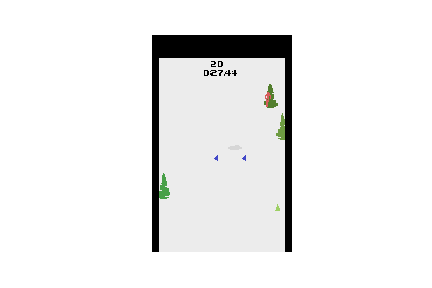
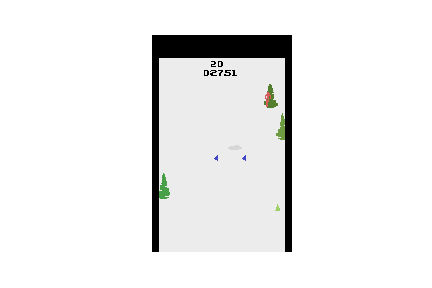
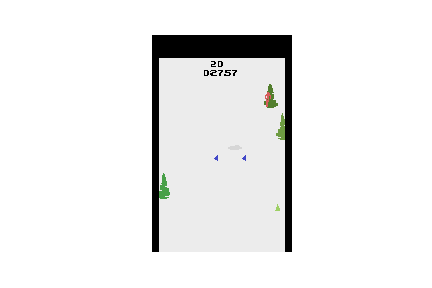
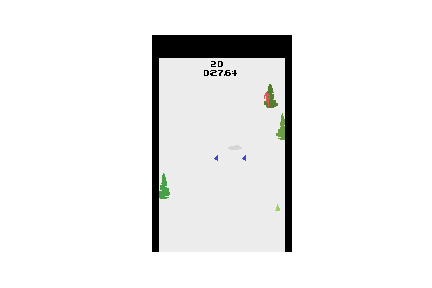
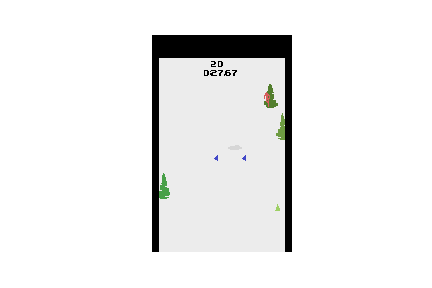
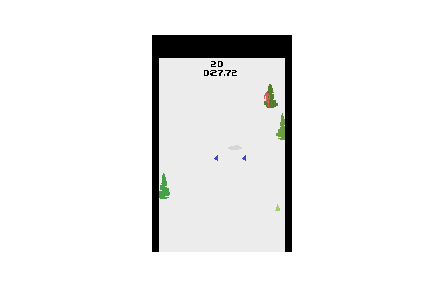
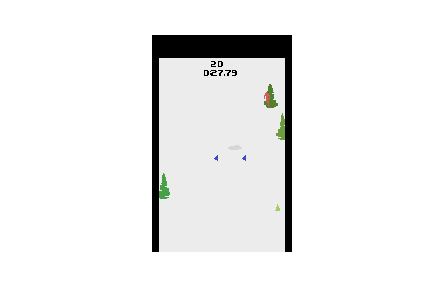
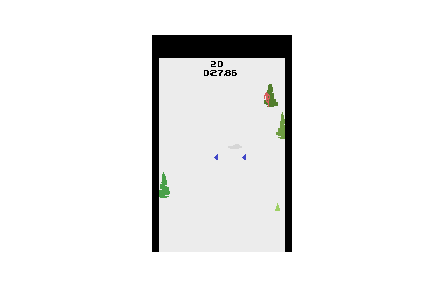
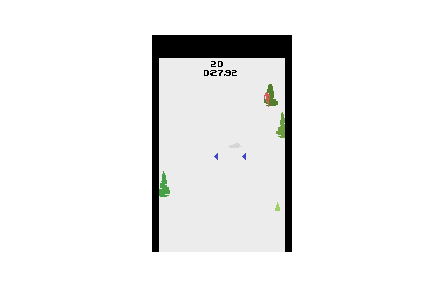
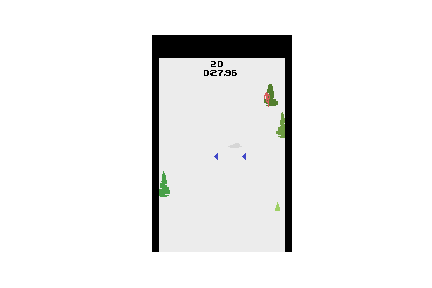
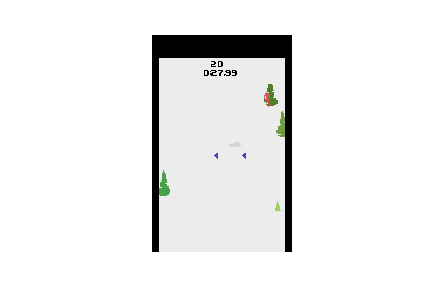
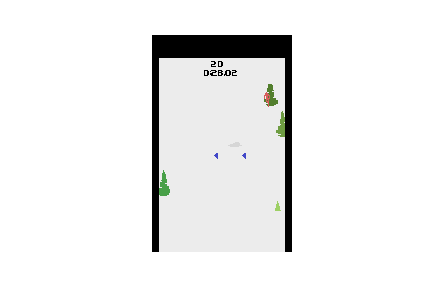
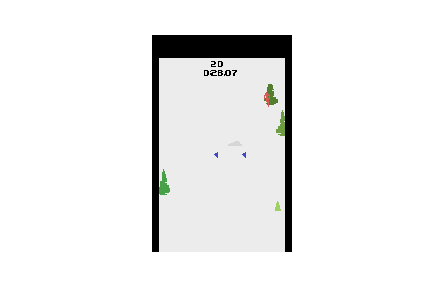
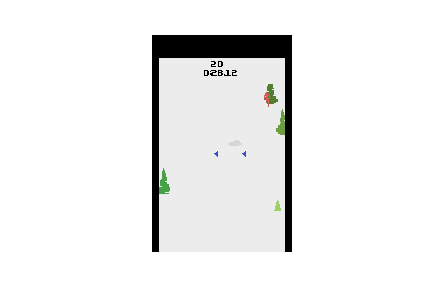
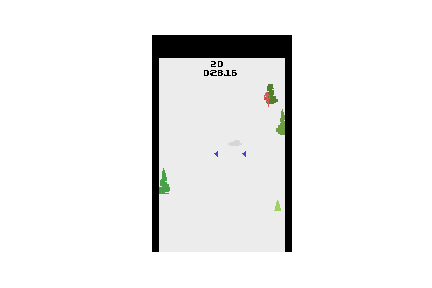
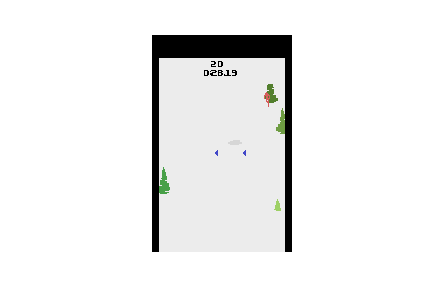
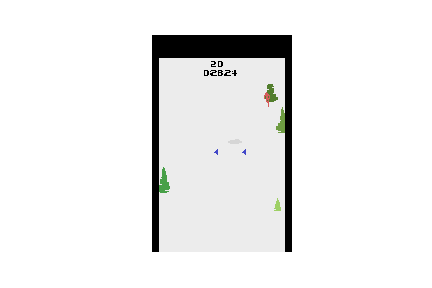
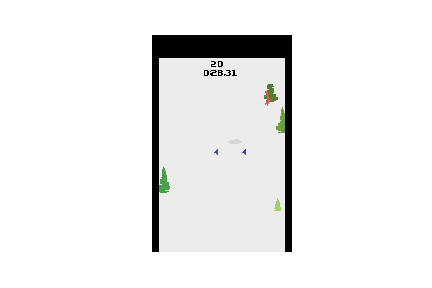
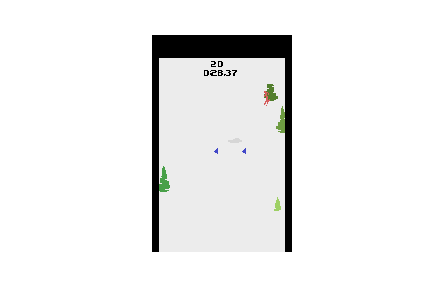
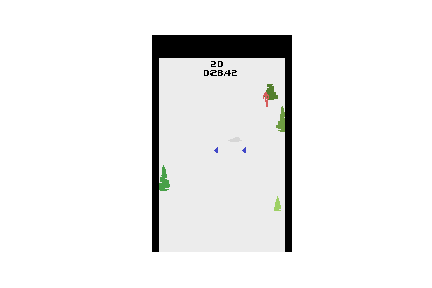
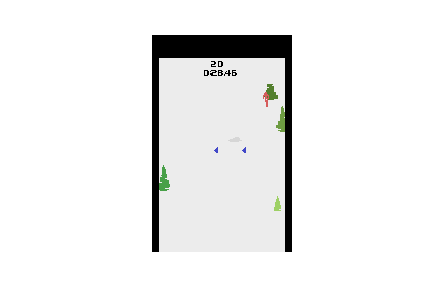
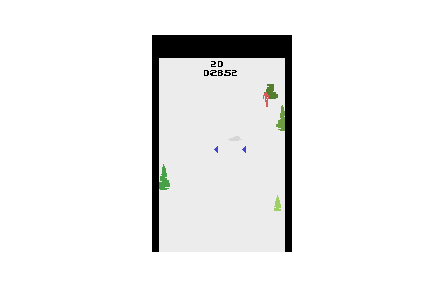
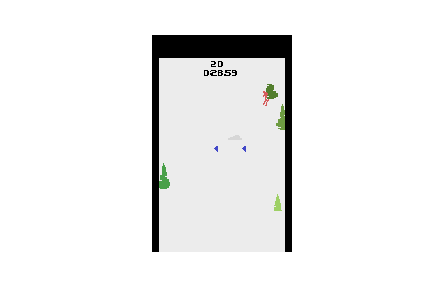
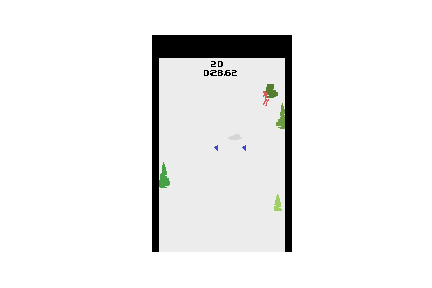
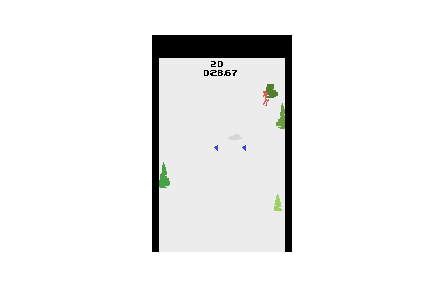
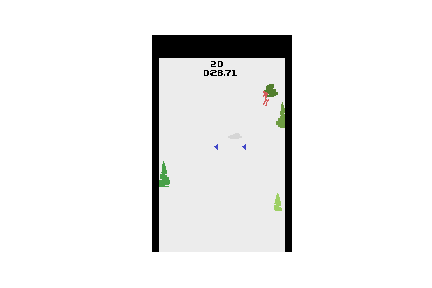
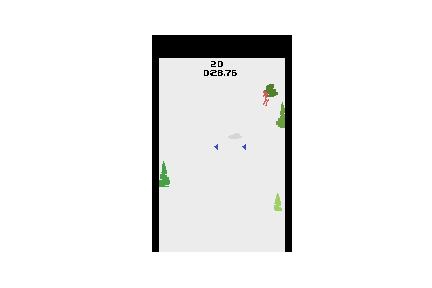
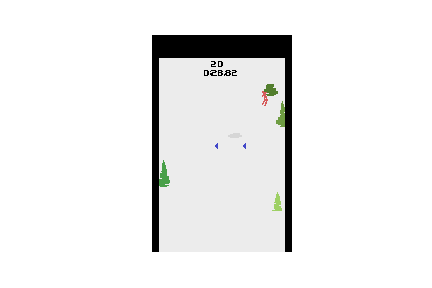
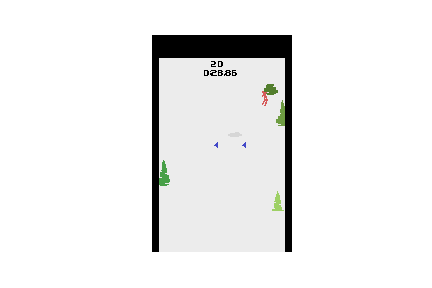
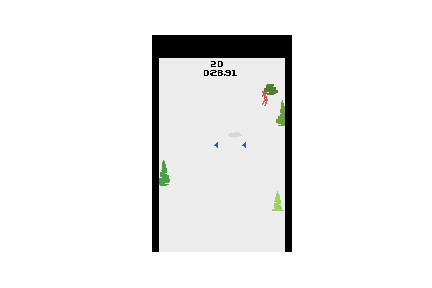
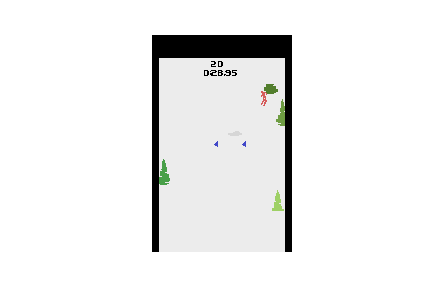
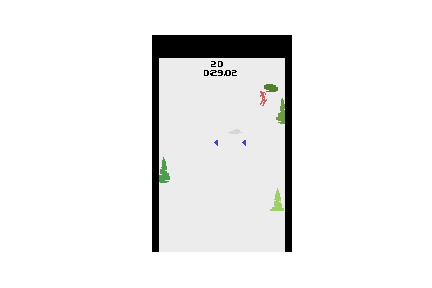
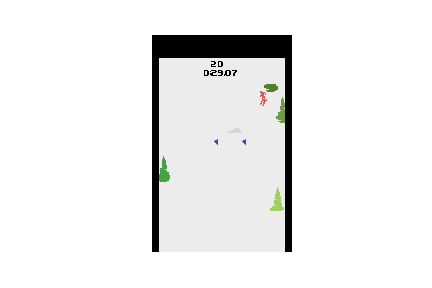
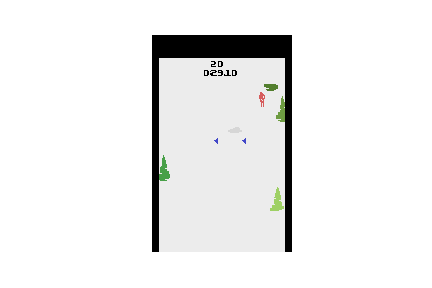
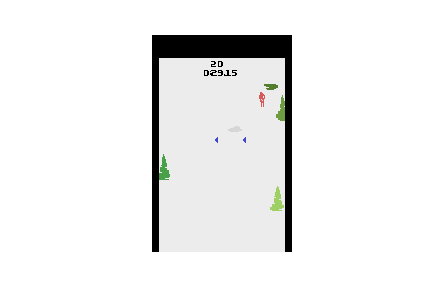
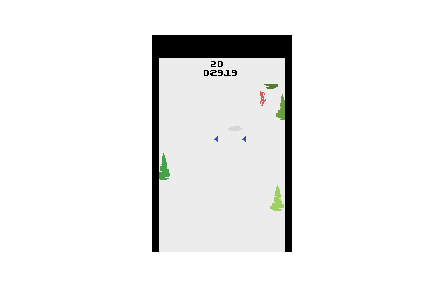
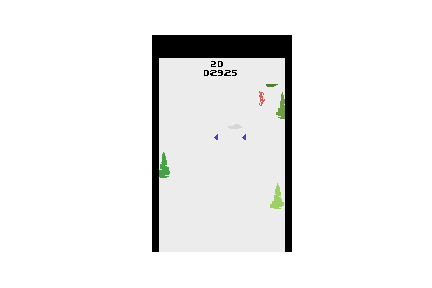
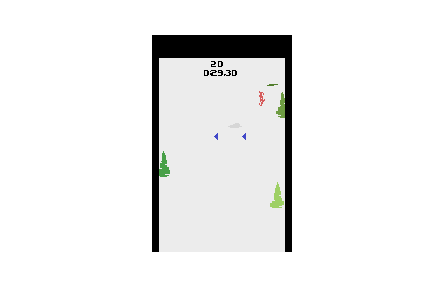
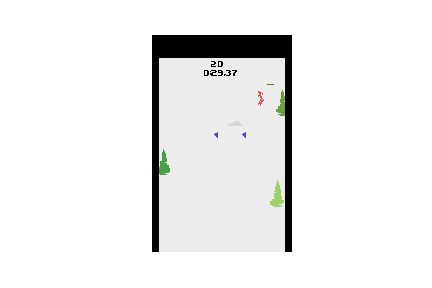
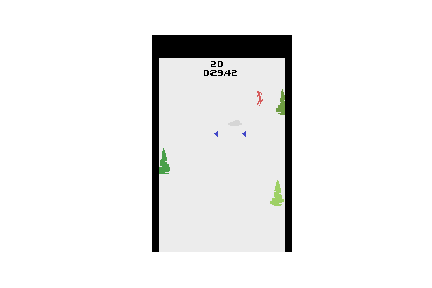
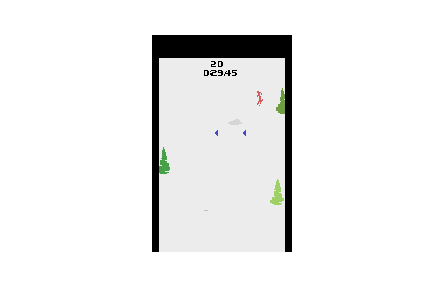
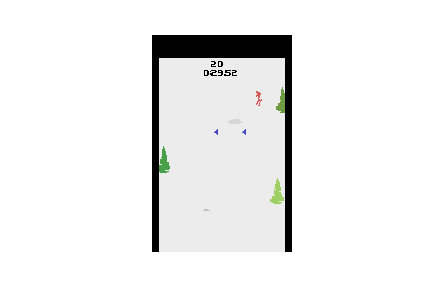
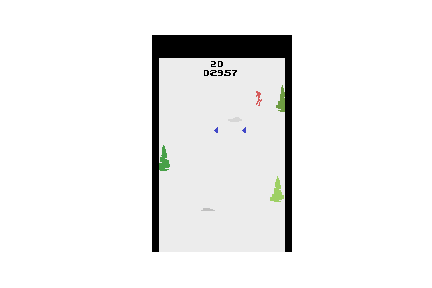
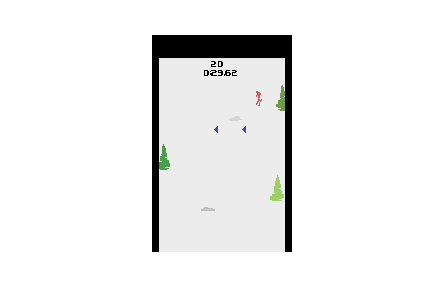
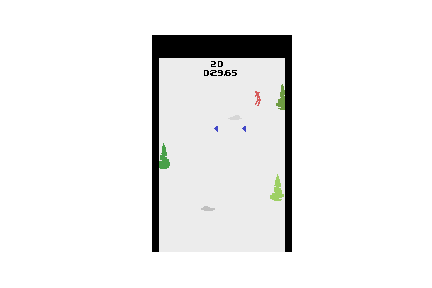
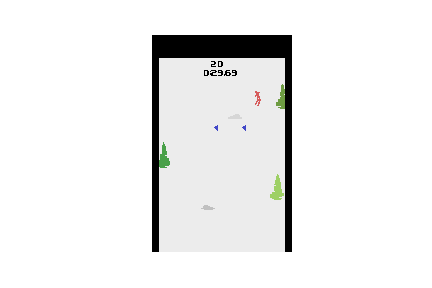
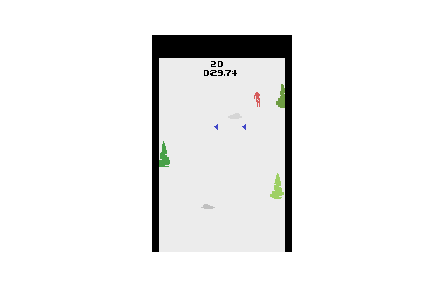
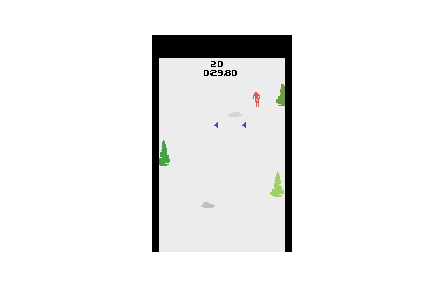
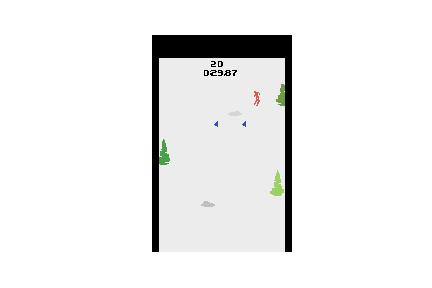
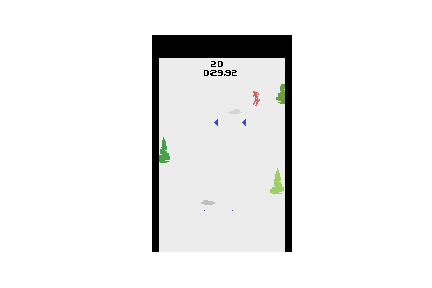
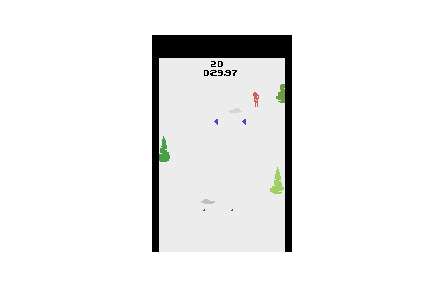
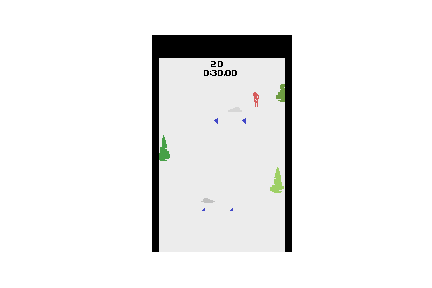
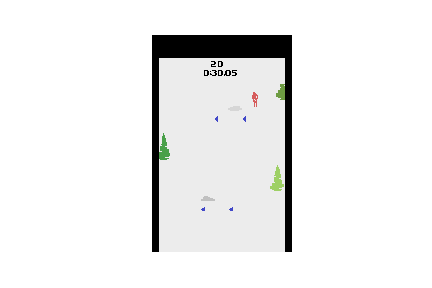
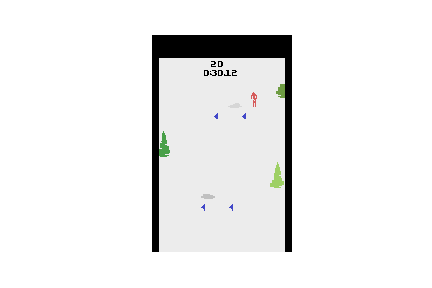
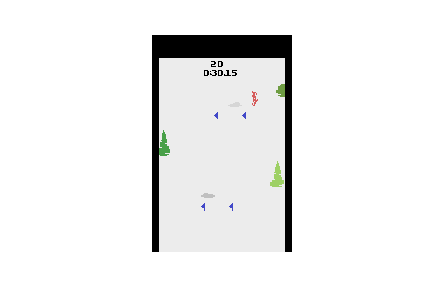
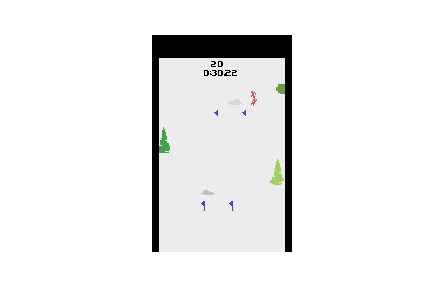
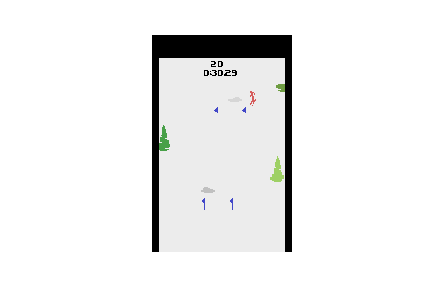
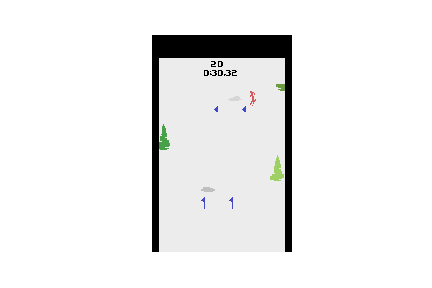
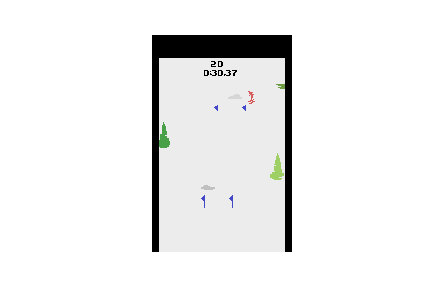
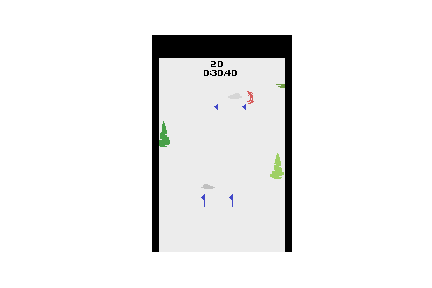
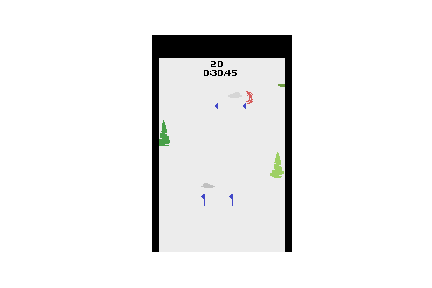
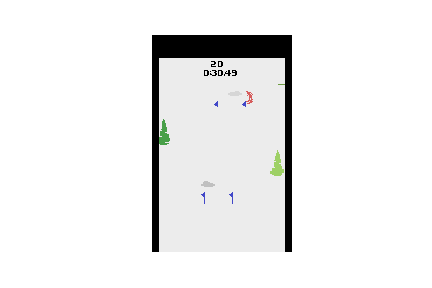
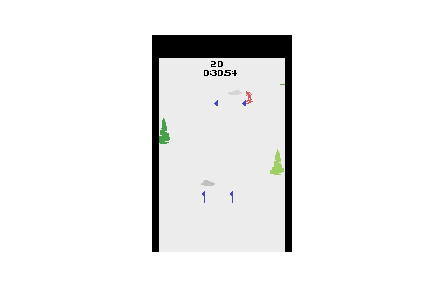
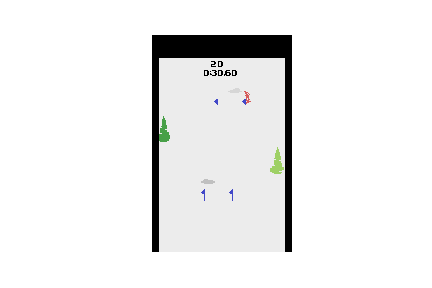
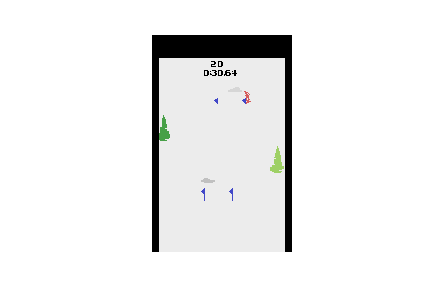
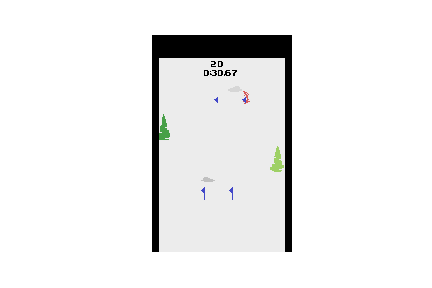
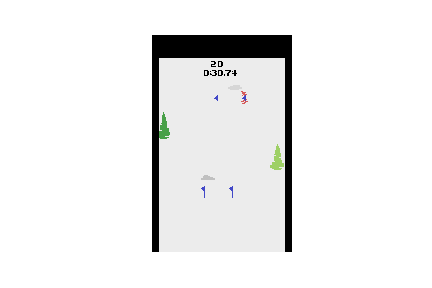
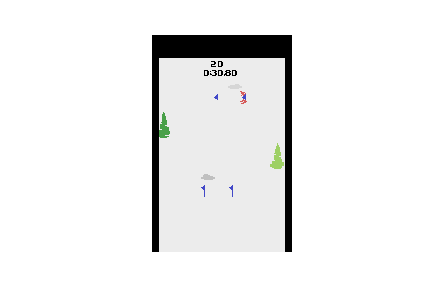
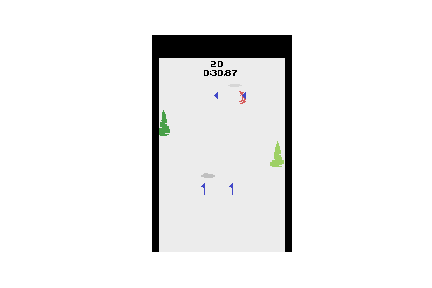
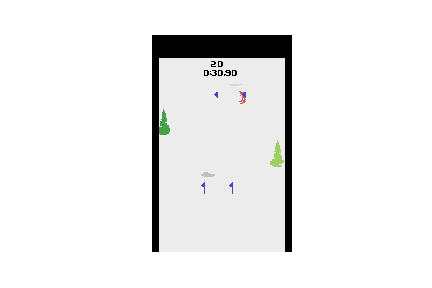
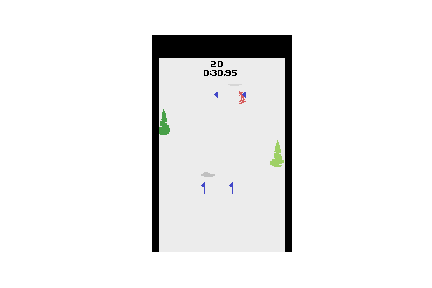
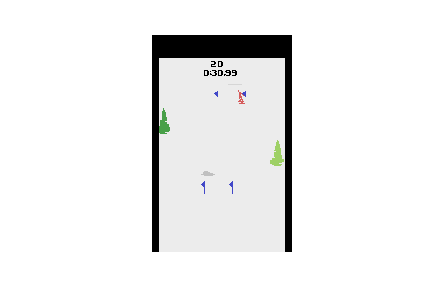
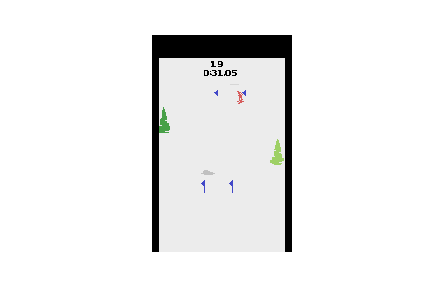
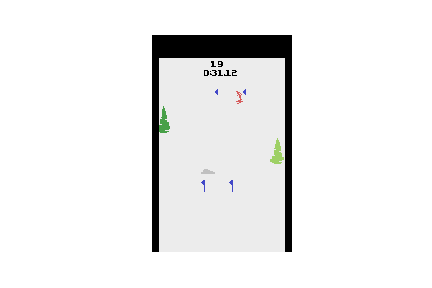
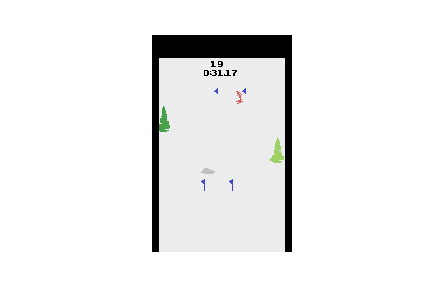
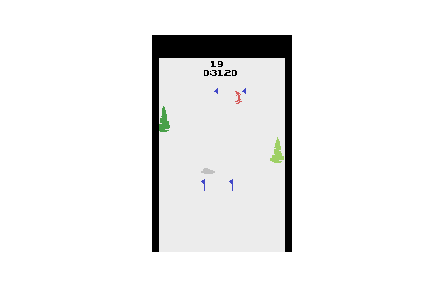
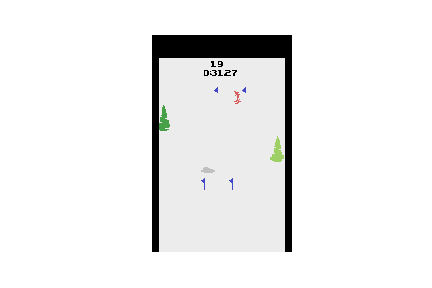
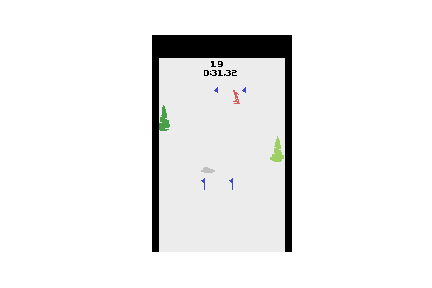
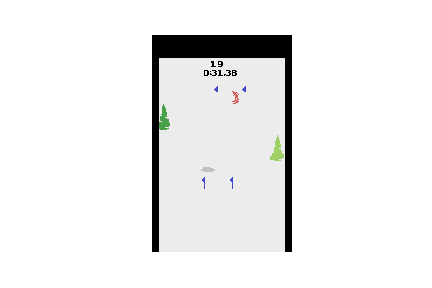
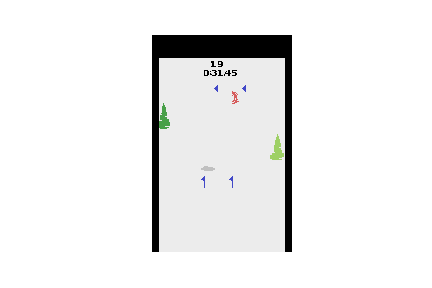
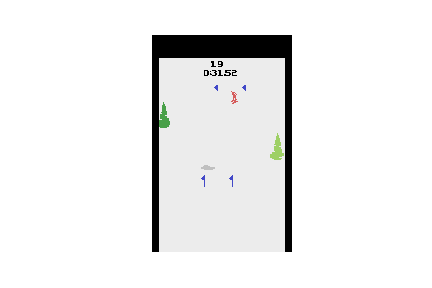
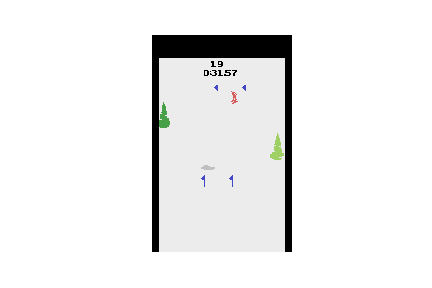
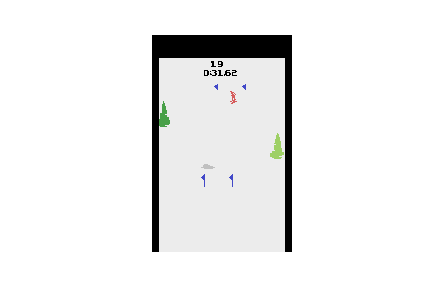
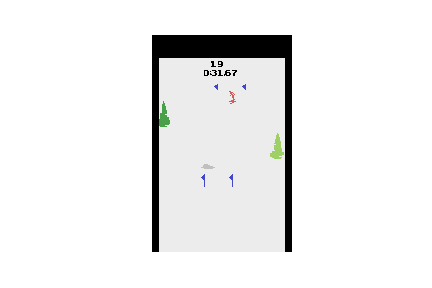
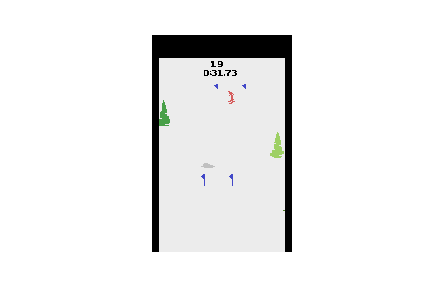
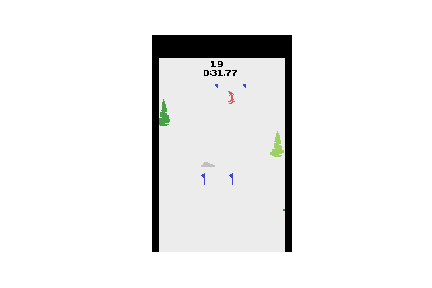
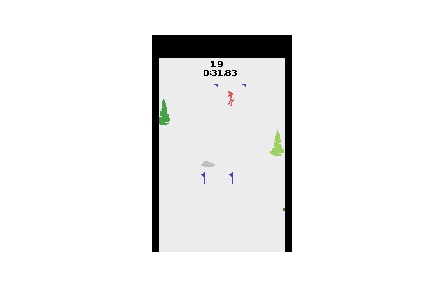
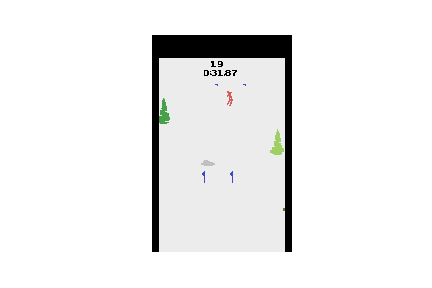
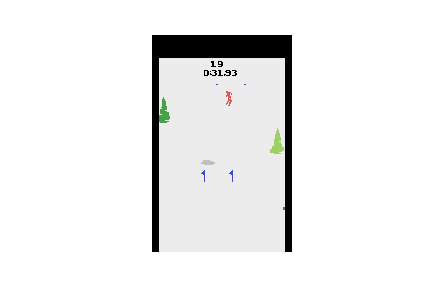
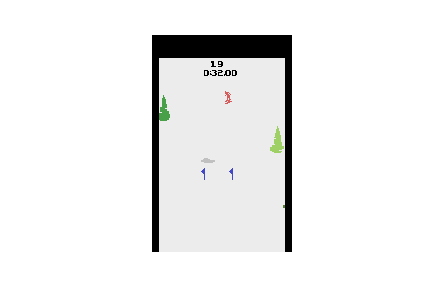
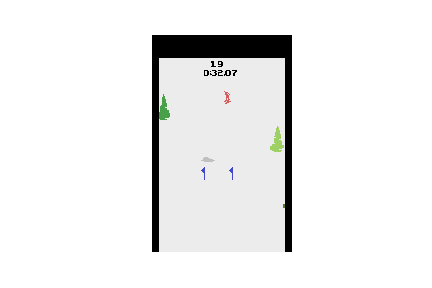
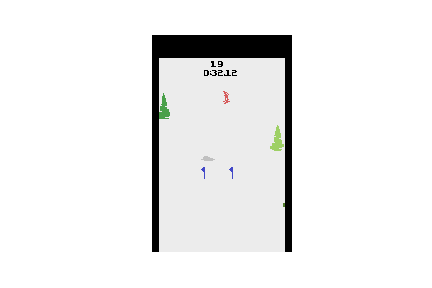
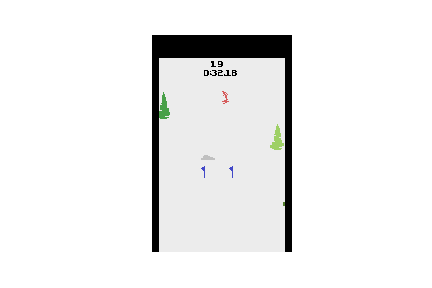
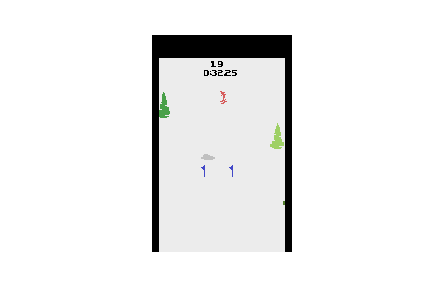
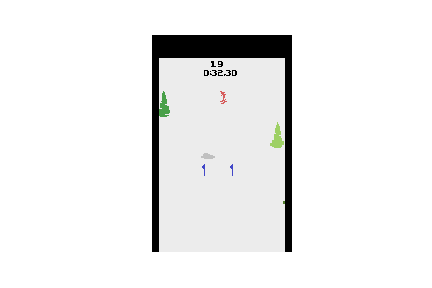
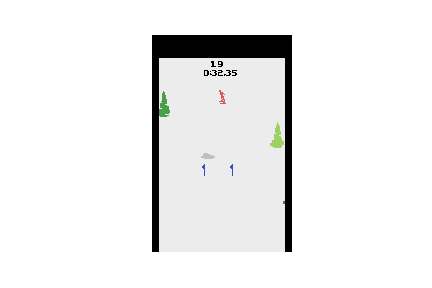
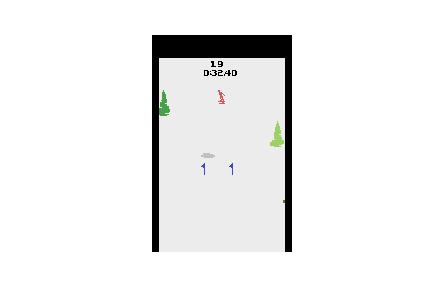
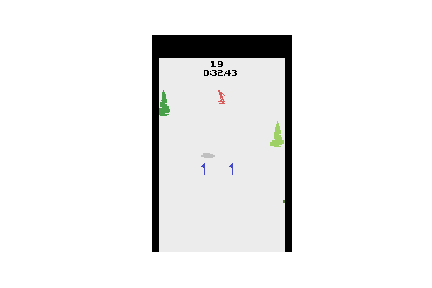
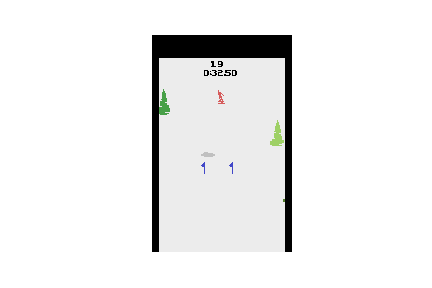
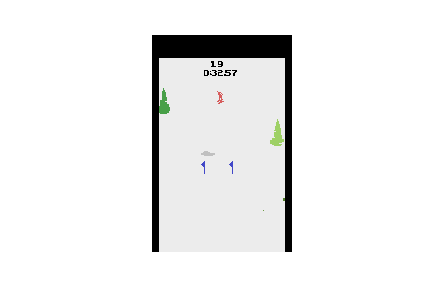
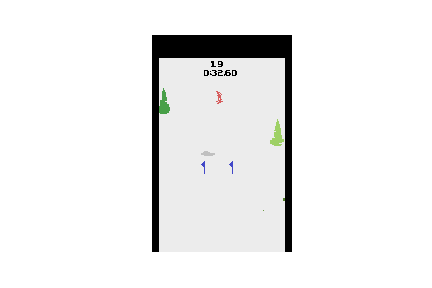
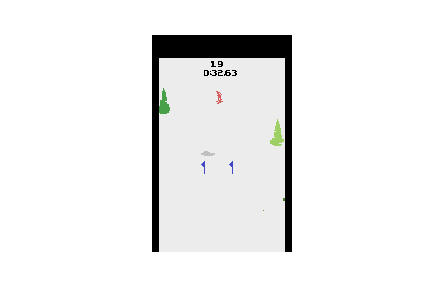
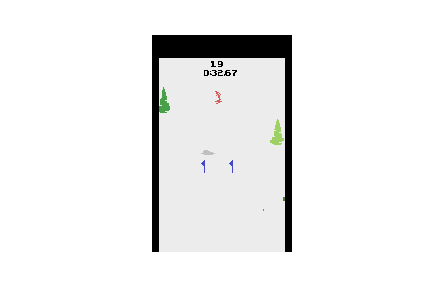
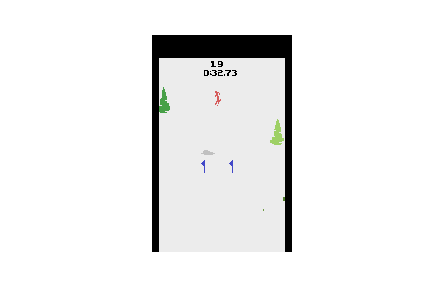
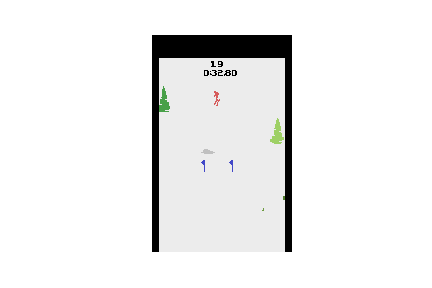
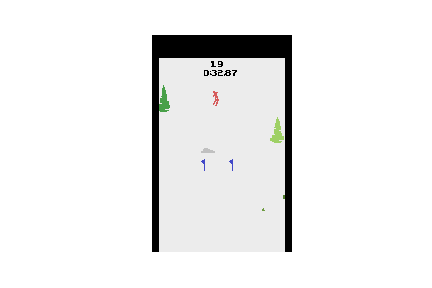
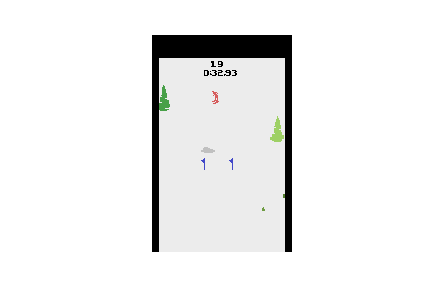
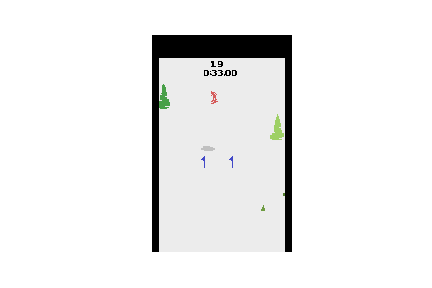
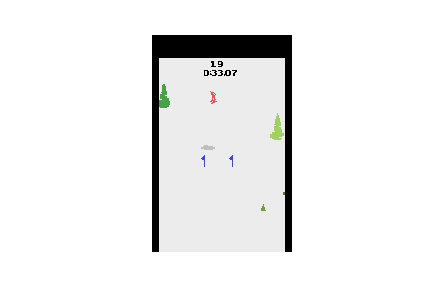
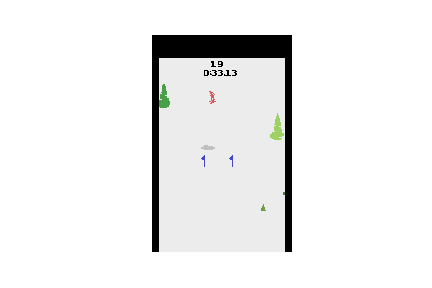
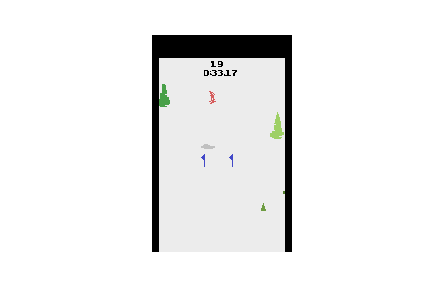
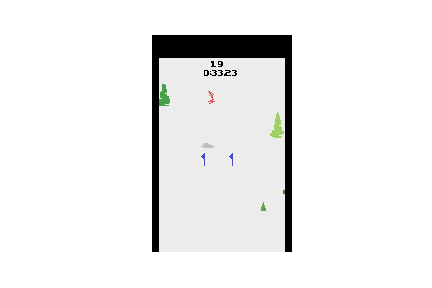
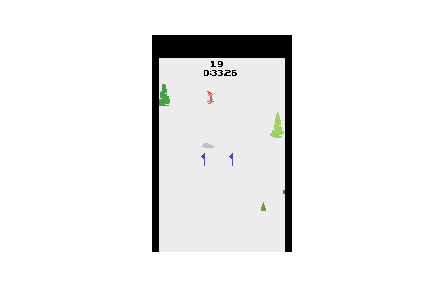
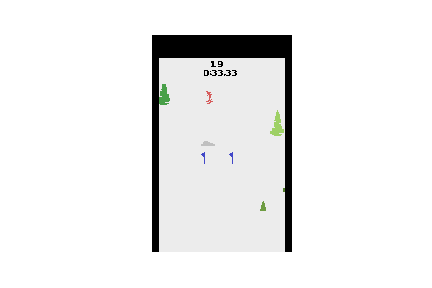
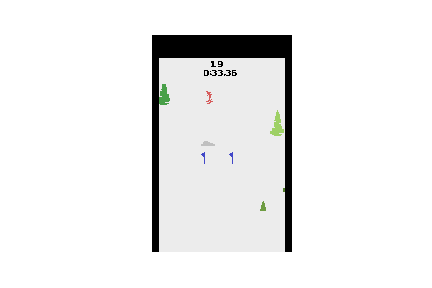
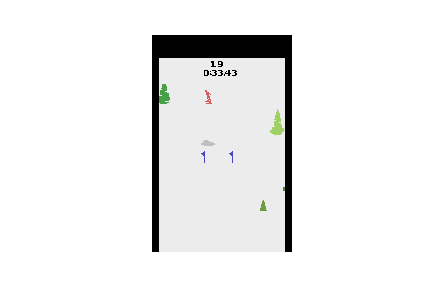
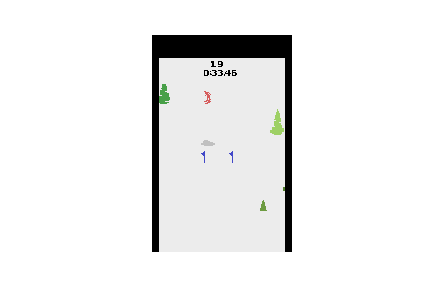
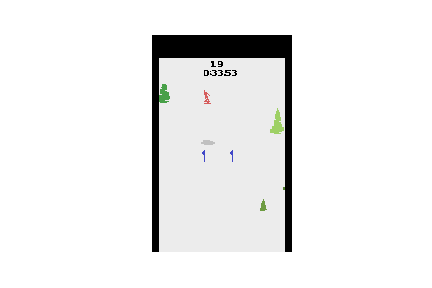
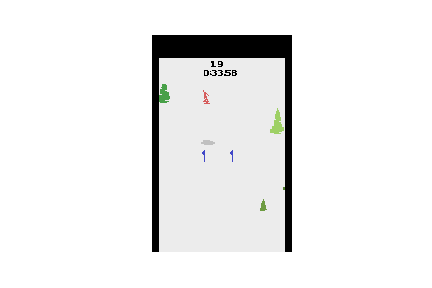
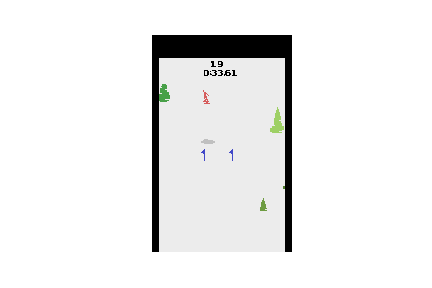
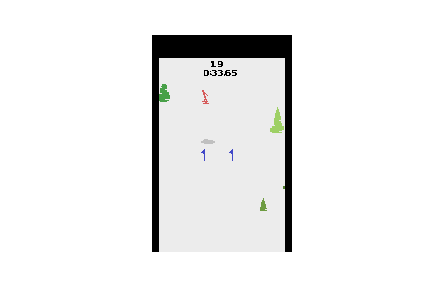
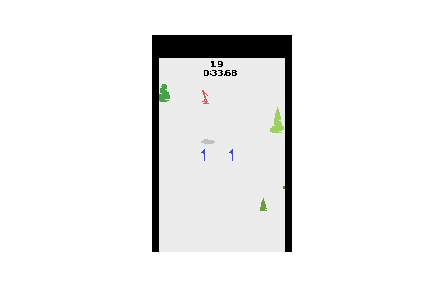
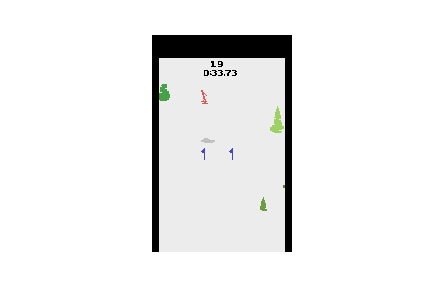
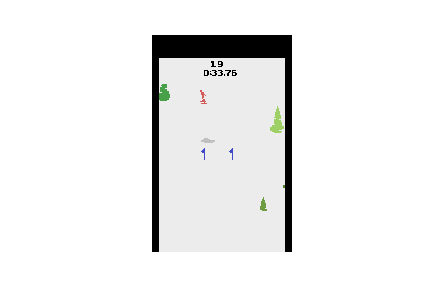
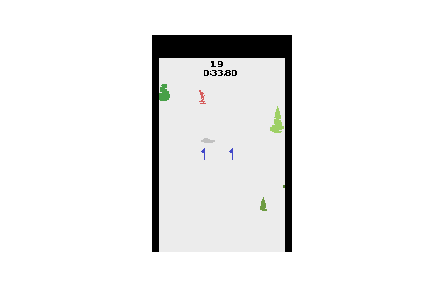
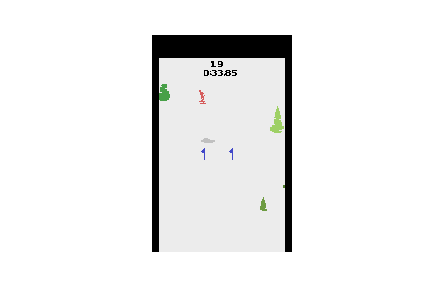
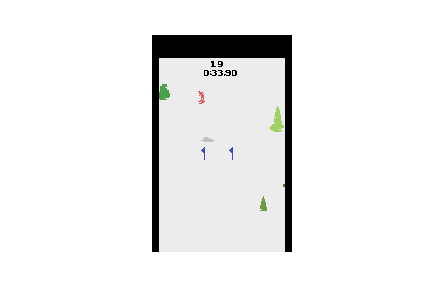
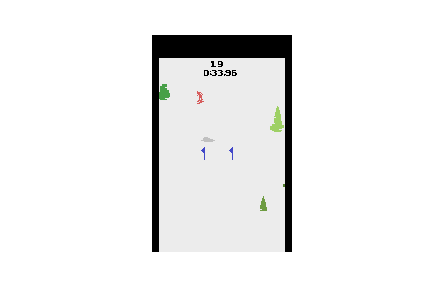
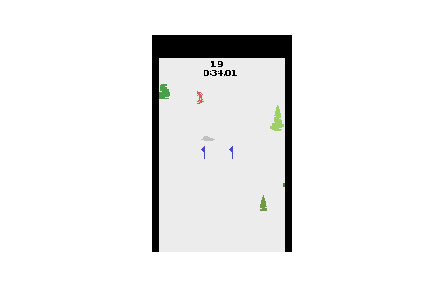
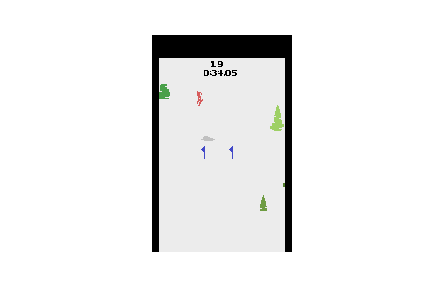
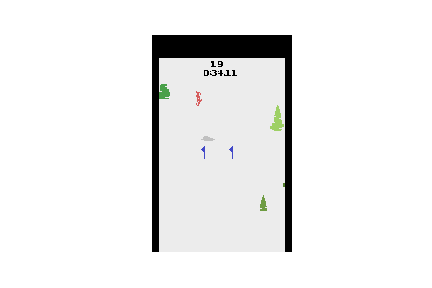
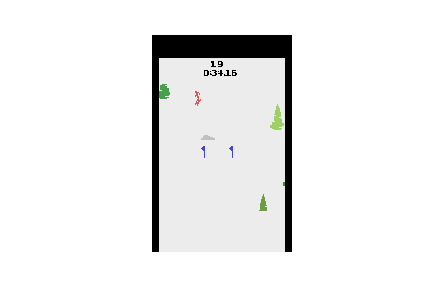
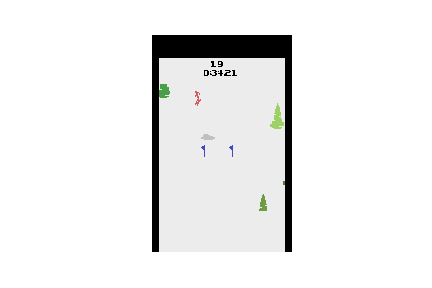
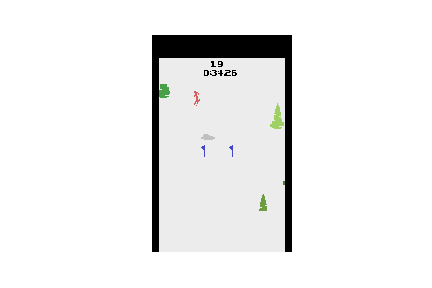
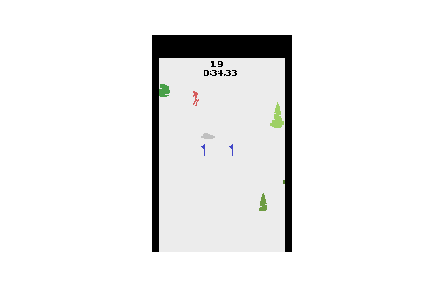
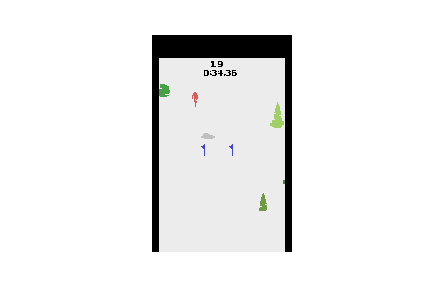
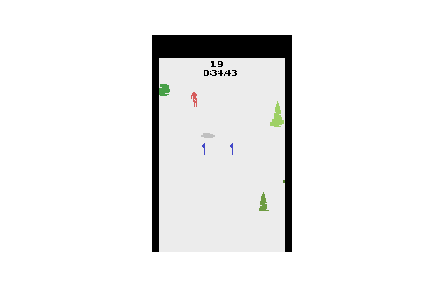
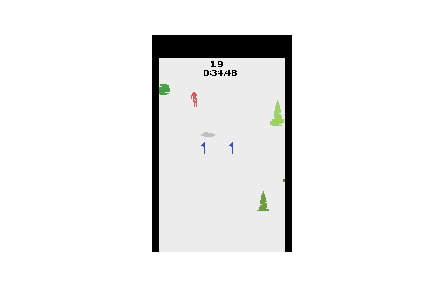
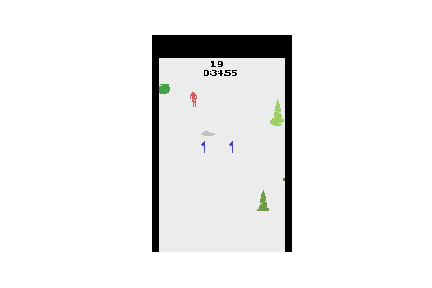
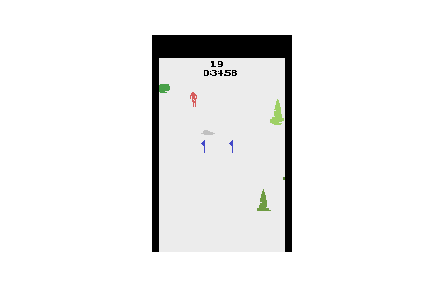
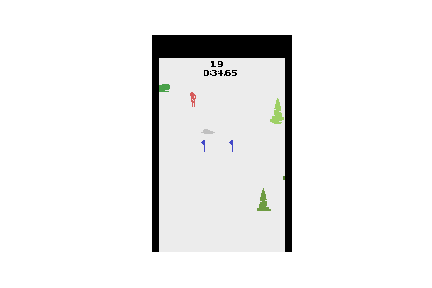
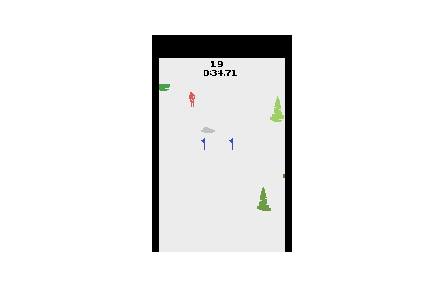
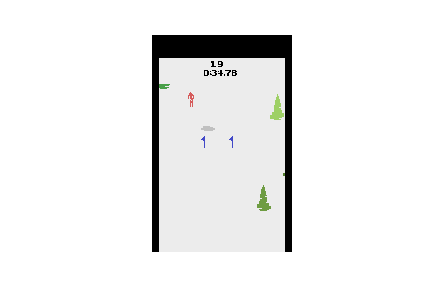
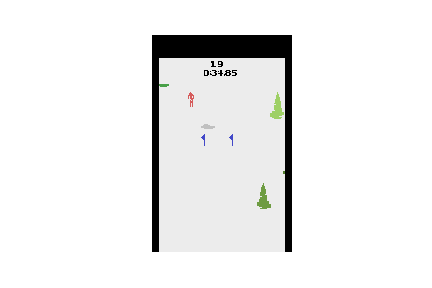
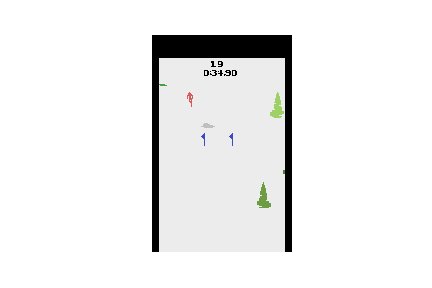
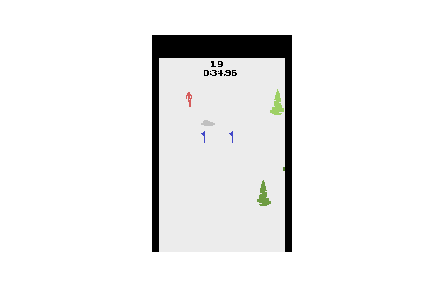
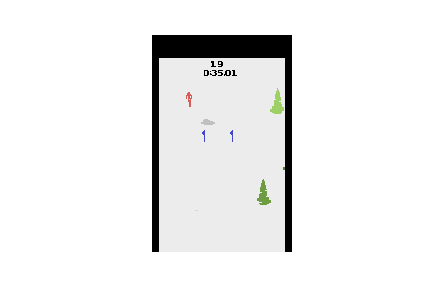
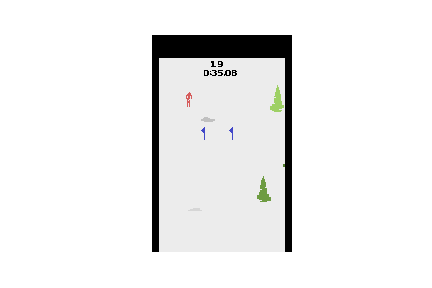
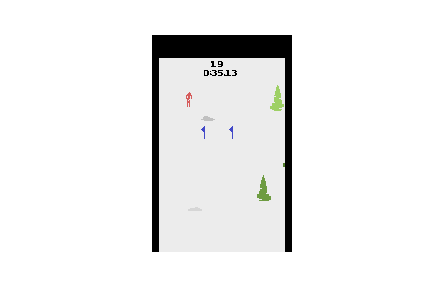
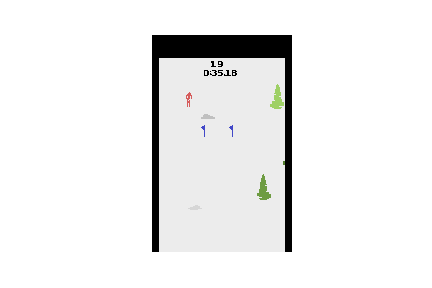
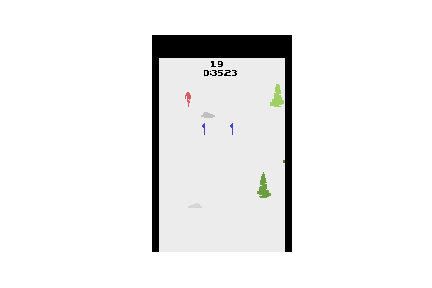
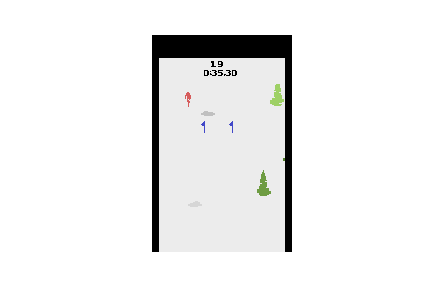
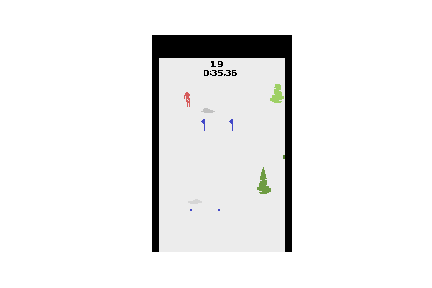
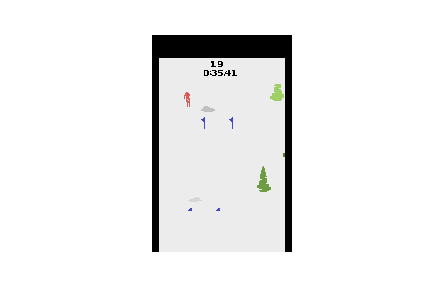
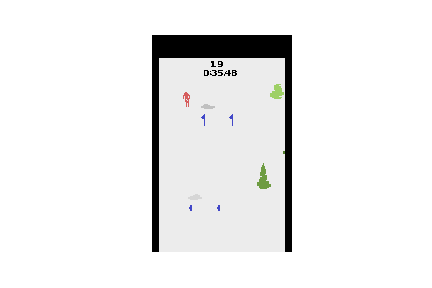
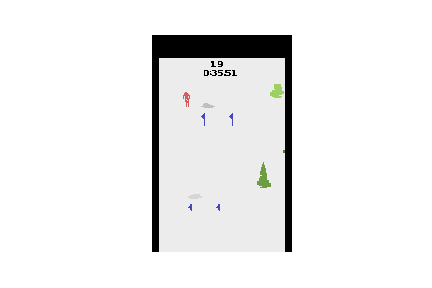
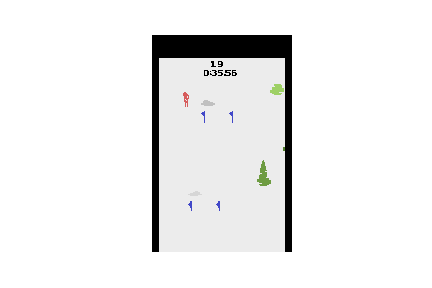
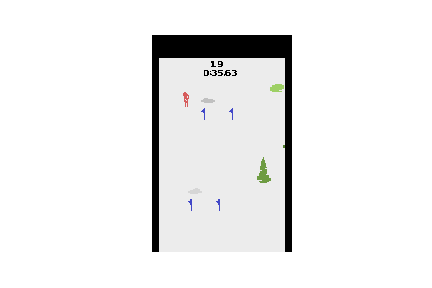
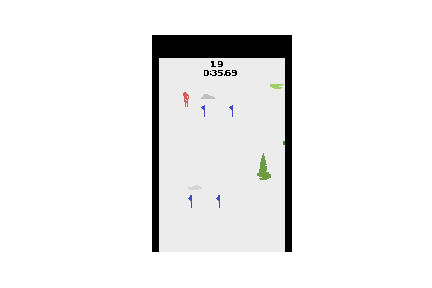
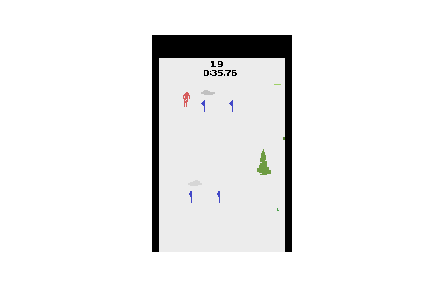
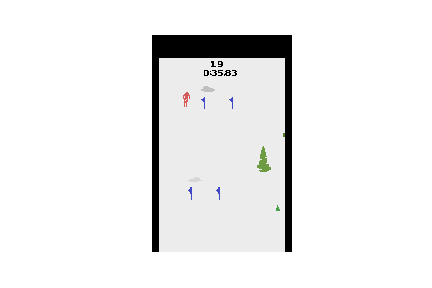
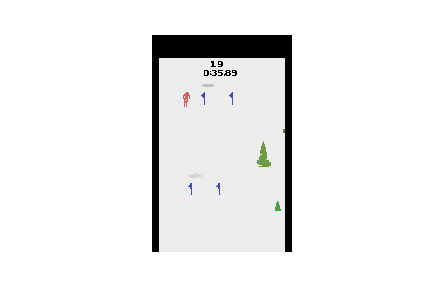
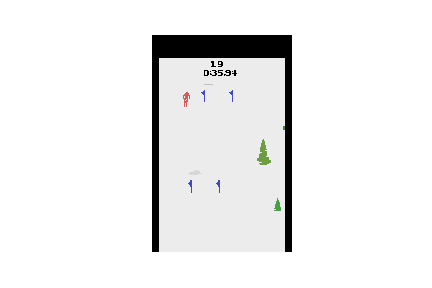
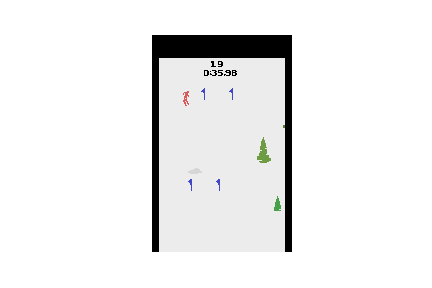
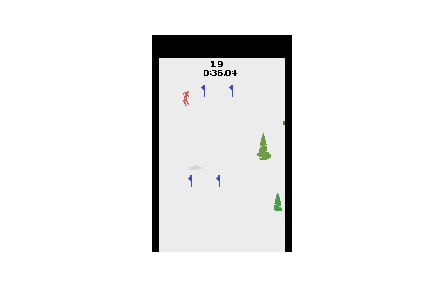
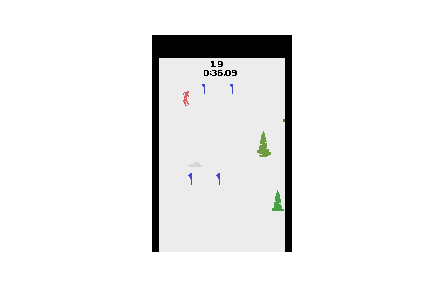
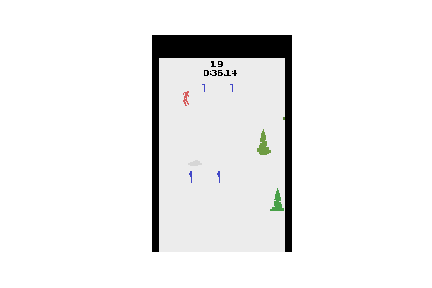
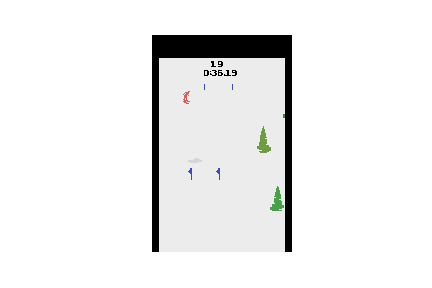
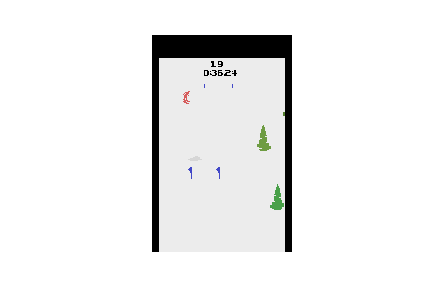
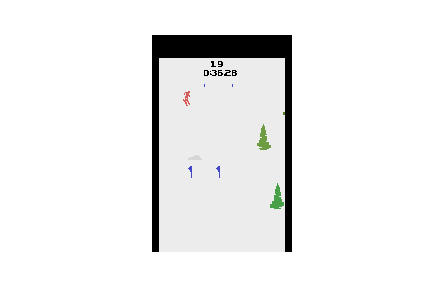
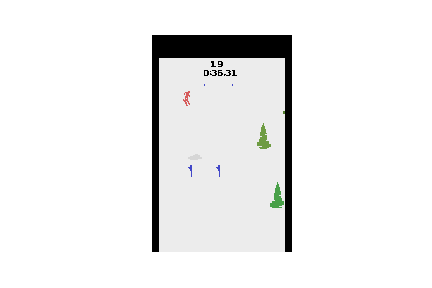
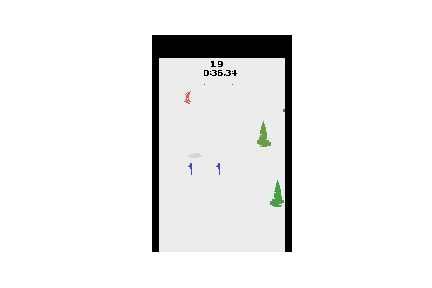
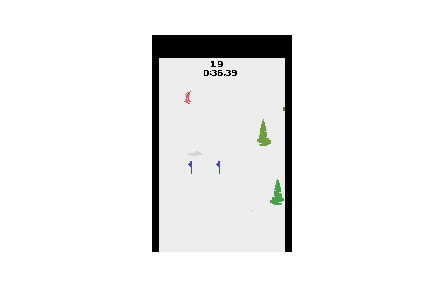
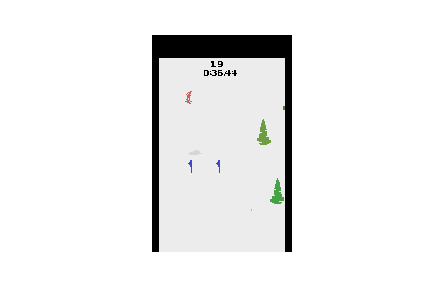
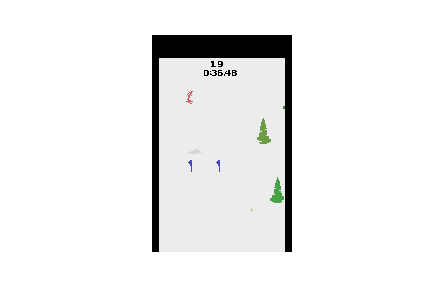
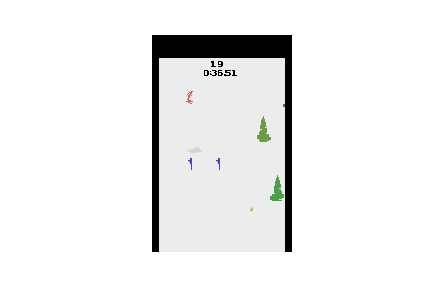
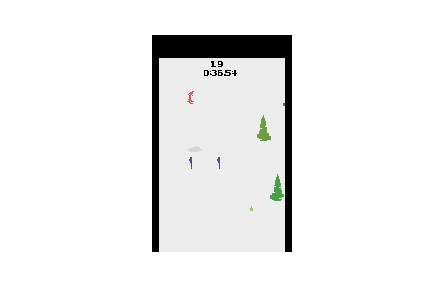
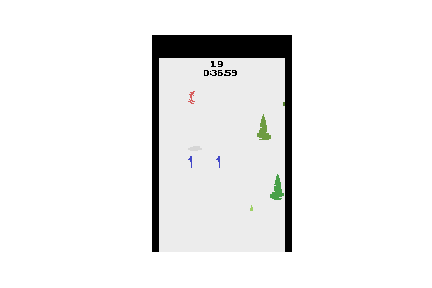
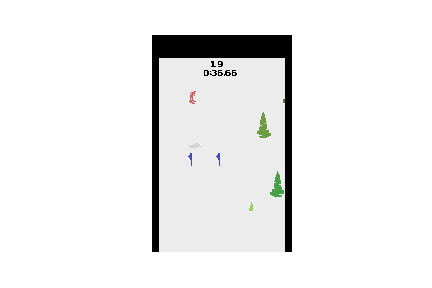
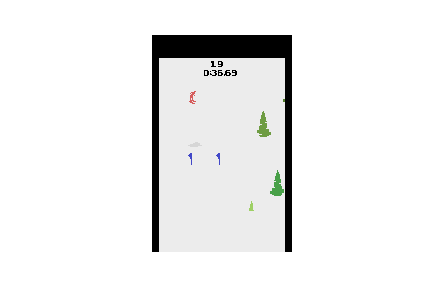
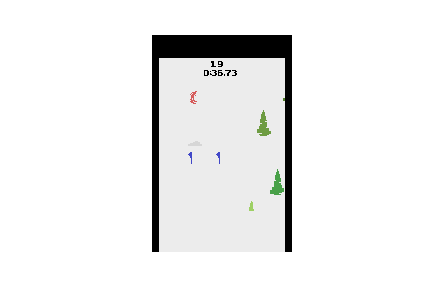
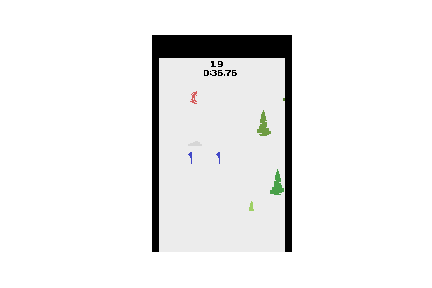
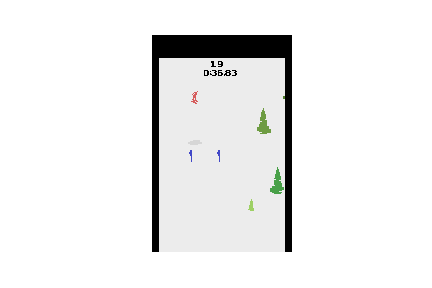
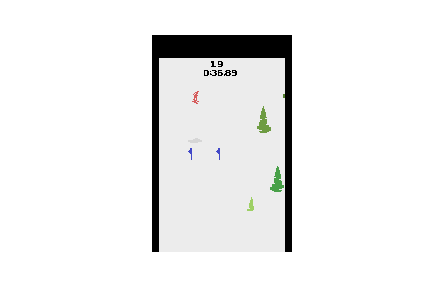
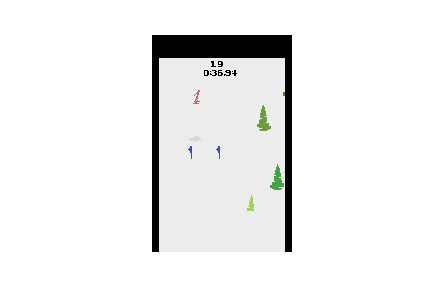
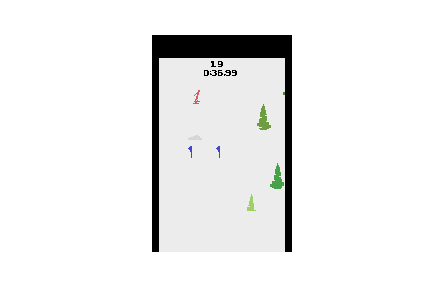
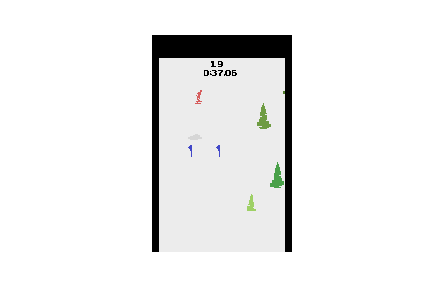
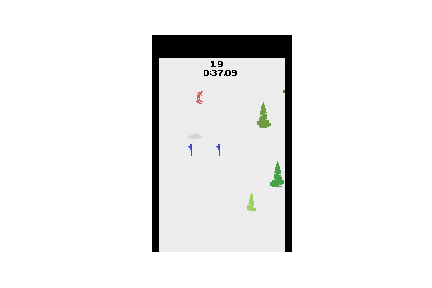
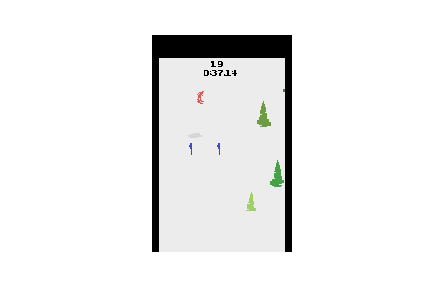
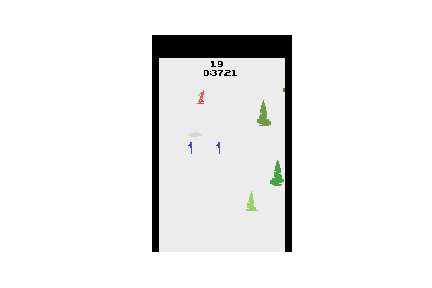
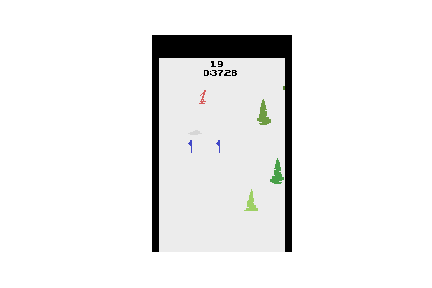
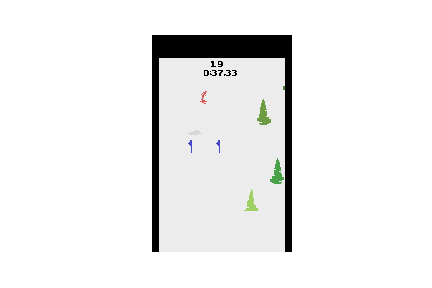
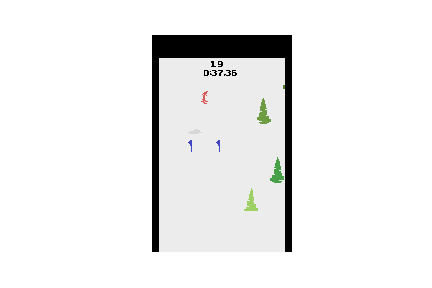
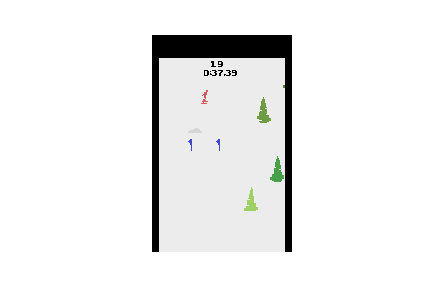
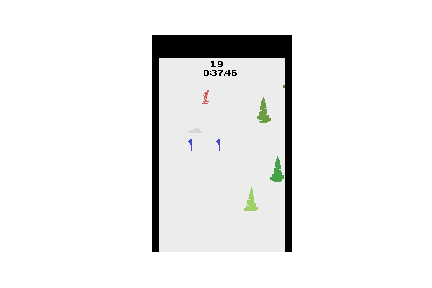
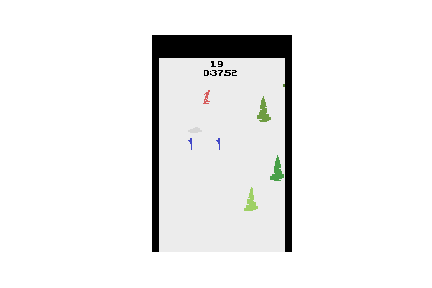
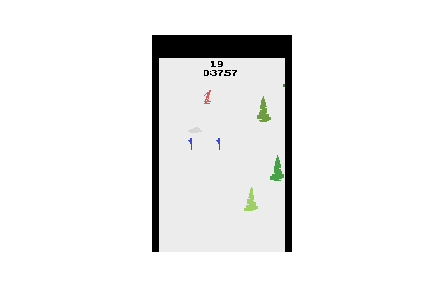
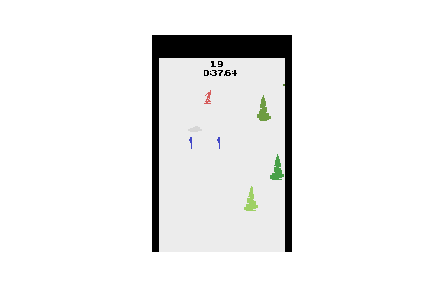
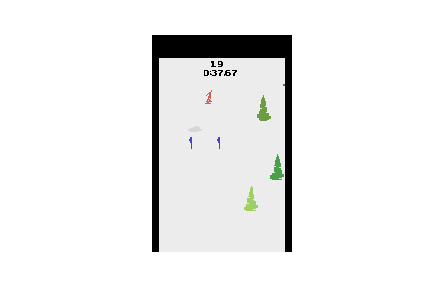
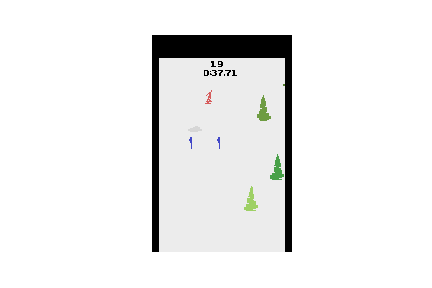
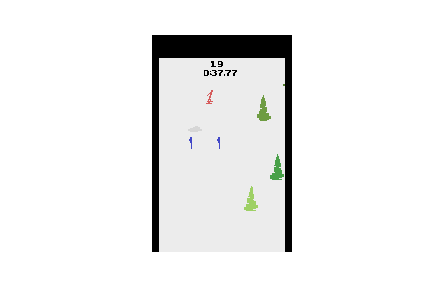
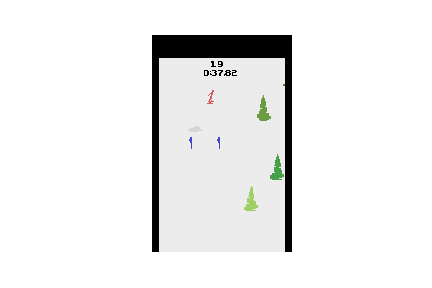
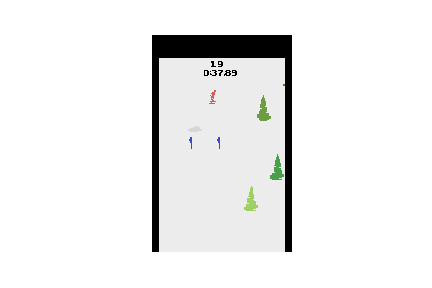
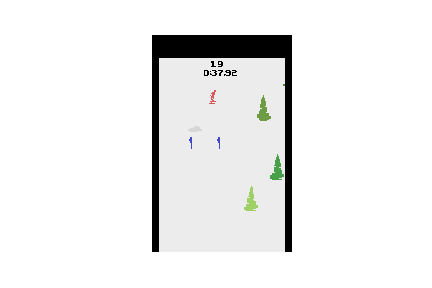
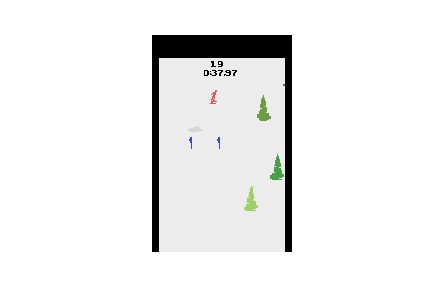
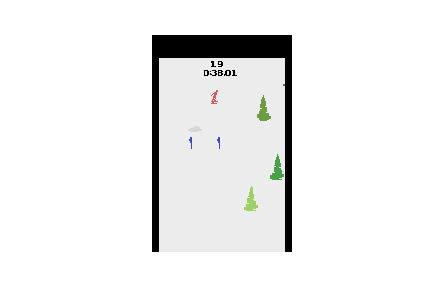
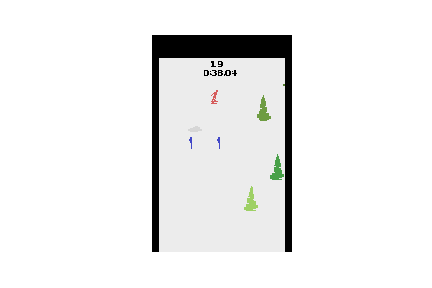
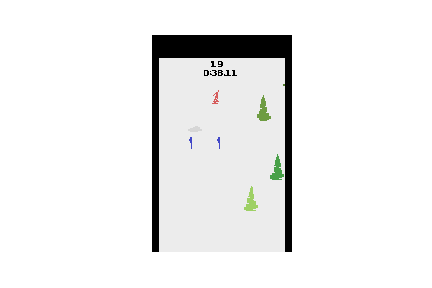
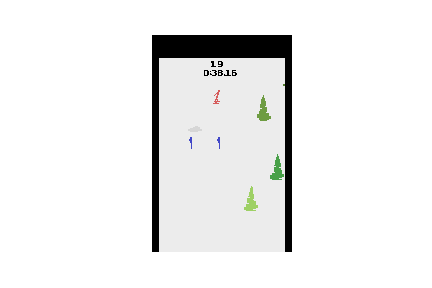
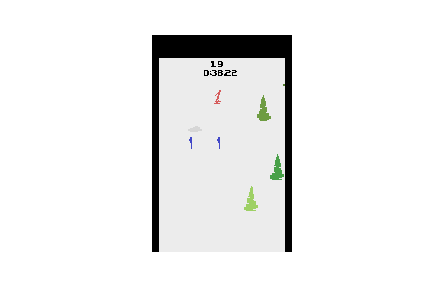
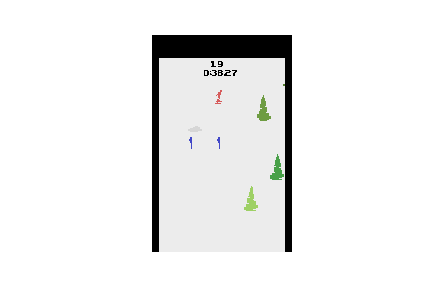
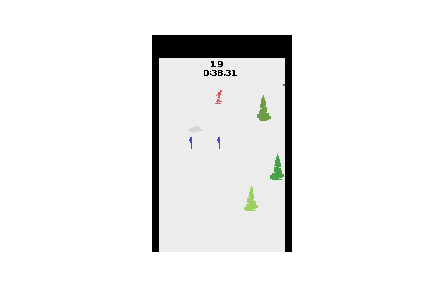
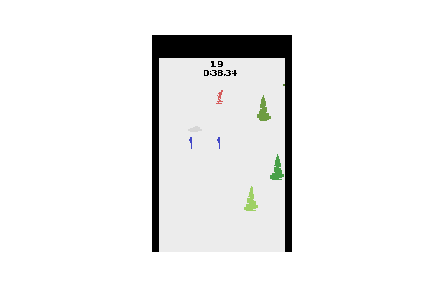
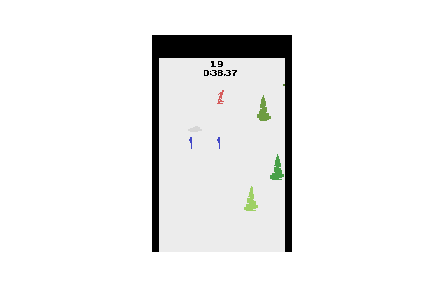
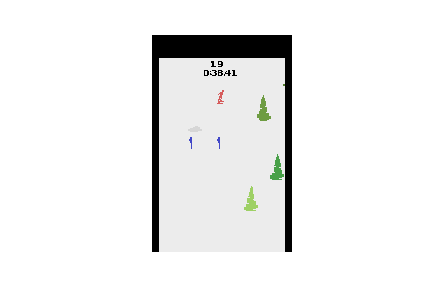
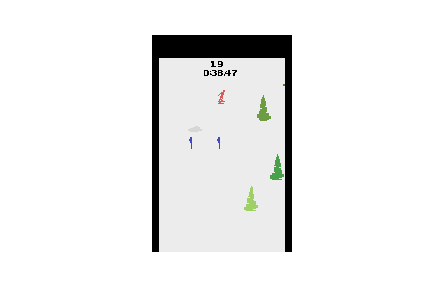
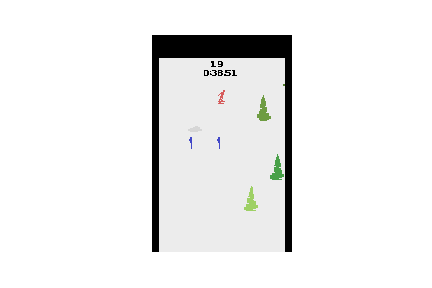
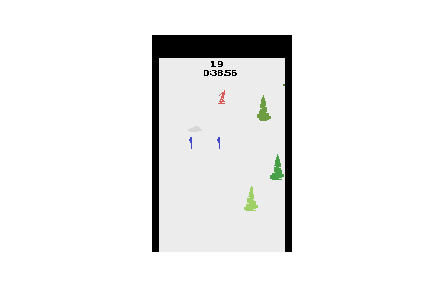
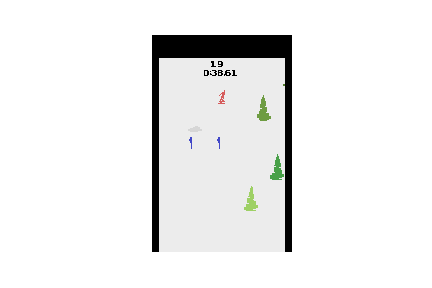
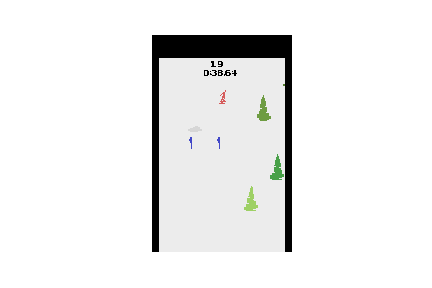
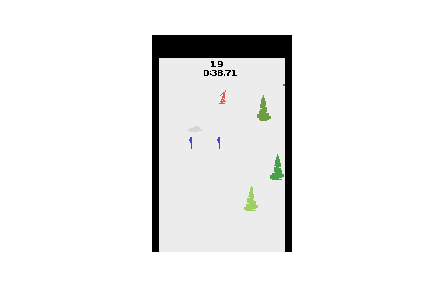
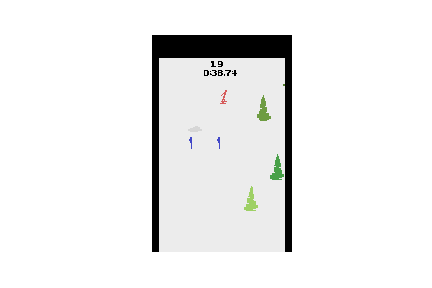
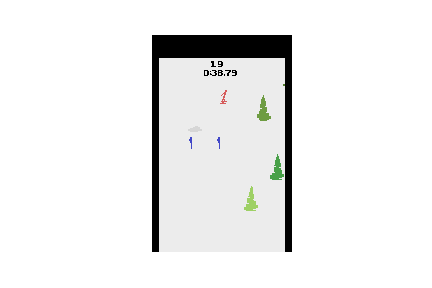
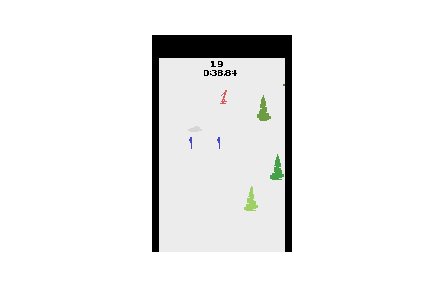
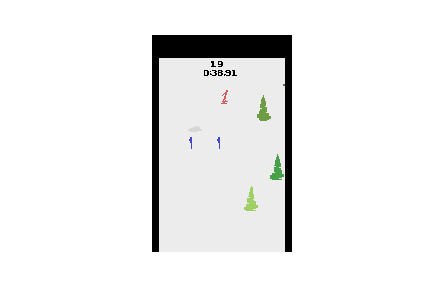
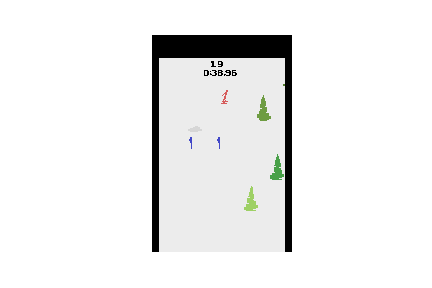
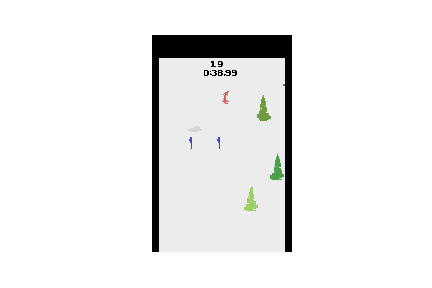
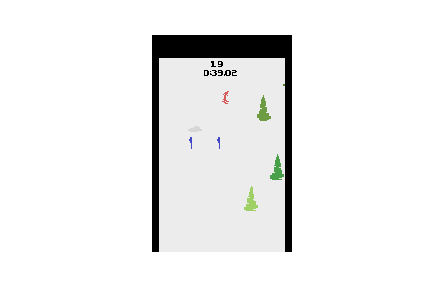
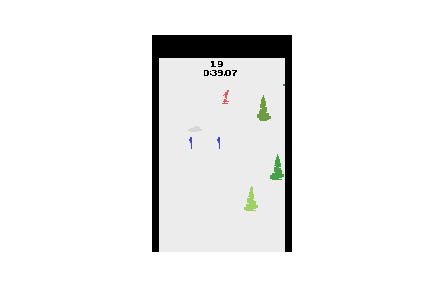
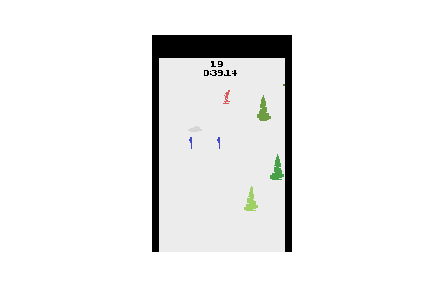
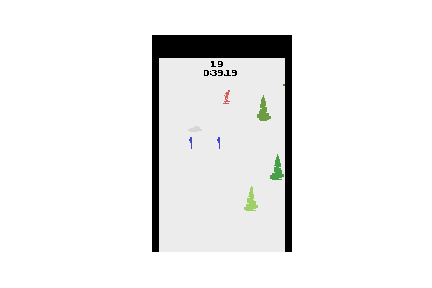
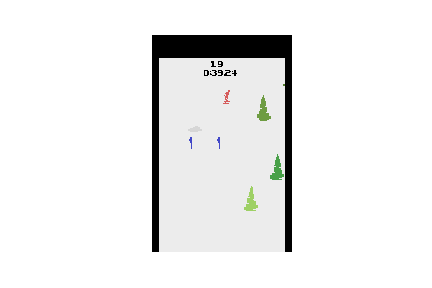
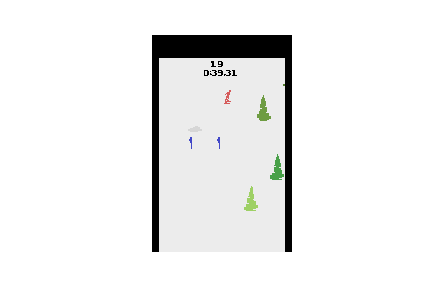
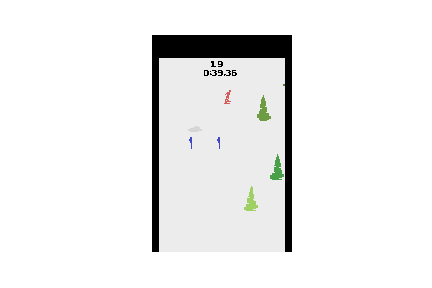
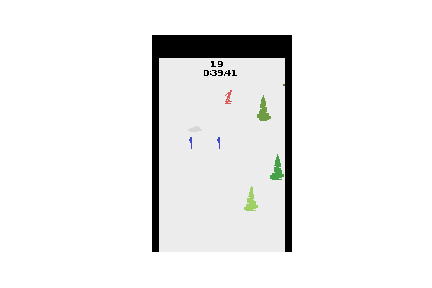
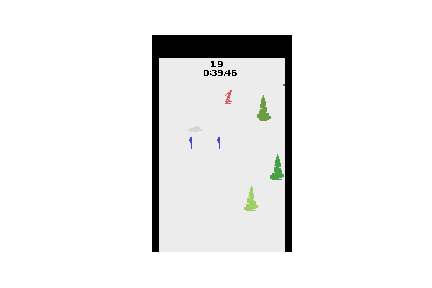
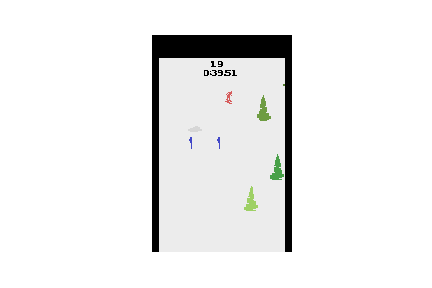
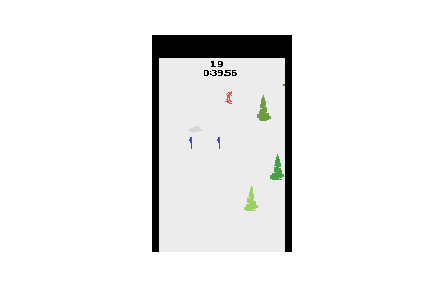
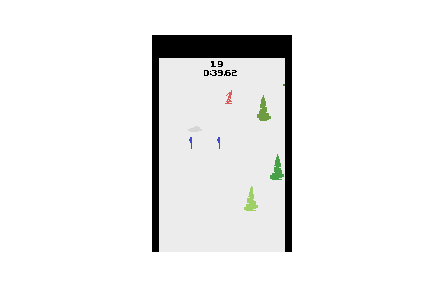
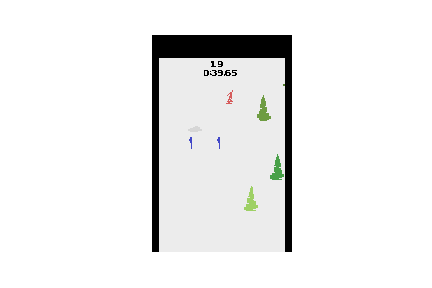
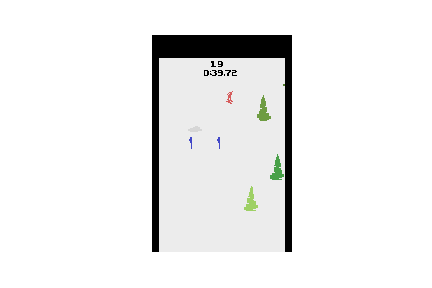
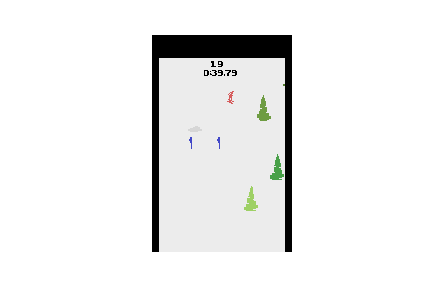
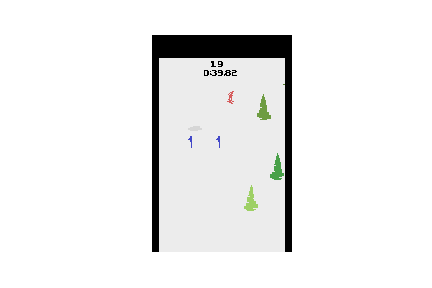
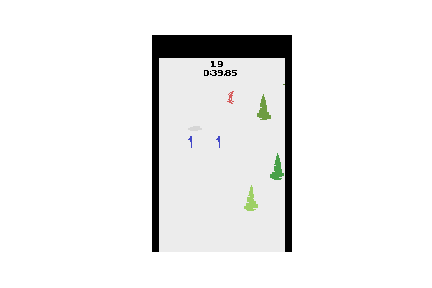
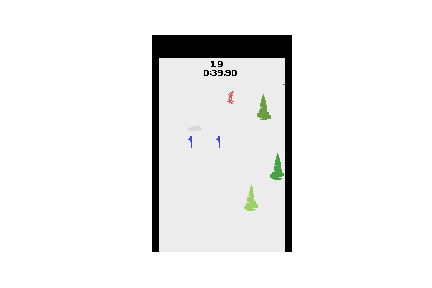
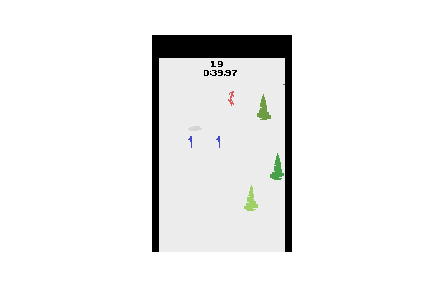
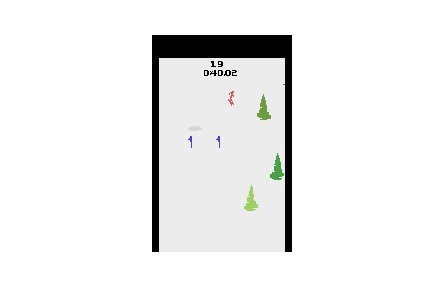
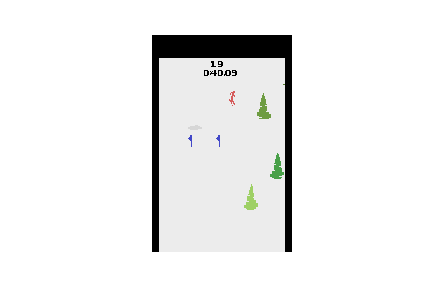
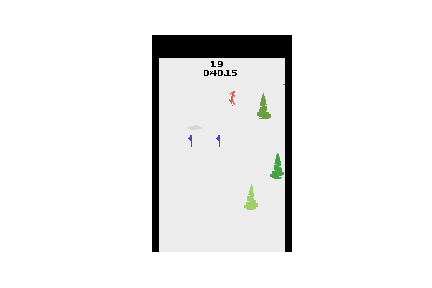
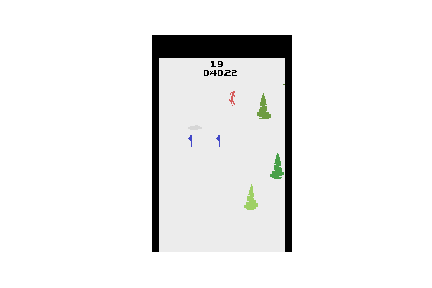
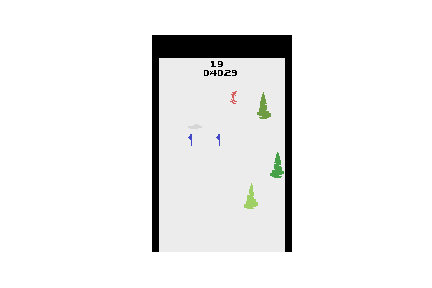
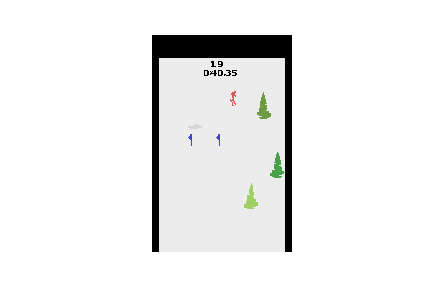
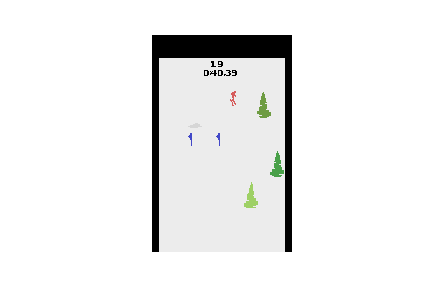
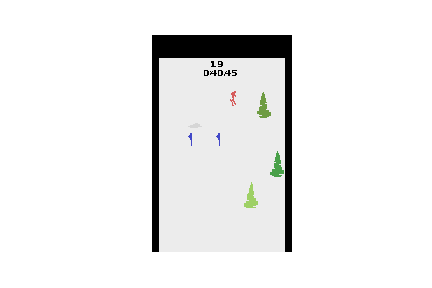
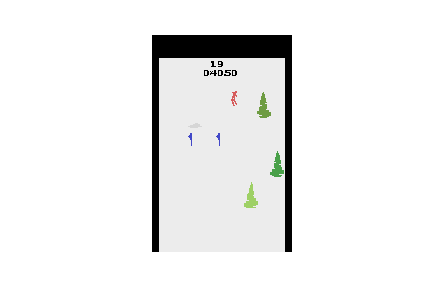
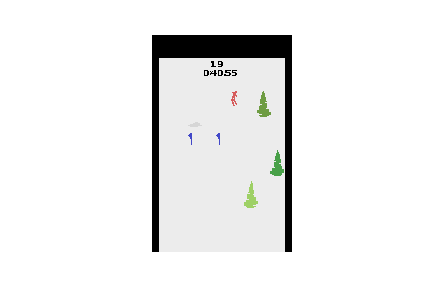
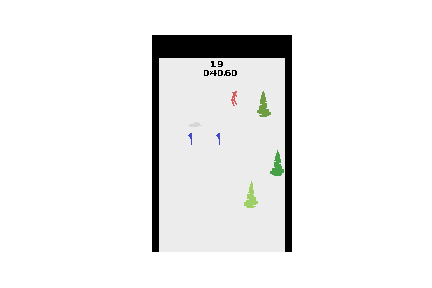
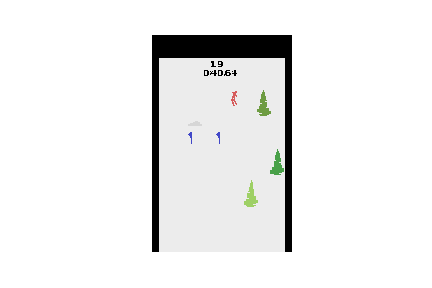
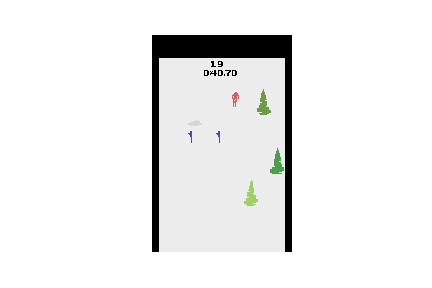
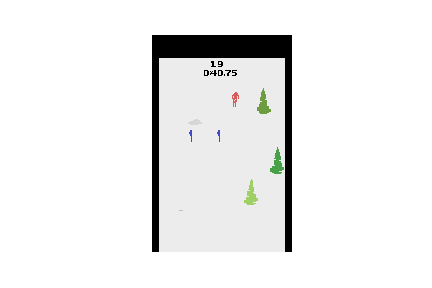
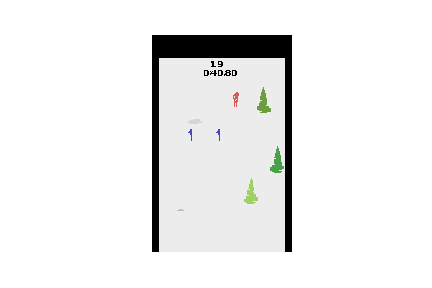
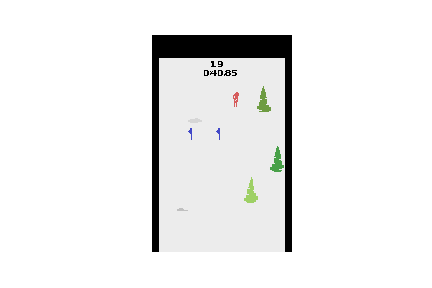
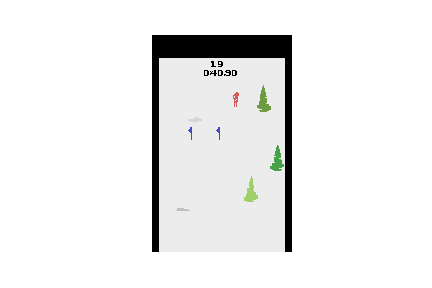
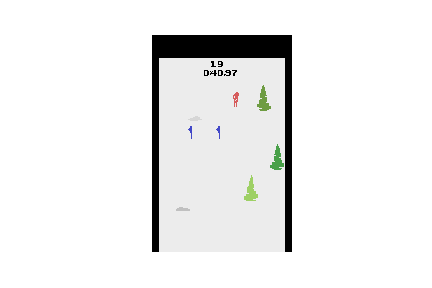
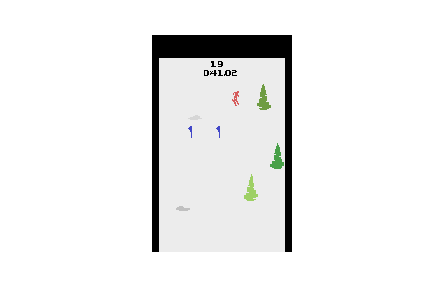
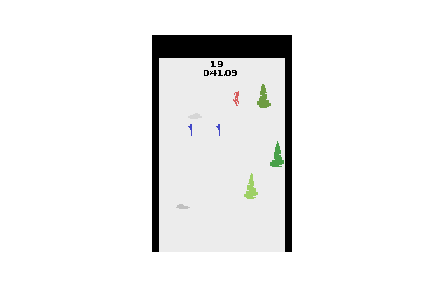
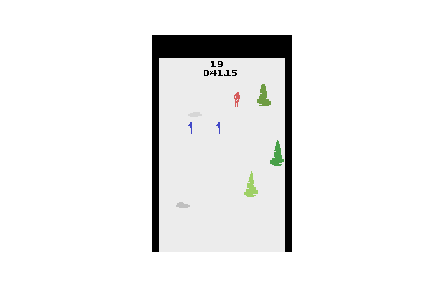
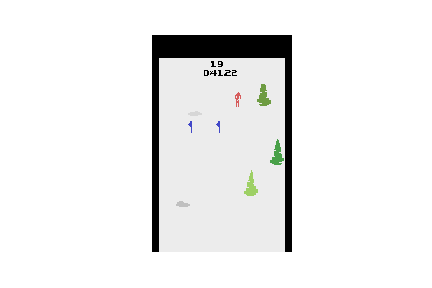
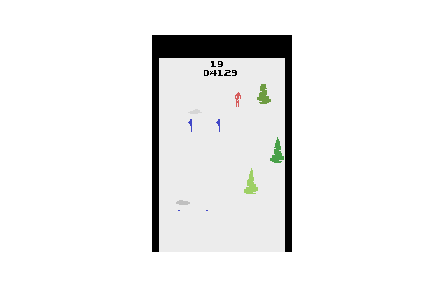
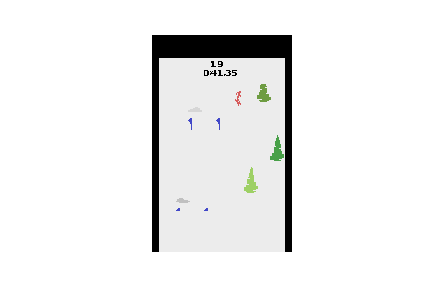
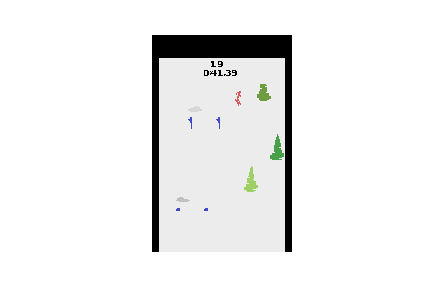
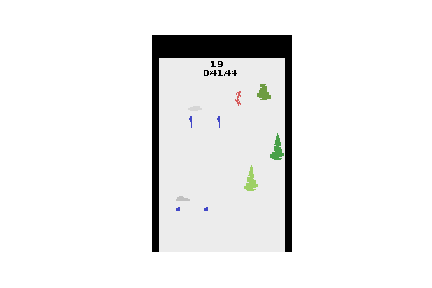
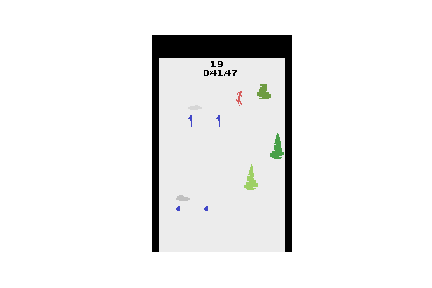
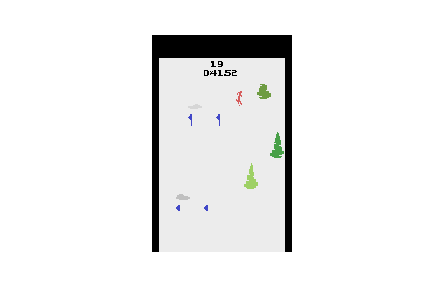
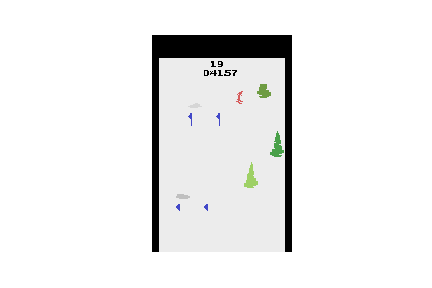
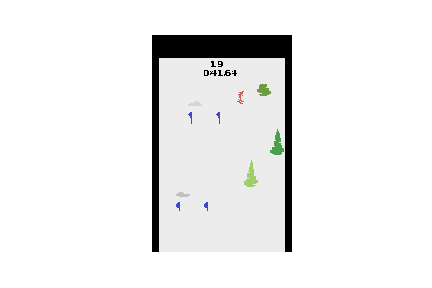
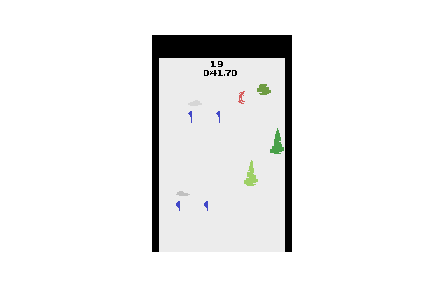
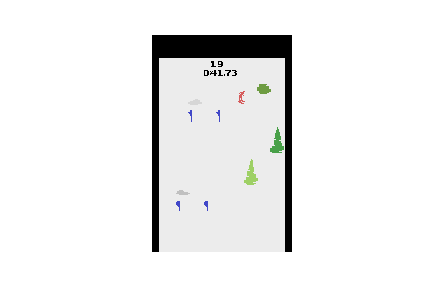
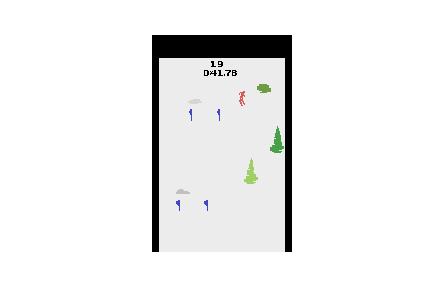
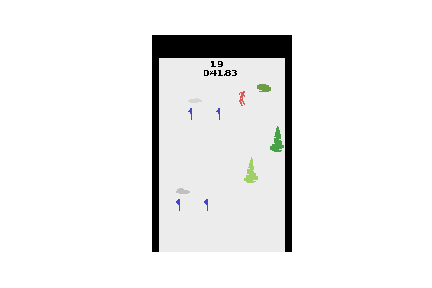
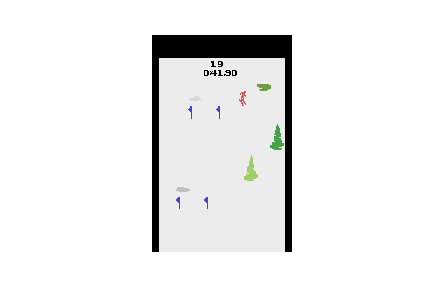
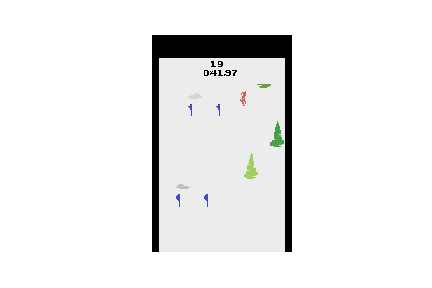
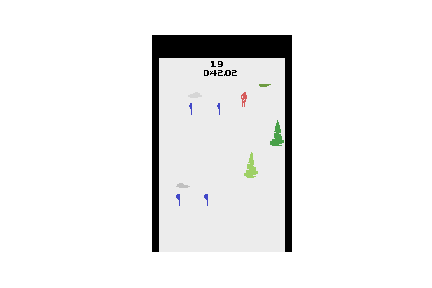
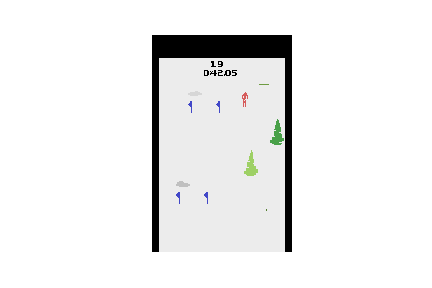
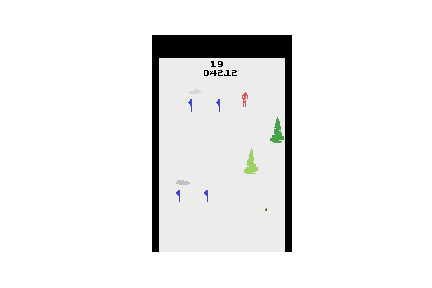
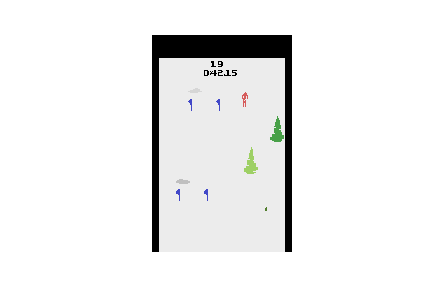
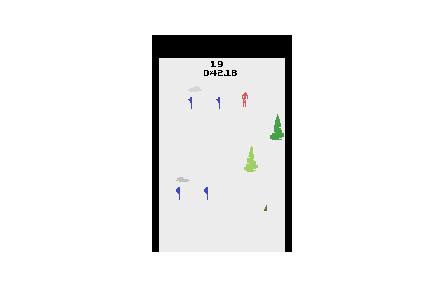
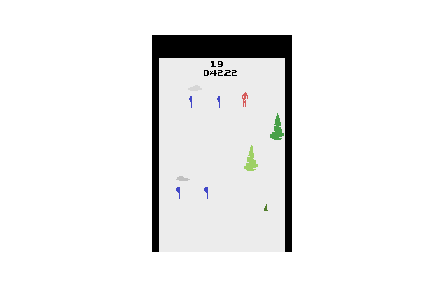
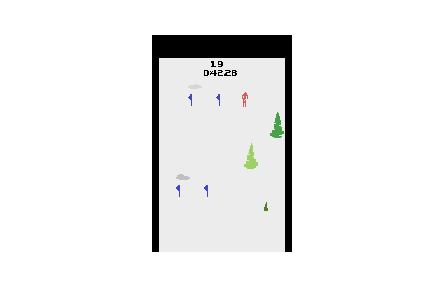
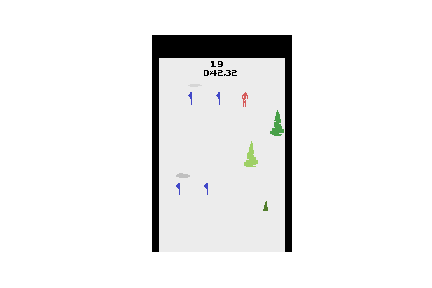
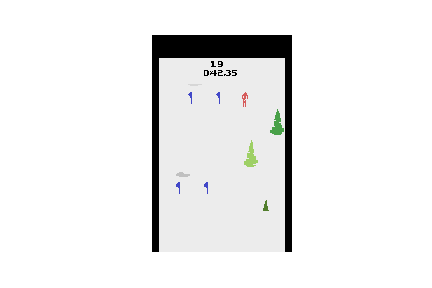
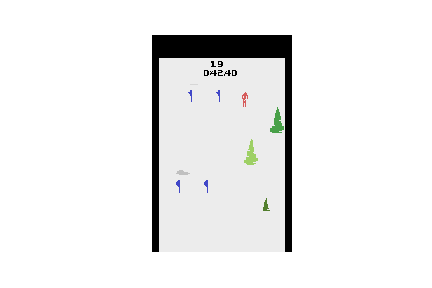
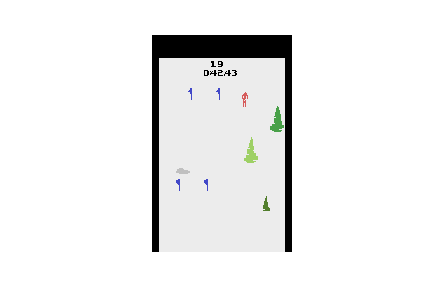
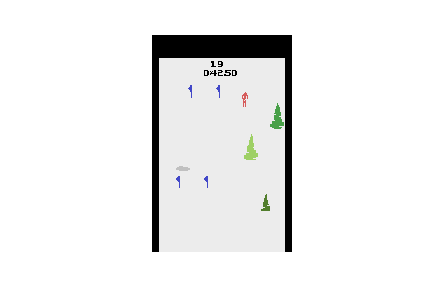
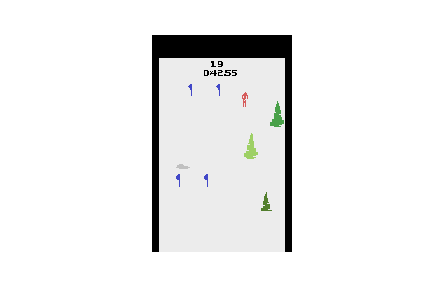
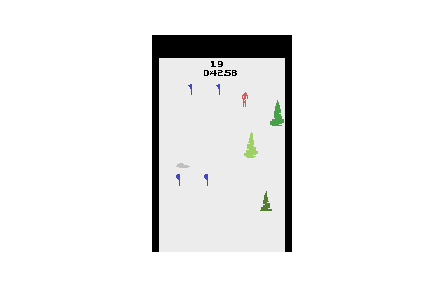
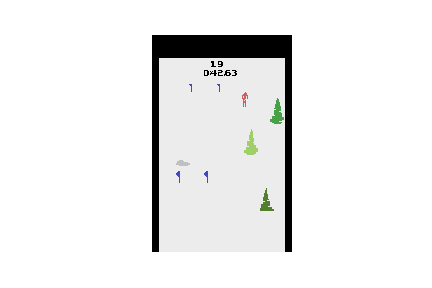
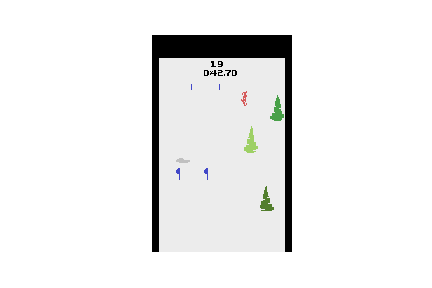
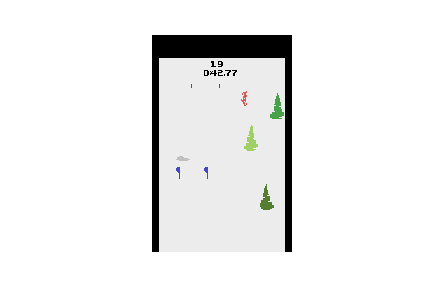
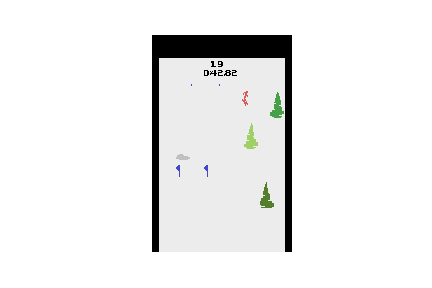
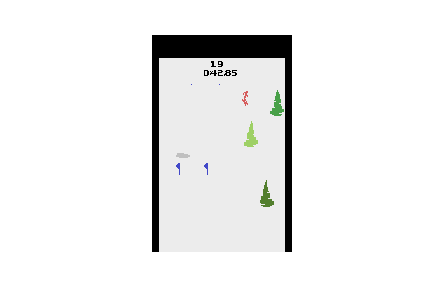
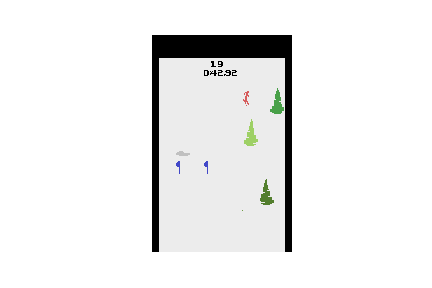
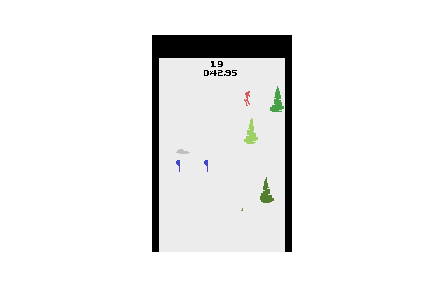
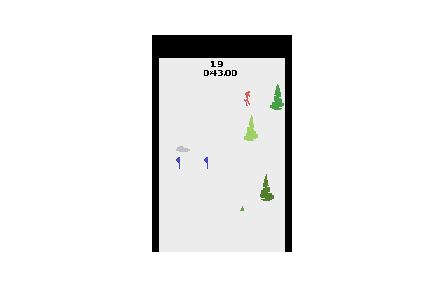
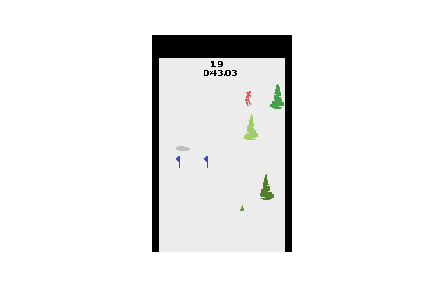
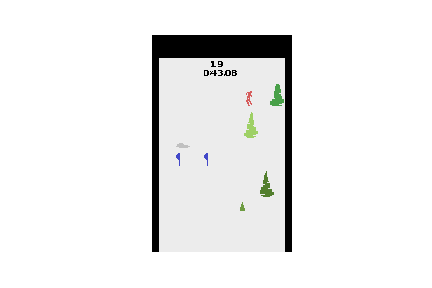
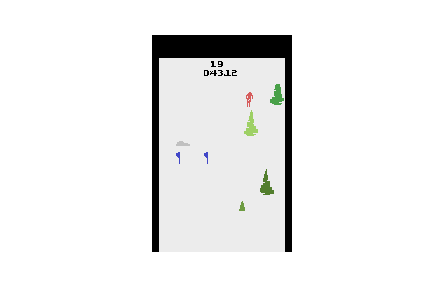
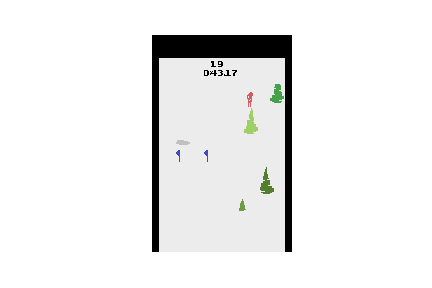
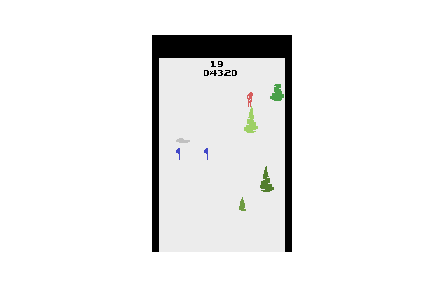
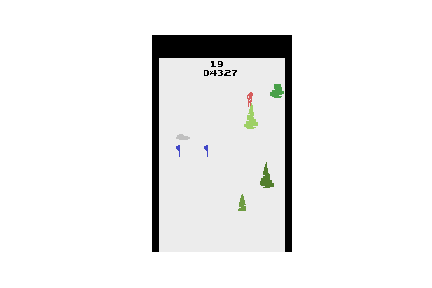
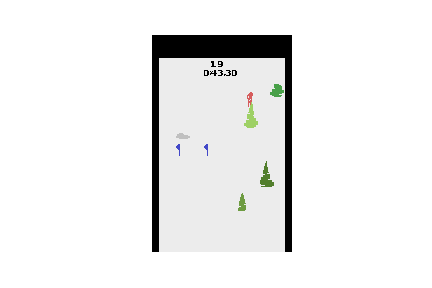
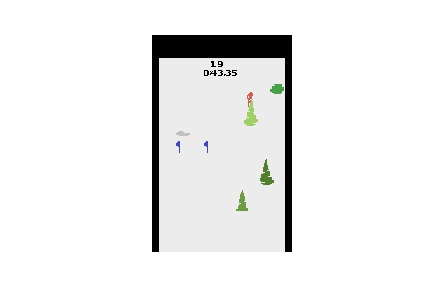
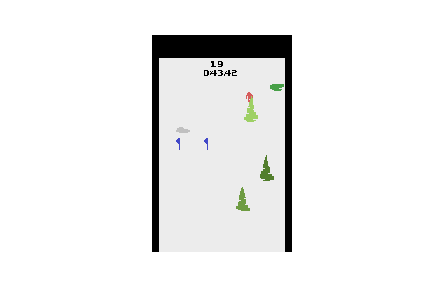
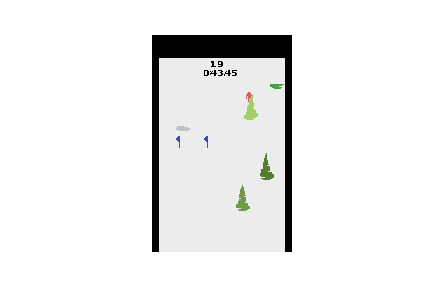
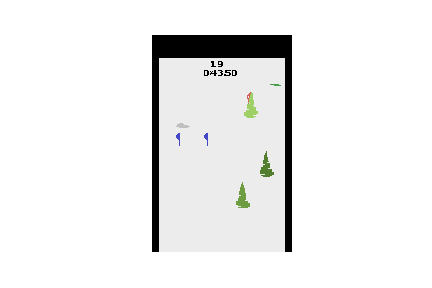
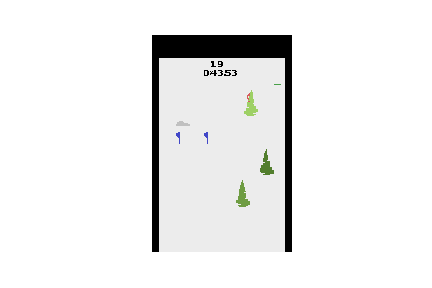
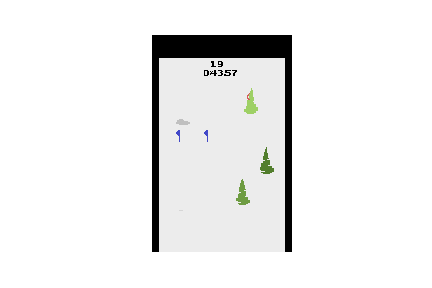
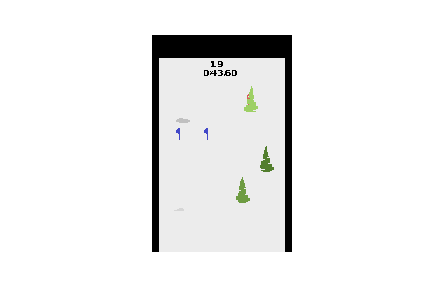
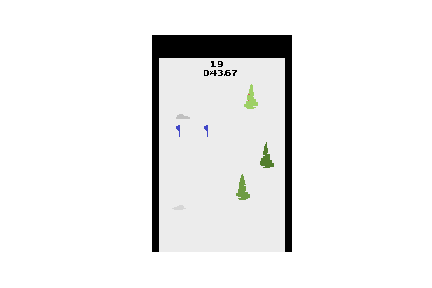
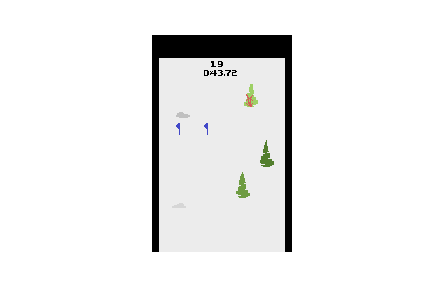
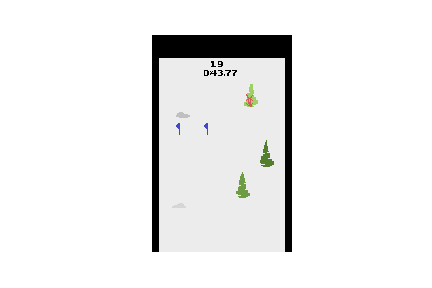
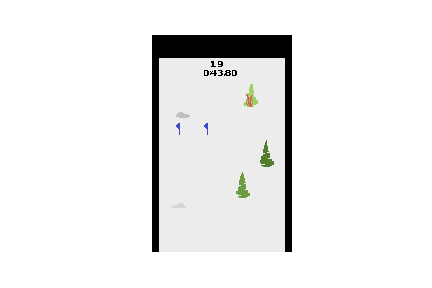
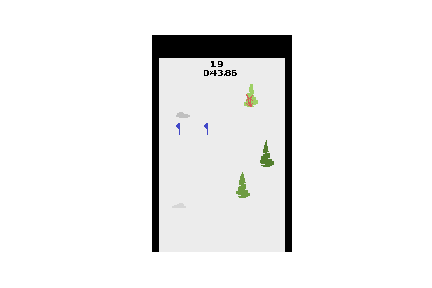
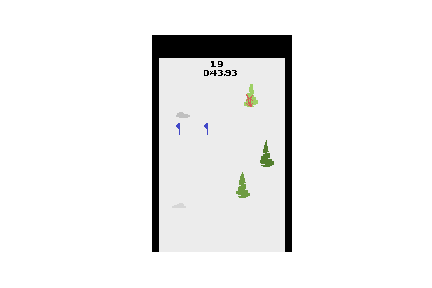
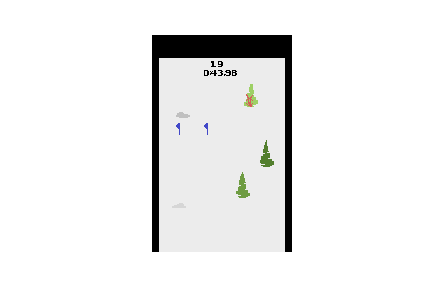
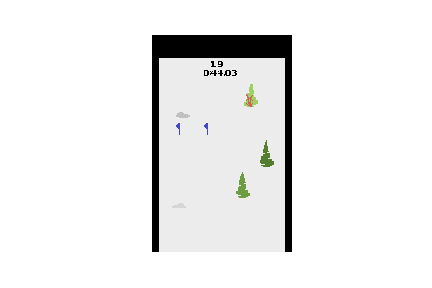
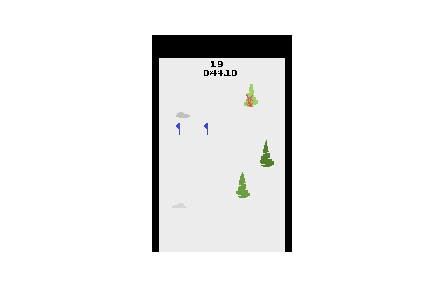
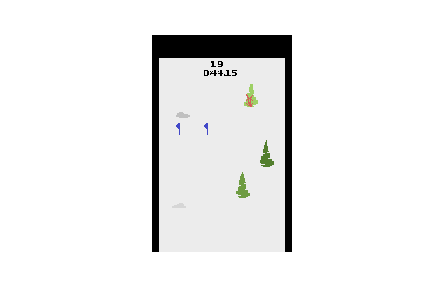
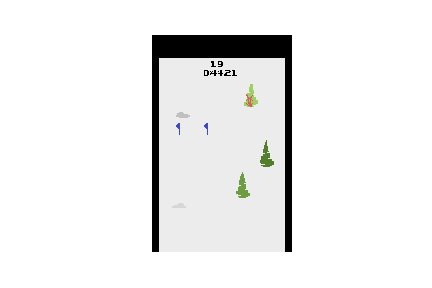
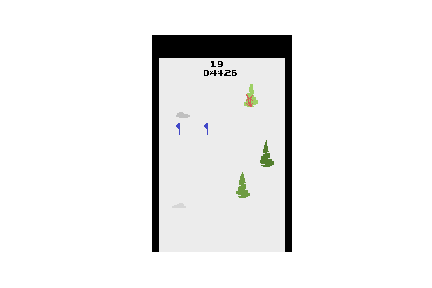
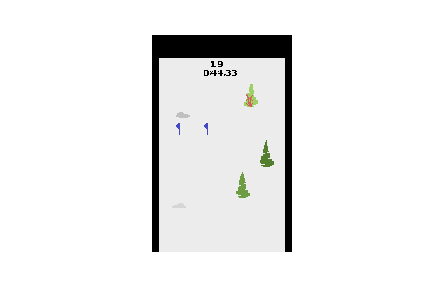
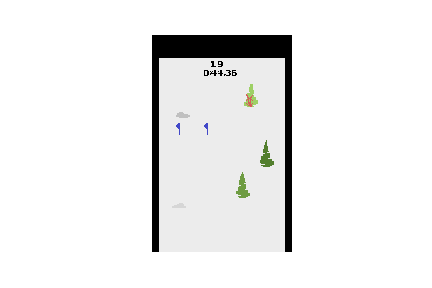
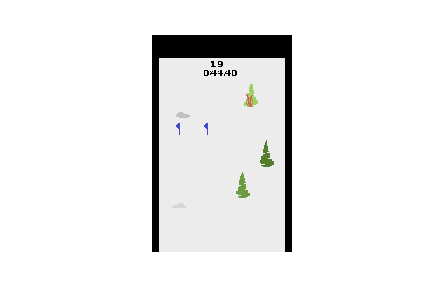
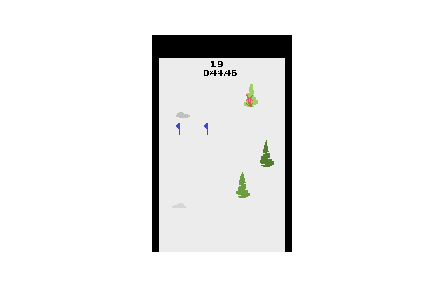
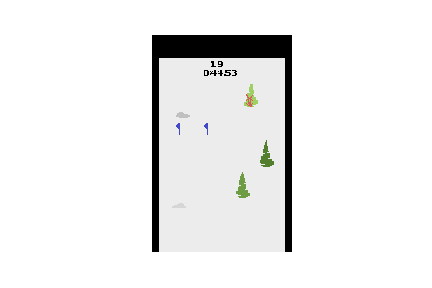
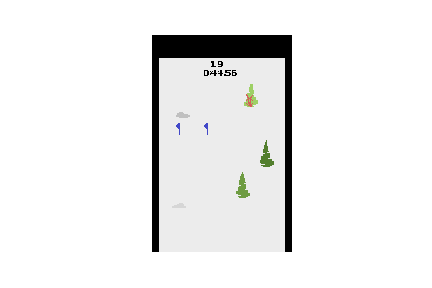
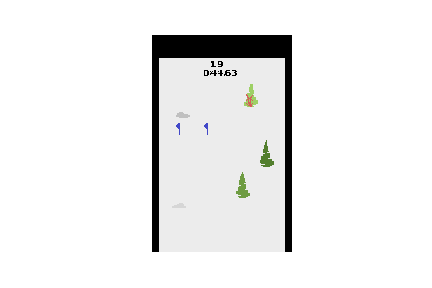
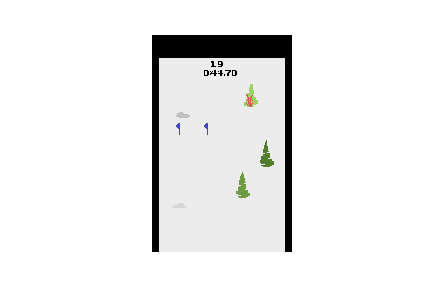
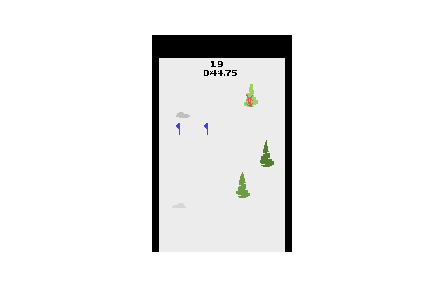
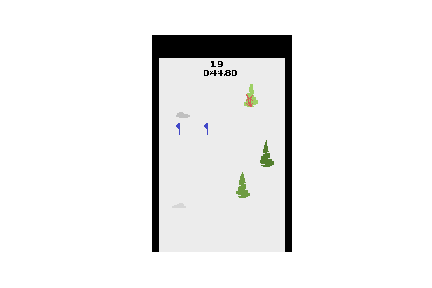
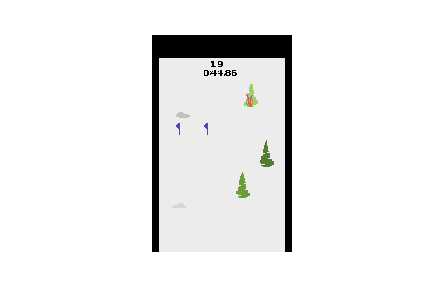
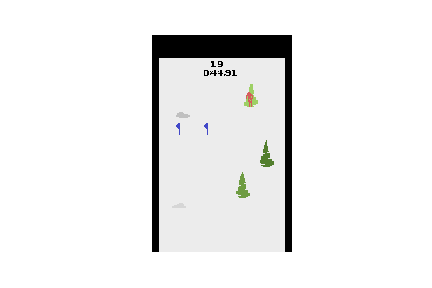
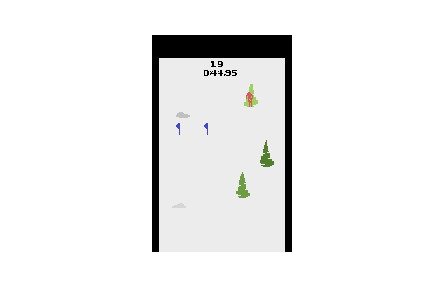
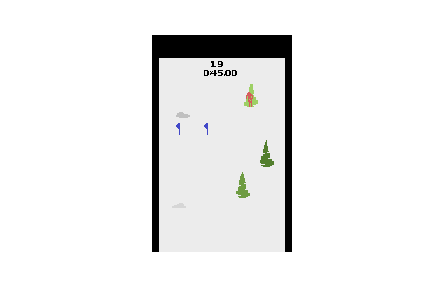
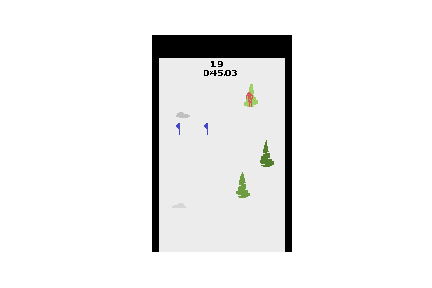
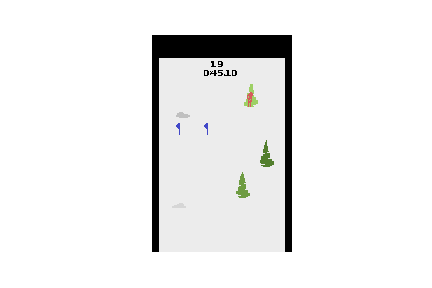
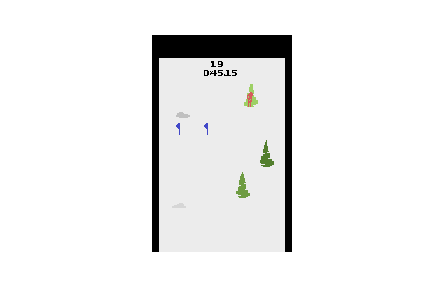
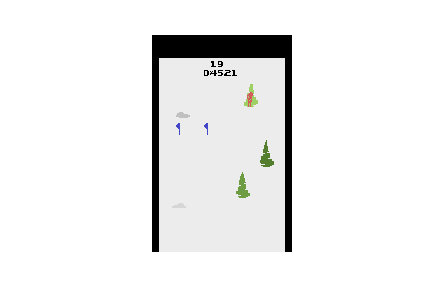
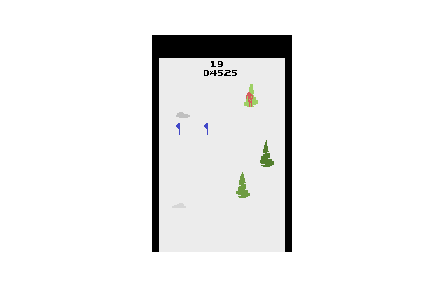
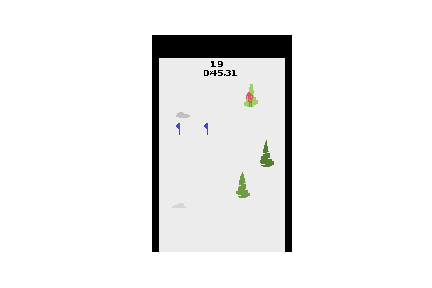
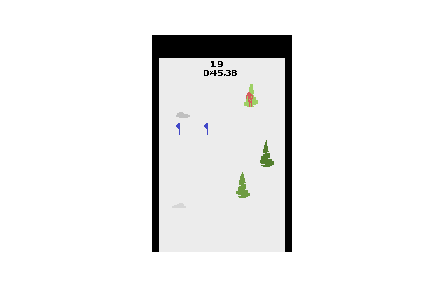
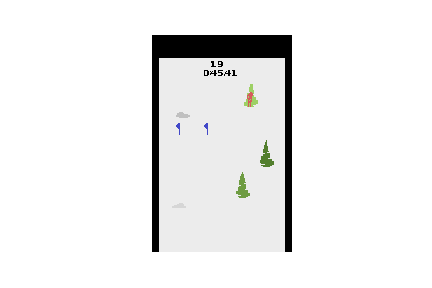
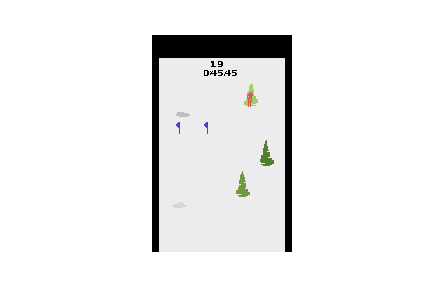
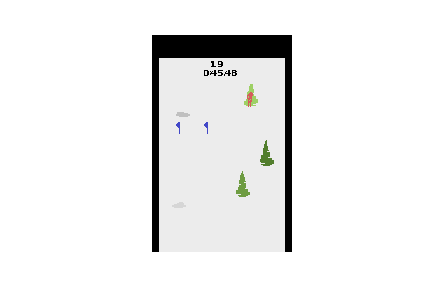
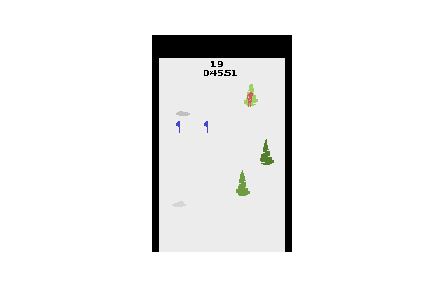
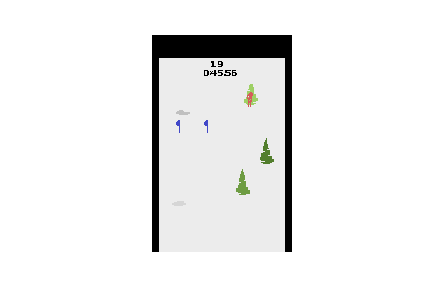
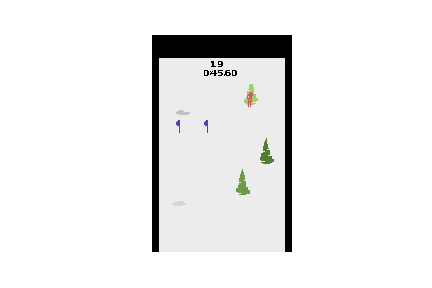
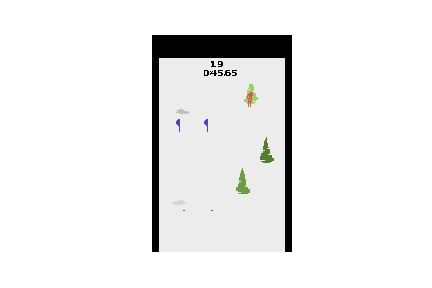
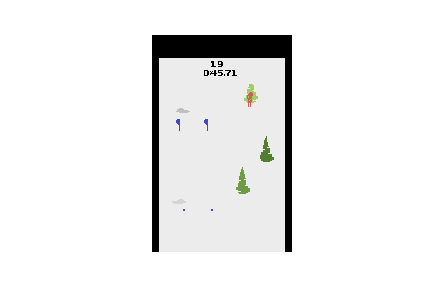
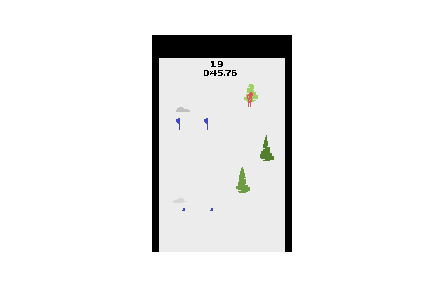
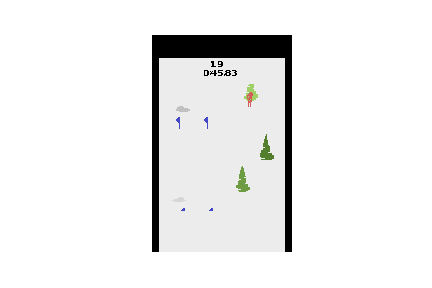
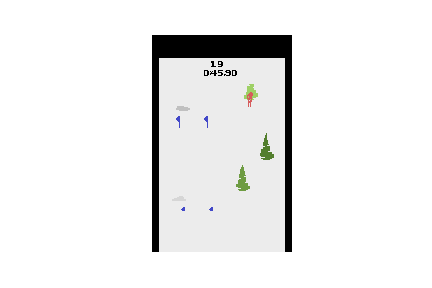
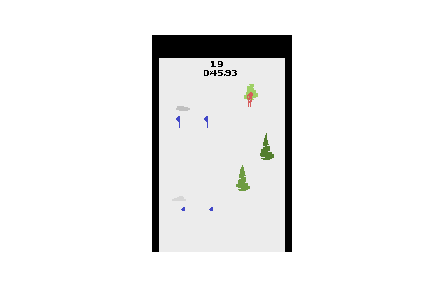
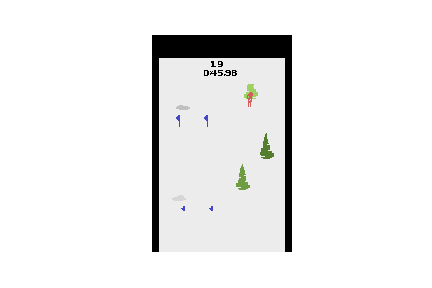
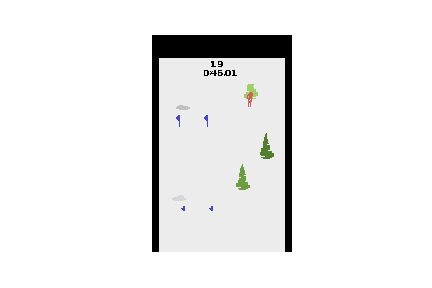
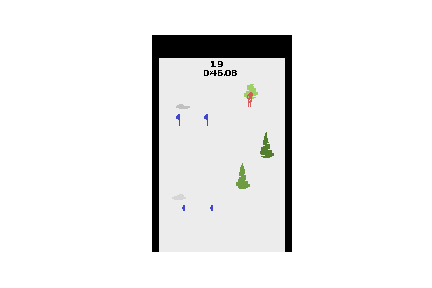
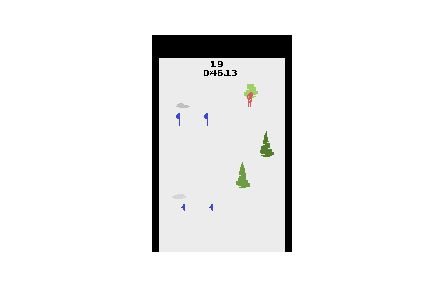
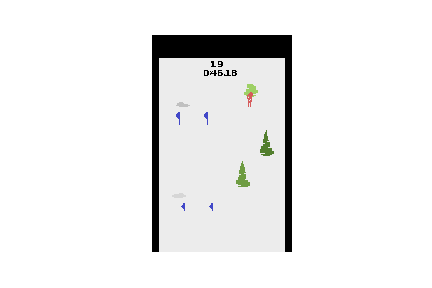
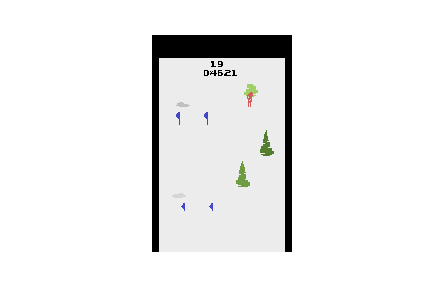
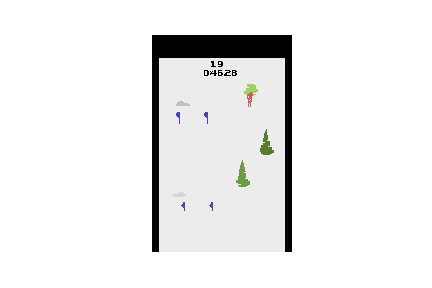
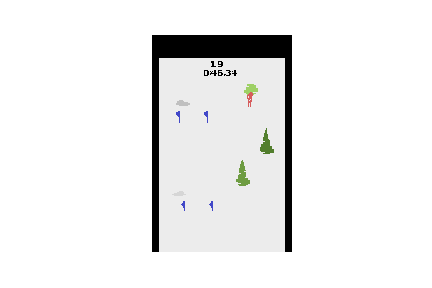
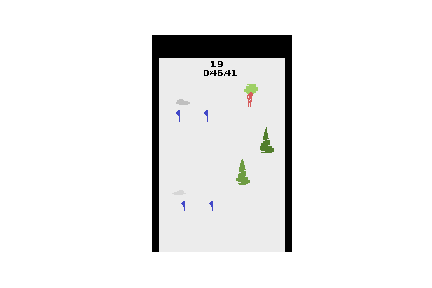
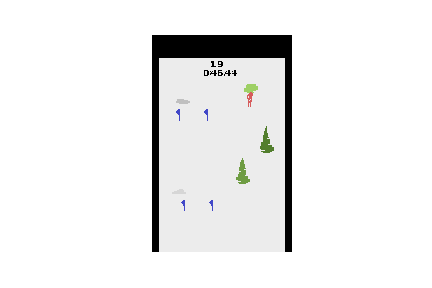
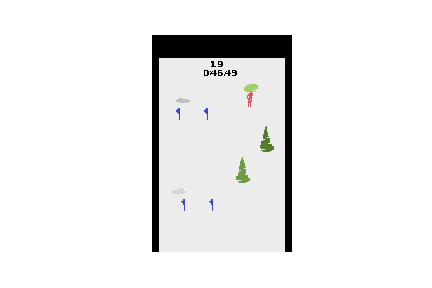
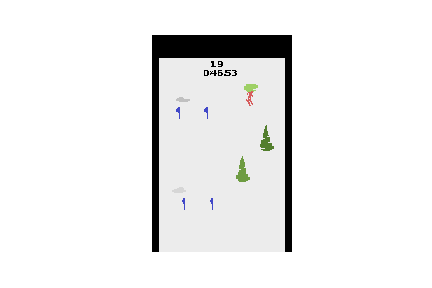
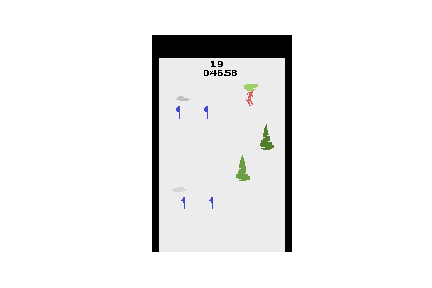
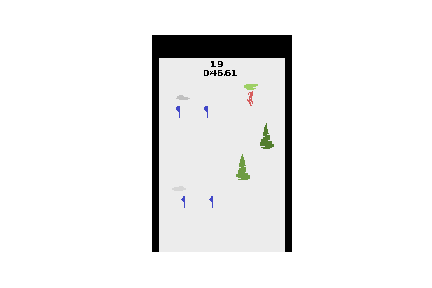
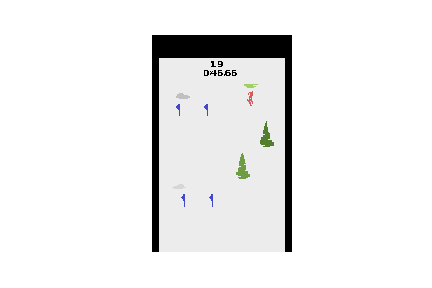
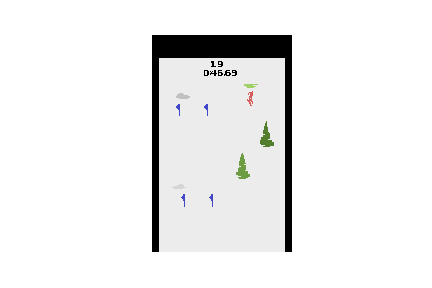
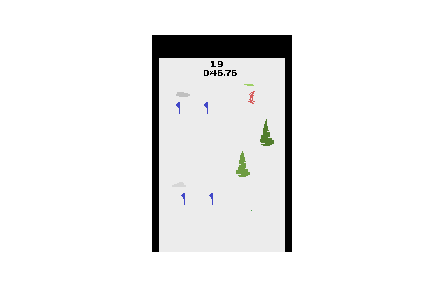
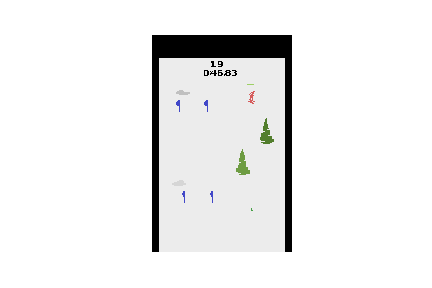
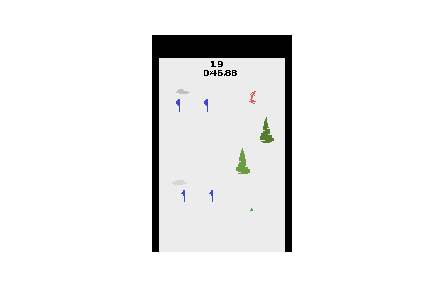
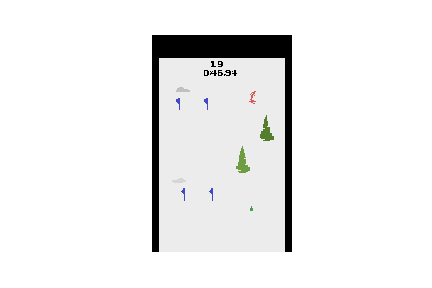
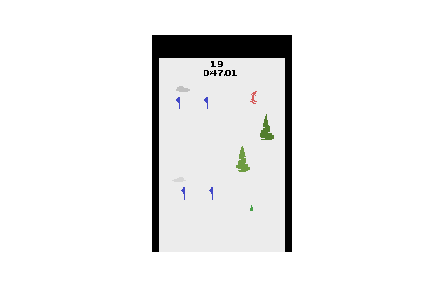
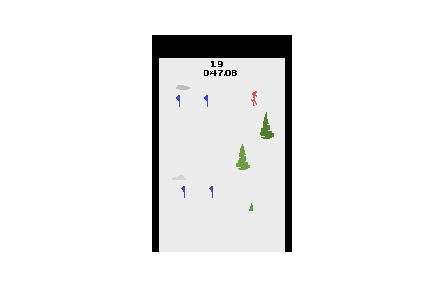
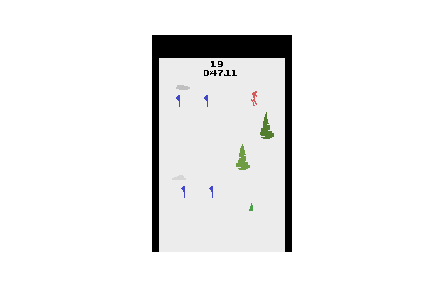
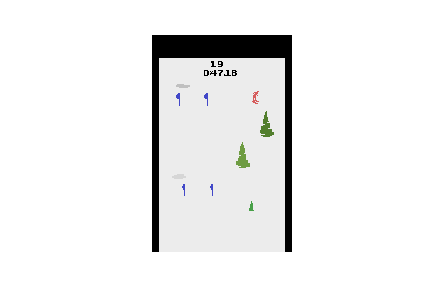
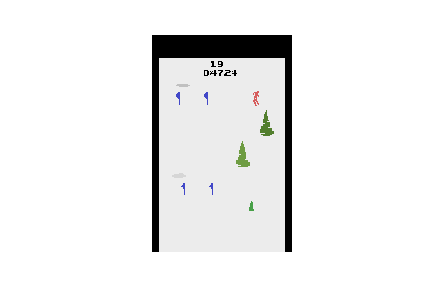
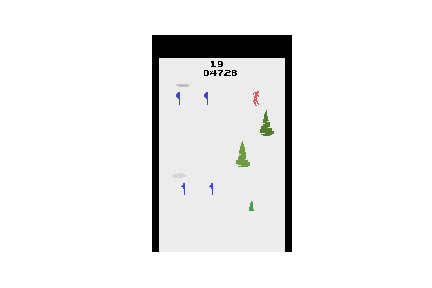
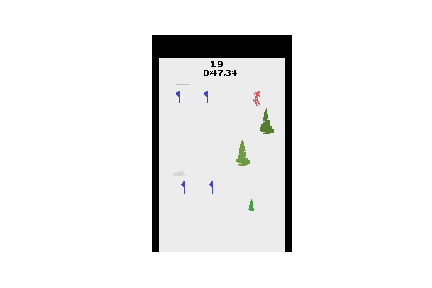
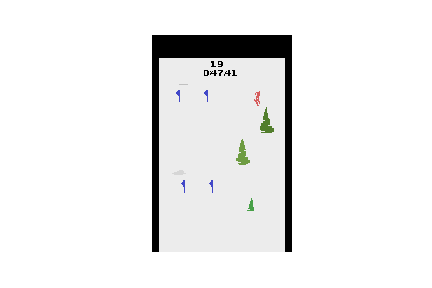
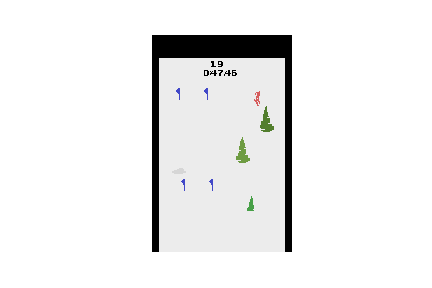
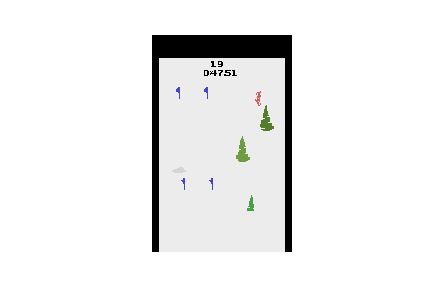
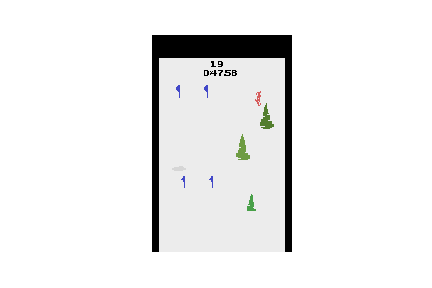
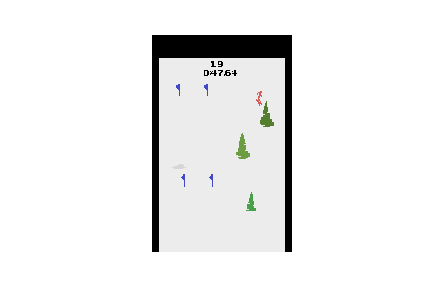
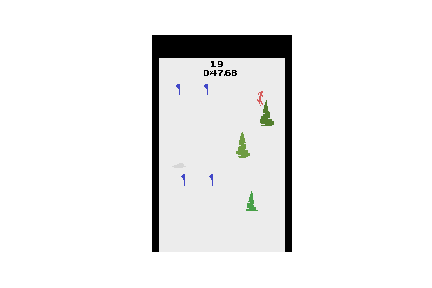
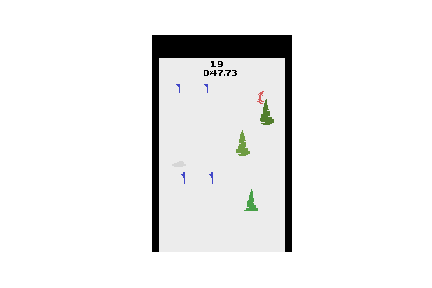
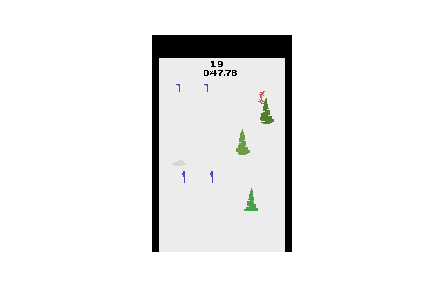
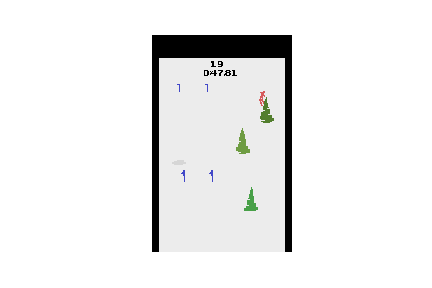
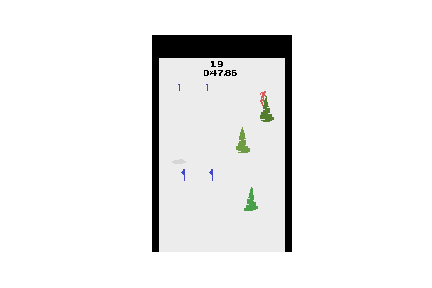
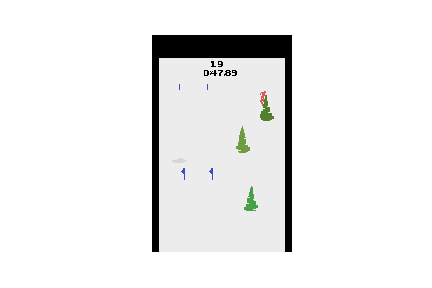
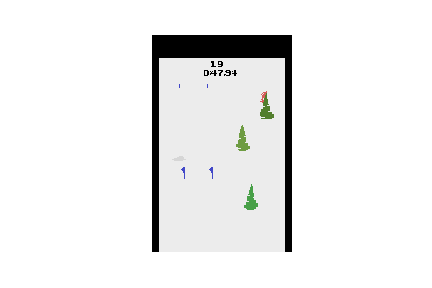
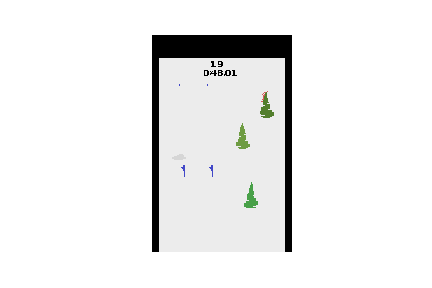
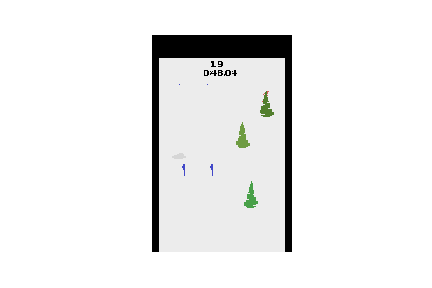
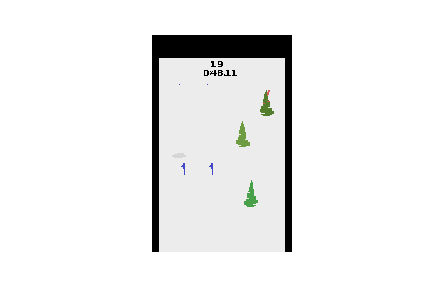
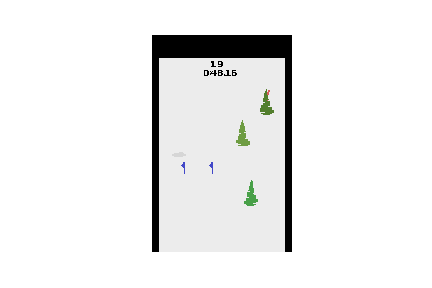
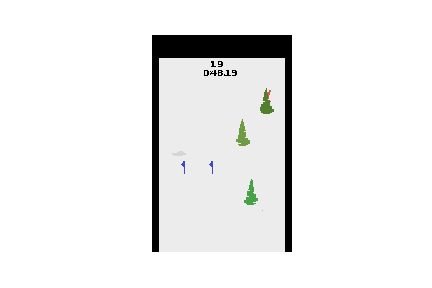
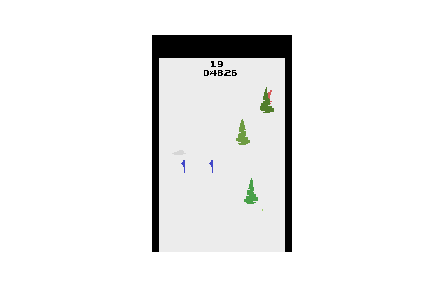
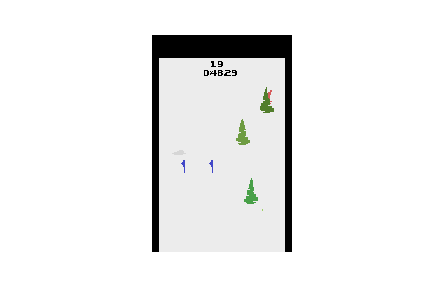
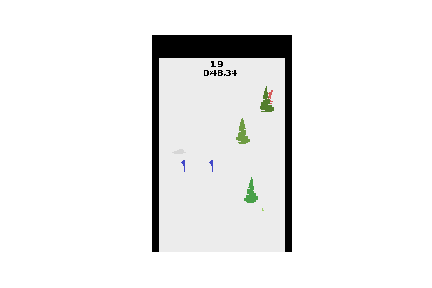
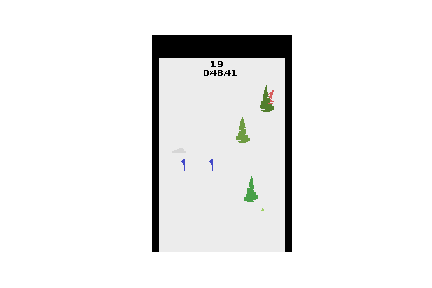
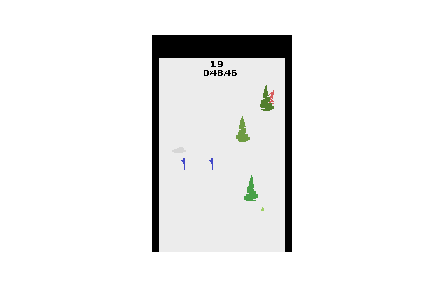
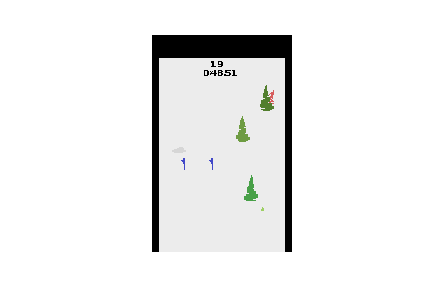
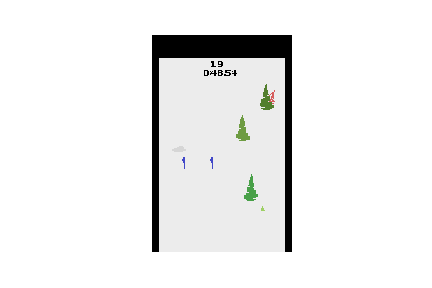
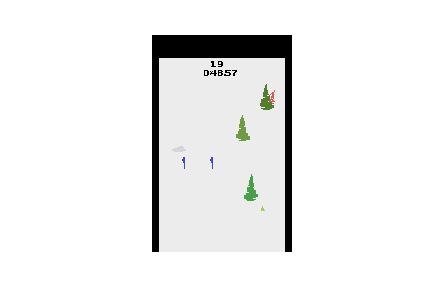
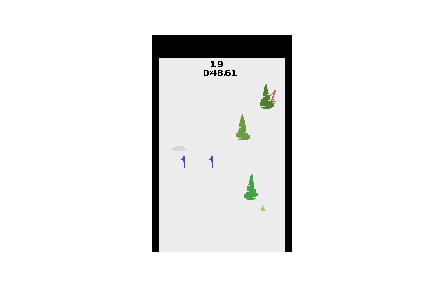
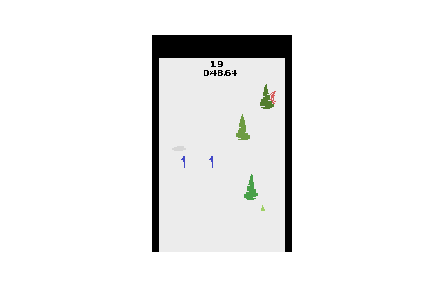
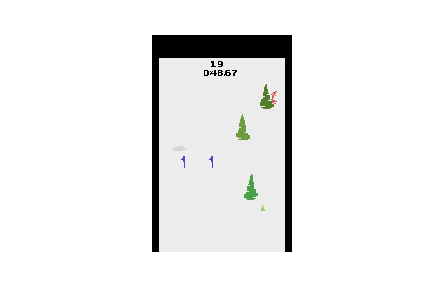
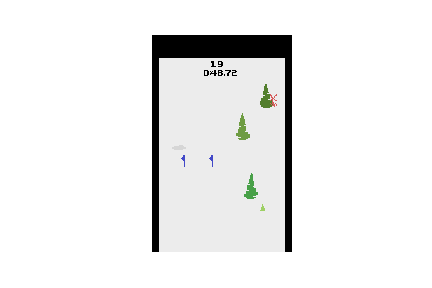
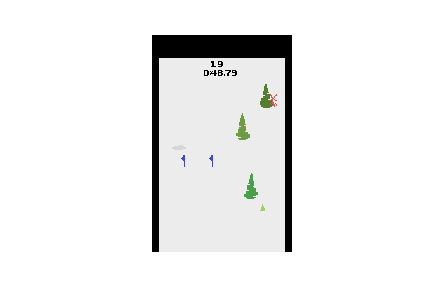
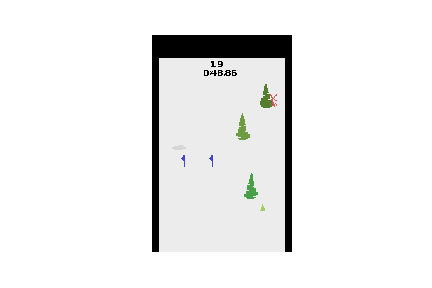
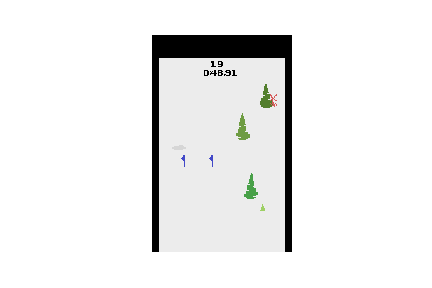
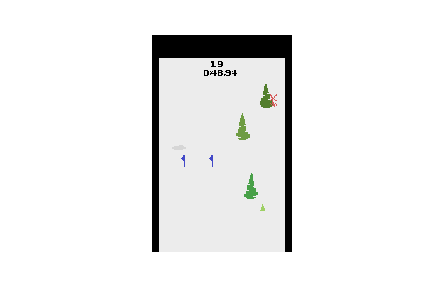
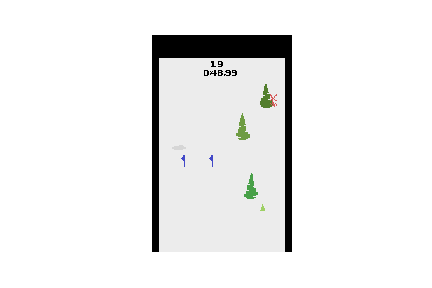
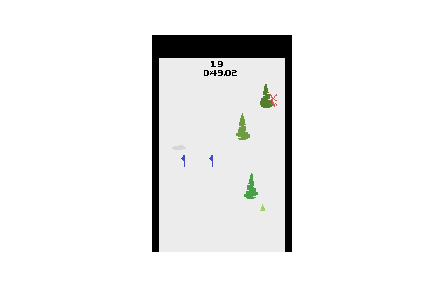
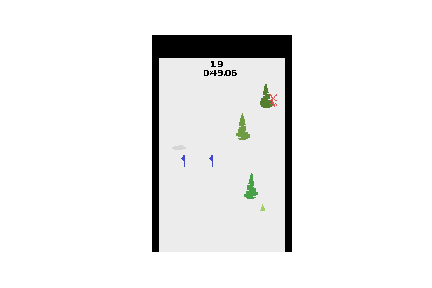
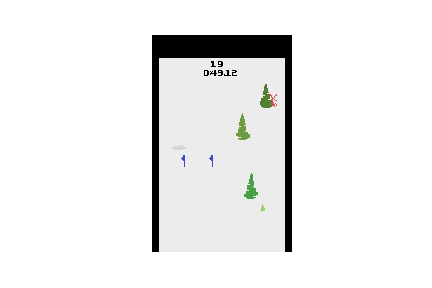
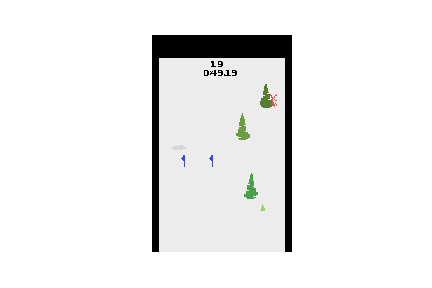
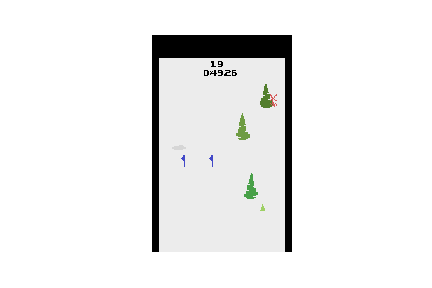
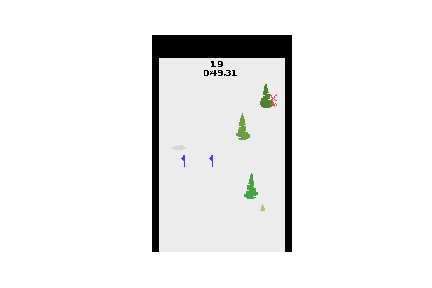
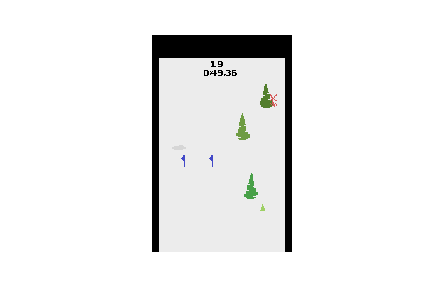
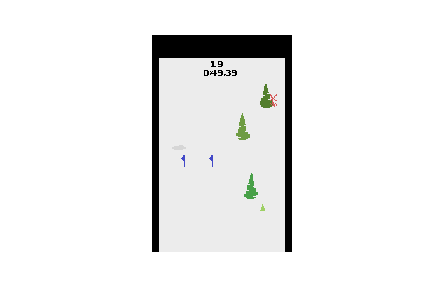
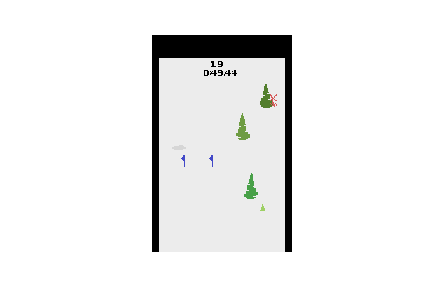
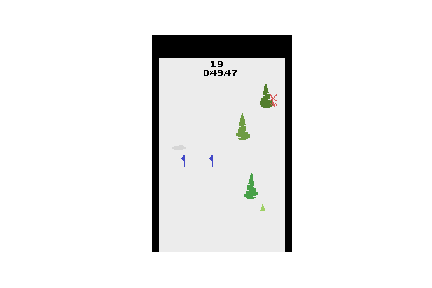
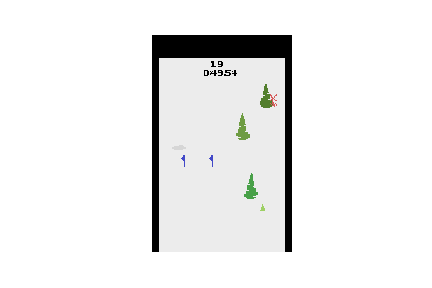
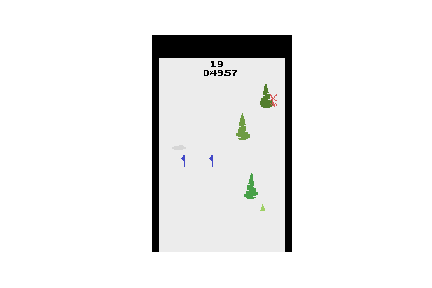
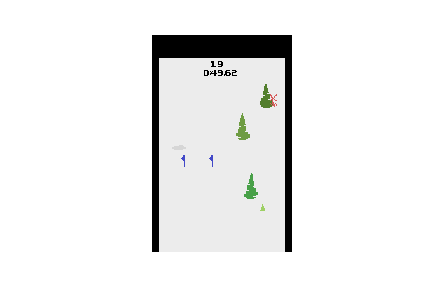
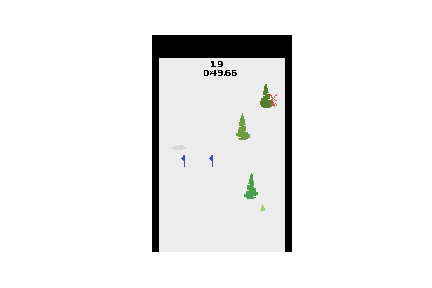
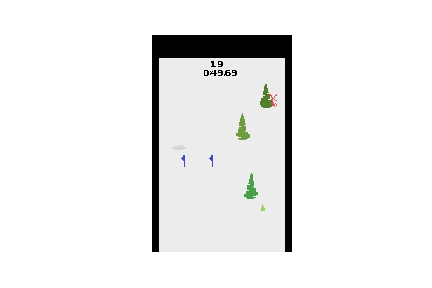
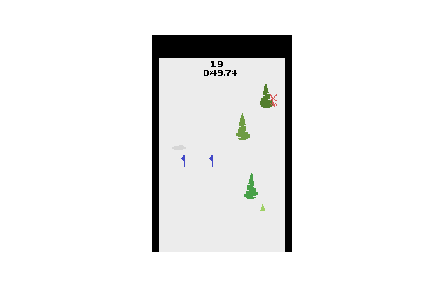
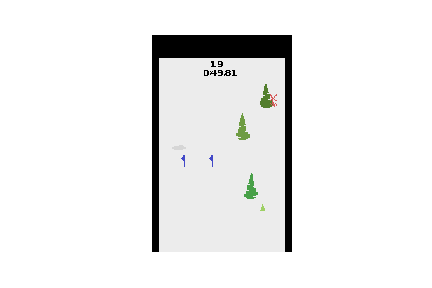
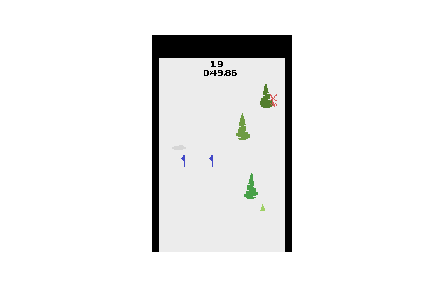
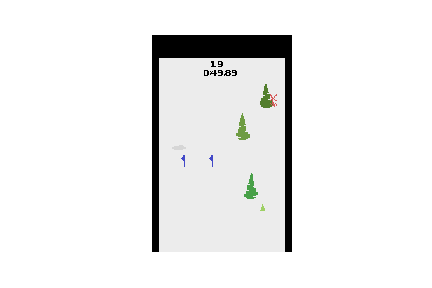
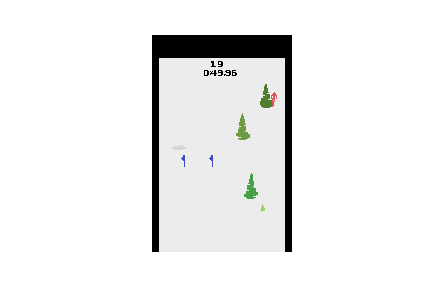
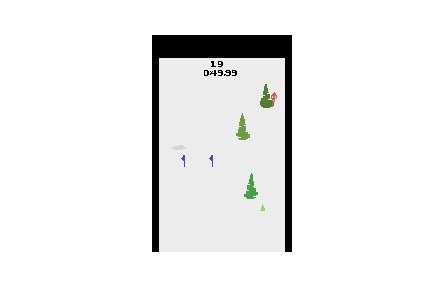
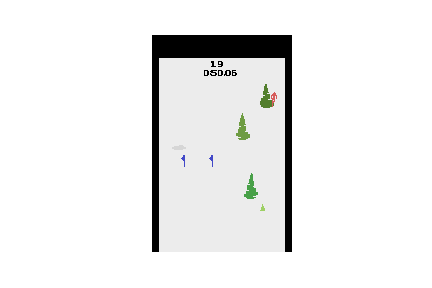
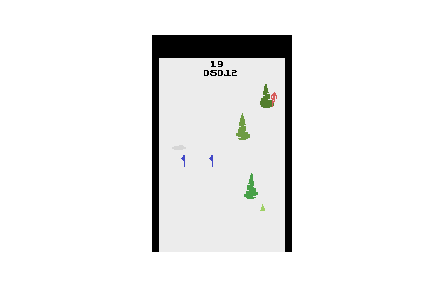
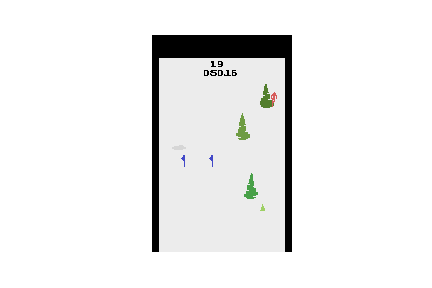
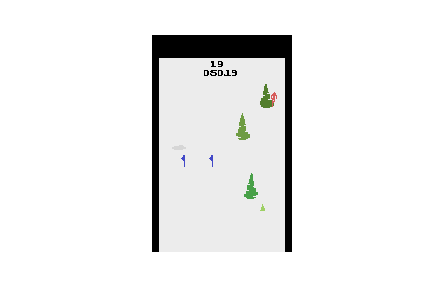
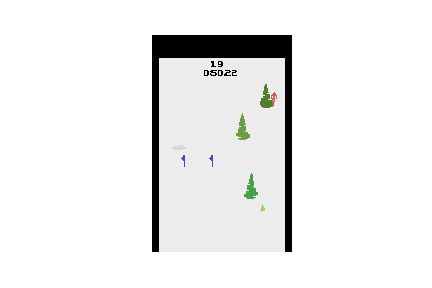
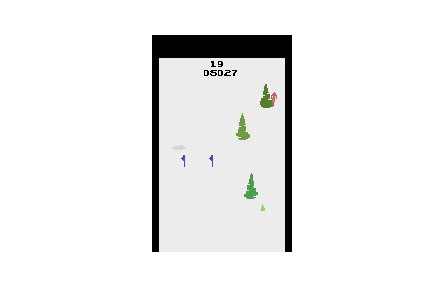
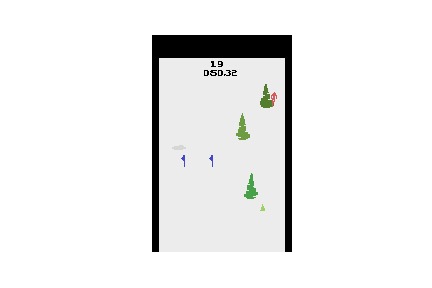
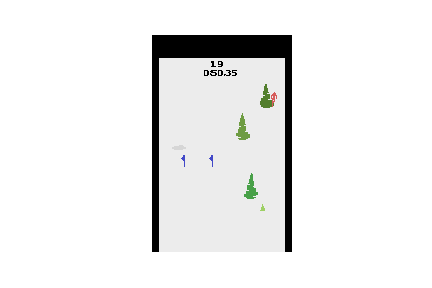
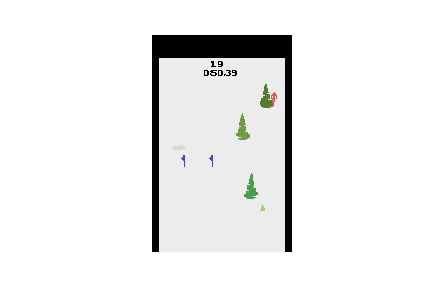
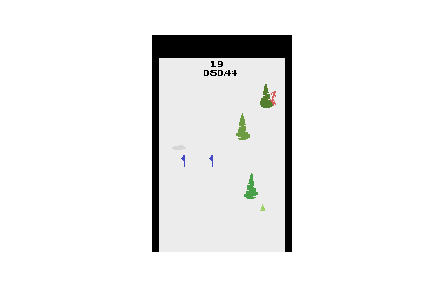
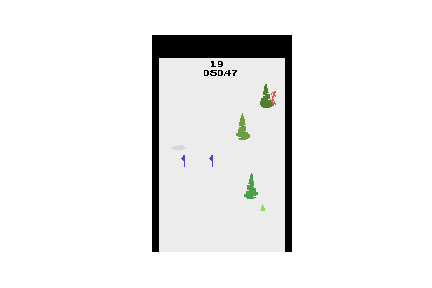
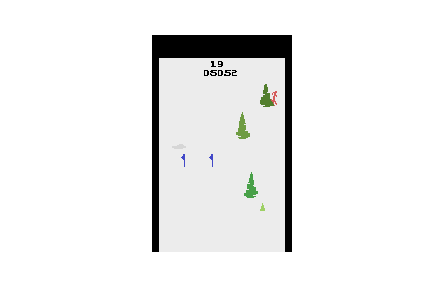
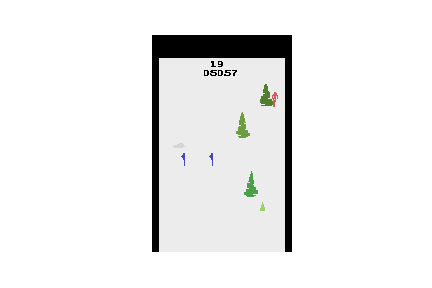
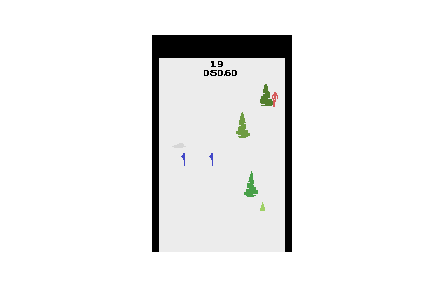
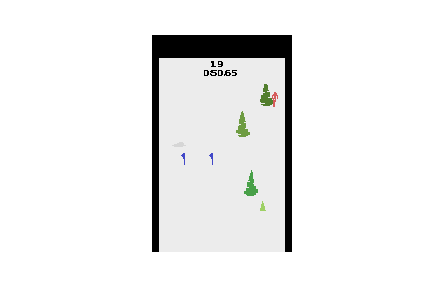

In [50]:
animate(img_list)